<a href="https://colab.research.google.com/github/yuliyaosipava/SARIMA-GARCH/blob/main/Sem_model_Structural_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Факторный анализ
==================

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

Будем анализировать экономические показатели по областям и г.Минску. Их 26

In [6]:
from google.colab import files
uploaded = files.upload()

Saving filtered_data_2023_strukt35.xlsx to filtered_data_2023_strukt35.xlsx


pd.read_excel('path_to_file.xls', sheetname='Sheet1')

In [7]:
df = pd.read_excel('filtered_data_2023_strukt35.xlsx', sheet_name='Sheet1')

df

Region     Zan    Sev   Zerno     krs  Moloko    Promna1  Podrjad  \
0            Brest  170365      0       0   0.000     0.0  55.021207    637.6   
1      Baranovichi   69129      0       0   0.000     0.0  37.633775    130.6   
2            Pinsk   50934      0       0   0.000     0.0  50.668418    212.3   
3    Baranovichsky   17538  82187  190202  55.890   125.3  45.628149     11.8   
4       Berezovsky   25765  45336   87215  46.162   104.7  80.051202     44.0   
..             ...     ...    ...     ...     ...     ...        ...      ...   
251   Slavgorodsky    4412  28833   24459  16.800    14.6  23.880000      6.4   
252      Khotimsky    3722  28334   23274  18.400    15.1   5.067203      7.5   
253       Chaussky    6666  42820   28248  20.100    14.3  17.351951     13.1   
254    Cherikovsky    4340  21283   23293   8.900     8.6   6.901848      5.9   
255      Shklovsky   13077  66111   73921  63.100   118.0  57.305318      4.6   

     IndSh        Vyrna1  ...  OOS  DebitProsr1  KreditProsr1  realskota  \
0      0.0  21811.600000  ...  8.3    36.010317     36.213154        0.0   
1      0.0   2763.400000  ...  5.4    15.030238     64.925126        0.0   
2      0.0   2584.000000  ...  4.2    29.105809     29.930498        0.0   
3    100.4   1058.200000  ...  6.1     8.526032     22.621185       83.0   
4    109.1   1404.900000  ...  9.0    33.957935     20.715105       12.9   
..     ...           ...  ...  ...          ...           ...        ...   
251  103.1     14.666667  ...  3.7     0.204538      1.237646        4.2   
252  114.7     17.780889  ...  5.0     0.447355      1.534132        1.3   
253  108.0     34.581105  ...  3.3     0.166417      0.703024        1.1   
254  130.7     20.054529  ...  3.5     0.181191      0.645096        1.5   
255  100.4     90.577101  ...  2.1     0.190530      0.797207       21.3   

     VvodEkspluatac  Rentab       Inv  DebitProsr1.1  KreditProsr1.1     SMR  
0        538.067232     8.1  2.211313  195464.000000   196565.000000  441310  
1        447.884859     6.1  1.284844   20877.000000    90181.000000  142984  
2        520.678965     6.9  1.755145   28058.000000    28853.000000  153177  
3        382.142857     8.1  4.585643    4749.000000    12600.000000   54127  
4        414.195132    12.3  7.813851   17760.000000    10834.000000  139094  
..              ...     ...       ...            ...             ...     ...  
251      130.144786     0.9  2.258581      25.976378      157.181102   10080  
252      132.897158   -17.0  3.574934      49.209091      168.754545   14358  
253      202.465313     2.2  2.140892      37.942982      160.289474   13115  
254      320.256205     2.7  6.027302      22.467742       79.991935   62358  
255      209.325234     4.6  5.883188      66.304598      277.428161   46078  

[256 rows x 27 columns]

In [8]:
print(type(df))  # Should return <class 'pandas.core.frame.DataFrame'>
print(df.shape)  # Shows number of rows and columns
print(df.head())  # Displays first 5 rows
print(df.isnull().sum())  # Shows count of missing values per column
print(df.dtypes)  # Shows each column's data type


<class 'pandas.core.frame.DataFrame'>
(256, 27)
          Region     Zan    Sev   Zerno     krs  Moloko    Promna1  Podrjad  \
0          Brest  170365      0       0   0.000     0.0  55.021207    637.6   
1    Baranovichi   69129      0       0   0.000     0.0  37.633775    130.6   
2          Pinsk   50934      0       0   0.000     0.0  50.668418    212.3   
3  Baranovichsky   17538  82187  190202  55.890   125.3  45.628149     11.8   
4     Berezovsky   25765  45336   87215  46.162   104.7  80.051202     44.0   

   IndSh   Vyrna1  ...  OOS  DebitProsr1  KreditProsr1  realskota  \
0    0.0  21811.6  ...  8.3    36.010317     36.213154        0.0   
1    0.0   2763.4  ...  5.4    15.030238     64.925126        0.0   
2    0.0   2584.0  ...  4.2    29.105809     29.930498        0.0   
3  100.4   1058.2  ...  6.1     8.526032     22.621185       83.0   
4  109.1   1404.9  ...  9.0    33.957935     20.715105       12.9   

   VvodEkspluatac  Rentab       Inv  DebitProsr1.1  KreditPros

In [ ]:
#df.fillna(df.mean())

In [9]:
df = df.filter(regex='^(?!.*Unnamed).*$')
df.head(257)

Region     Zan    Sev   Zerno     krs  Moloko    Promna1  Podrjad  \
0            Brest  170365      0       0   0.000     0.0  55.021207    637.6   
1      Baranovichi   69129      0       0   0.000     0.0  37.633775    130.6   
2            Pinsk   50934      0       0   0.000     0.0  50.668418    212.3   
3    Baranovichsky   17538  82187  190202  55.890   125.3  45.628149     11.8   
4       Berezovsky   25765  45336   87215  46.162   104.7  80.051202     44.0   
..             ...     ...    ...     ...     ...     ...        ...      ...   
251   Slavgorodsky    4412  28833   24459  16.800    14.6  23.880000      6.4   
252      Khotimsky    3722  28334   23274  18.400    15.1   5.067203      7.5   
253       Chaussky    6666  42820   28248  20.100    14.3  17.351951     13.1   
254    Cherikovsky    4340  21283   23293   8.900     8.6   6.901848      5.9   
255      Shklovsky   13077  66111   73921  63.100   118.0  57.305318      4.6   

     IndSh        Vyrna1  ...  OOS  DebitProsr1  KreditProsr1  realskota  \
0      0.0  21811.600000  ...  8.3    36.010317     36.213154        0.0   
1      0.0   2763.400000  ...  5.4    15.030238     64.925126        0.0   
2      0.0   2584.000000  ...  4.2    29.105809     29.930498        0.0   
3    100.4   1058.200000  ...  6.1     8.526032     22.621185       83.0   
4    109.1   1404.900000  ...  9.0    33.957935     20.715105       12.9   
..     ...           ...  ...  ...          ...           ...        ...   
251  103.1     14.666667  ...  3.7     0.204538      1.237646        4.2   
252  114.7     17.780889  ...  5.0     0.447355      1.534132        1.3   
253  108.0     34.581105  ...  3.3     0.166417      0.703024        1.1   
254  130.7     20.054529  ...  3.5     0.181191      0.645096        1.5   
255  100.4     90.577101  ...  2.1     0.190530      0.797207       21.3   

     VvodEkspluatac  Rentab       Inv  DebitProsr1.1  KreditProsr1.1     SMR  
0        538.067232     8.1  2.211313  195464.000000   196565.000000  441310  
1        447.884859     6.1  1.284844   20877.000000    90181.000000  142984  
2        520.678965     6.9  1.755145   28058.000000    28853.000000  153177  
3        382.142857     8.1  4.585643    4749.000000    12600.000000   54127  
4        414.195132    12.3  7.813851   17760.000000    10834.000000  139094  
..              ...     ...       ...            ...             ...     ...  
251      130.144786     0.9  2.258581      25.976378      157.181102   10080  
252      132.897158   -17.0  3.574934      49.209091      168.754545   14358  
253      202.465313     2.2  2.140892      37.942982      160.289474   13115  
254      320.256205     2.7  6.027302      22.467742       79.991935   62358  
255      209.325234     4.6  5.883188      66.304598      277.428161   46078  

[256 rows x 27 columns]

In [ ]:
df.describe()

Отбрасываем столбец с названиями,чтобы все столбцы были числовыми

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Убедимся, что 'df' — это DataFrame
# Предположим, что вы уже загрузили ваши данные в 'df', и он имеет 41 столбец

# Шаг 1: Исключаем первый нечисловой столбец
df = df.iloc[:257, 0:]

# Проверяем, что df_numeric — это DataFrame
print(f"Тип df_numeric: {type(df)}")
print(f"Форма df_numeric: {df.shape}")

# Шаг 2: Выбираем только числовые столбцы
df = df.select_dtypes(include=['number'])

# Проверяем наличие пропущенных значений
if df.isnull().values.any():
    print("Есть пропущенные значения. Заполняем их средним значением столбца.")
    df = df.fillna(df.mean())

Тип df_numeric: <class 'pandas.core.frame.DataFrame'>
Форма df_numeric: (256, 27)


In [8]:
print(type(df))


<class 'pandas.core.frame.DataFrame'>


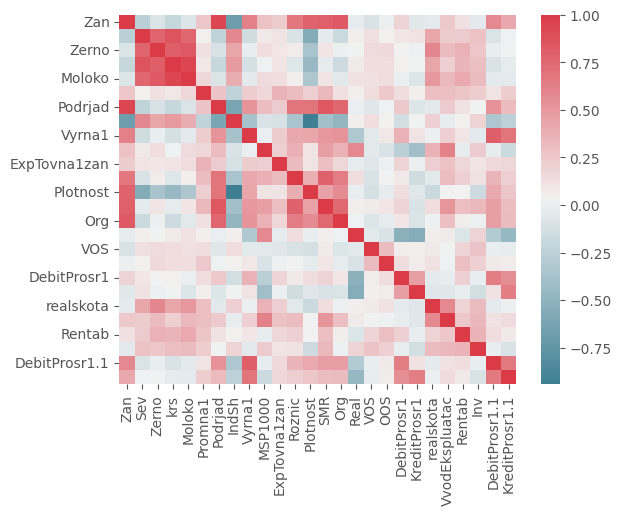

In [9]:
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.heatmap(df.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True));

Видим, что данные фичи далеки от нормальных, корреляции между фичами не наблюдается.

Метод главных компонент
=============

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Cтандартизируем переменные. Из предварительного анализа видно, что это важно.

In [15]:
import math
from sklearn import preprocessing
#  from sklearn.decomposition import PCA


# Функция для стандартизации фич
def scale_features(df):
    scaled1 = preprocessing.StandardScaler().fit_transform(df)
    scaled1 = pd.DataFrame(scaled1, columns=df.columns)
    return scaled1


In [16]:
df1=df.iloc[:, 0:23]

In [18]:
df_scaled = scale_features(df1)
df_scaled

Zan       Sev     Zerno       krs    Moloko   Promna1   Podrjad  \
0    3.969411 -2.021319 -1.294373 -1.596923 -1.198761  0.215561  3.431040   
1    1.213186 -2.021319 -1.294373 -1.596923 -1.198761 -0.160148  0.330686   
2    0.717814 -2.021319 -1.294373 -1.596923 -1.198761  0.121506  0.830289   
3   -0.191417  1.987596  2.769006  1.172926  1.239829  0.012595 -0.395788   
4    0.032569  0.190079  0.568844  0.690816  0.838912  0.756413 -0.198882   
..        ...       ...       ...       ...       ...       ...       ...   
251 -0.548782 -0.614904 -0.771844 -0.764333 -0.914616 -0.457342 -0.428809   
252 -0.567568 -0.639244 -0.797159 -0.685039 -0.904885 -0.863851 -0.422083   
253 -0.487415  0.067354 -0.690897 -0.600788 -0.920455 -0.598401 -0.387838   
254 -0.550742 -0.983177 -0.796754 -1.155848 -1.031388 -0.824208 -0.431867   
255 -0.312871  1.203441  0.284837  1.530246  1.097757  0.264917 -0.439816   

        IndSh    Vyrna1   MSP1000  ...       Org      Real       VOS  \
0   -3.303435  5.660338  0.082865  ...  3.063804 -1.186115 -0.282479   
1   -3.303435  0.438183 -0.680645  ...  0.419012 -1.011798 -0.829921   
2   -3.303435  0.389000 -0.811474  ...  0.140716 -1.113483 -0.282479   
3    0.252273 -0.029306  0.355093  ... -0.125793 -1.113483  0.577788   
4    0.560387  0.065744 -0.879077  ... -0.148057 -0.663164  0.004277   
..        ...       ...       ...  ...       ...       ...       ...   
251  0.347894 -0.315395 -0.092582  ... -0.407363  1.138110 -0.230341   
252  0.758713 -0.314542 -0.235259  ... -0.418495  1.501270  0.108552   
253  0.521430 -0.309936  0.926110  ... -0.341227  0.978319 -0.438891   
254  1.325360 -0.313918 -0.010159  ... -0.409328  0.702318 -0.282479   
255  0.252273 -0.294584 -0.026507  ... -0.262649  0.498948 -0.725646   

          OOS  DebitProsr1  KreditProsr1  realskota  VvodEkspluatac    Rentab  \
0    0.805441     0.289065     -0.190950  -0.637752        0.518791  0.211063   
1    0.075154    -0.144585      0.117616  -0.637752        0.220596 -0.113065   
2   -0.227035     0.146352     -0.258470  -0.637752        0.461295  0.016586   
3    0.251430    -0.279025     -0.337023   3.504876        0.003215  0.211063   
4    0.981718     0.246643     -0.357507   0.006102        0.109198  0.891731   
..        ...          ...           ...        ...             ...       ...   
251 -0.352946    -0.451027     -0.566831  -0.428125       -0.830036 -0.955797   
252 -0.025576    -0.446008     -0.563644  -0.572867       -0.820935 -3.856741   
253 -0.453676    -0.451815     -0.572576  -0.582849       -0.590903 -0.745114   
254 -0.403311    -0.451509     -0.573199  -0.562885       -0.201418 -0.664082   
255 -0.755864    -0.451316     -0.571564   0.425356       -0.568220 -0.356161   

          Inv  
0   -0.588875  
1   -0.911358  
2   -0.747657  
3    0.237576  
4    1.361244  
..        ...  
251 -0.572422  
252 -0.114229  
253 -0.613387  
254  0.739386  
255  0.689223  

[256 rows x 23 columns]

In [19]:
print(df1.dtypes)


Zan                 int64
Sev                 int64
Zerno               int64
krs               float64
Moloko            float64
Promna1           float64
Podrjad           float64
IndSh             float64
Vyrna1            float64
MSP1000           float64
ExpTovna1zan      float64
Roznic            float64
Plotnost          float64
Org                 int64
Real              float64
VOS               float64
OOS               float64
DebitProsr1       float64
KreditProsr1      float64
realskota         float64
VvodEkspluatac    float64
Rentab            float64
Inv               float64
dtype: object


In [14]:
import pandas as pd
from sklearn import preprocessing

# Предположим, что вы изначально читаете данные в df
# Удаляем первый столбец


# Создаем DataFrame из нужных столбцов (если нужно выбрать определенные столбцы)
 # df1 = df.iloc[:, 1:34] Выбираем первые 34 столбца после удаления первого

# Функция для стандартизации признаков
def scale_features(df_input):
    # Выбираем только числовые столбцы
    numeric_cols = df_input.select_dtypes(include=['number']).columns
    df_numeric = df_input[numeric_cols]

    # Обработка пропущенных значений, если есть
    if df_numeric.isnull().values.any():
        df_numeric = df_numeric.fillna(df_numeric.mean())

    # Масштабируем данные
    scaled = preprocessing.StandardScaler().fit_transform(df_numeric)
    scaled_df = pd.DataFrame(scaled, columns=numeric_cols)
    return scaled_df

# Применяем функцию к нашим данным
df_scaled1 = scale_features(df1)

# Выводим названия столбцов и первые строки
print(df_scaled1.columns.tolist())
print(df_scaled1.head())


['Zan', 'Sev', 'Zerno', 'krs', 'Moloko', 'Promna1', 'Podrjad', 'IndSh', 'Vyrna1', 'MSP1000', 'ExpTovna1zan', 'Roznic', 'Plotnost', 'SMR', 'Org', 'Real', 'VOS', 'OOS', 'DebitProsr1', 'KreditProsr1', 'realskota', 'VvodEkspluatac', 'Rentab', 'Inv']
        Zan       Sev     Zerno       krs    Moloko   Promna1   Podrjad  \
0  3.969411 -2.021319 -1.294373 -1.596923 -1.198761  0.215561  3.431040   
1  1.213186 -2.021319 -1.294373 -1.596923 -1.198761 -0.160148  0.330686   
2  0.717814 -2.021319 -1.294373 -1.596923 -1.198761  0.121506  0.830289   
3 -0.191417  1.987596  2.769006  1.172926  1.239829  0.012595 -0.395788   
4  0.032569  0.190079  0.568844  0.690816  0.838912  0.756413 -0.198882   

      IndSh    Vyrna1   MSP1000  ...       Org      Real       VOS       OOS  \
0 -3.303435  5.660338  0.082865  ...  3.063804 -1.186115 -0.282479  0.805441   
1 -3.303435  0.438183 -0.680645  ...  0.419012 -1.011798 -0.829921  0.075154   
2 -3.303435  0.389000 -0.811474  ...  0.140716 -1.113483 -0.282

In [ ]:
#print(df_scaled1.columns.tolist())


In [20]:
print(df_scaled.columns)


Index(['Zan', 'Sev', 'Zerno', 'krs', 'Moloko', 'Promna1', 'Podrjad', 'IndSh',
       'Vyrna1', 'MSP1000', 'ExpTovna1zan', 'Roznic', 'Plotnost', 'Org',
       'Real', 'VOS', 'OOS', 'DebitProsr1', 'KreditProsr1', 'realskota',
       'VvodEkspluatac', 'Rentab', 'Inv'],
      dtype='object')


In [16]:
import pandas as pd

# Assuming df_scaled is your numpy array
df_scaled = pd.DataFrame(df_scaled)
print(df_scaled.columns)


Index(['Zan', 'Sev', 'Zerno', 'krs', 'Moloko', 'Promna1', 'Podrjad', 'IndSh',
       'Vyrna1', 'MSP1000', 'ExpTovna1zan', 'Roznic', 'Plotnost', 'SMR', 'Org',
       'Real', 'VOS', 'OOS', 'DebitProsr1', 'KreditProsr1', 'realskota',
       'VvodEkspluatac', 'Rentab', 'Inv'],
      dtype='object')


In [ ]:
import pandas as pd

# Функция для обратной стандартизации признаков
def scale_features(df):
    df_scaled = df.copy()
    for column in df.columns:
        Xmax = df[column].max()
        Xmin = df[column].min()
        df_scaled[column] = (Xmax - df[column]) / (Xmax - Xmin)
    return df_scaled


In [ ]:
print("Количество столбцов в df:", df.shape[1])


In [ ]:
#for idx, col in enumerate(df.columns):
    #print(f"Индекс: {idx}, Название столбца: {col}")


In [ ]:
df_scaled2 = scale_features(df.iloc[:, 36:])
print(df_scaled2.columns)


Наконец, сами факторы (как новые векторы-фичи) можно получить, применив метод transform.

In [ ]:
import pandas as pd

# Объединяем DataFrame по столбцам
df_scaled = pd.concat([df_scaled1, df_scaled2], axis=1)
df_scaled = df_scaled1
# Выводим названия столбцов
print("Названия столбцов после объединения:")
print(df_scaled.columns.tolist())

# Просматриваем первые строки объединённого DataFrame
print("Первые строки объединённого DataFrame:")
print(df_scaled.head(15))


In [ ]:
# Объединение массивов по горизонтали
#df_scaled = np.hstack((df_scaled1, df_scaled2))
#print(df_scaled)

In [ ]:
print(df_scaled.columns.tolist())

In [5]:
# Установка необходимых библиотек
!pip install pycaret
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/1

In [ ]:
!pip install matplotlib scikit-learn

In [ ]:
!pip install --upgrade pycaret

In [21]:
import matplotlib as mpl
import seaborn as sns
from pycaret.clustering import *
mpl.rcParams['figure.dpi'] = 200
import sklearn

In [22]:
cluster = setup(df_scaled, session_id = 7652)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

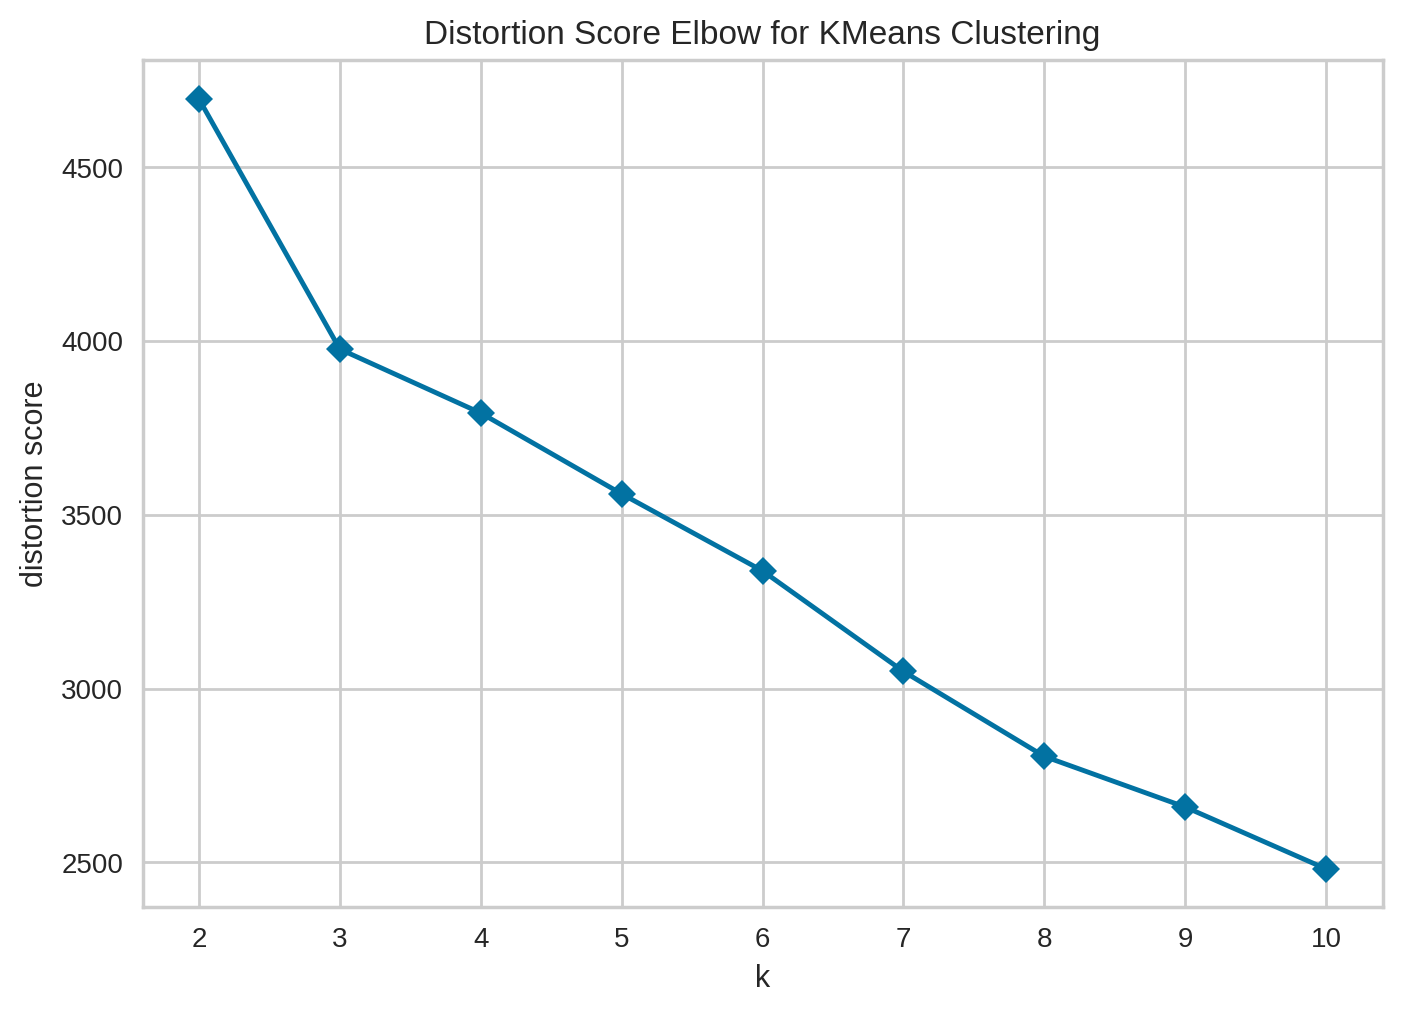

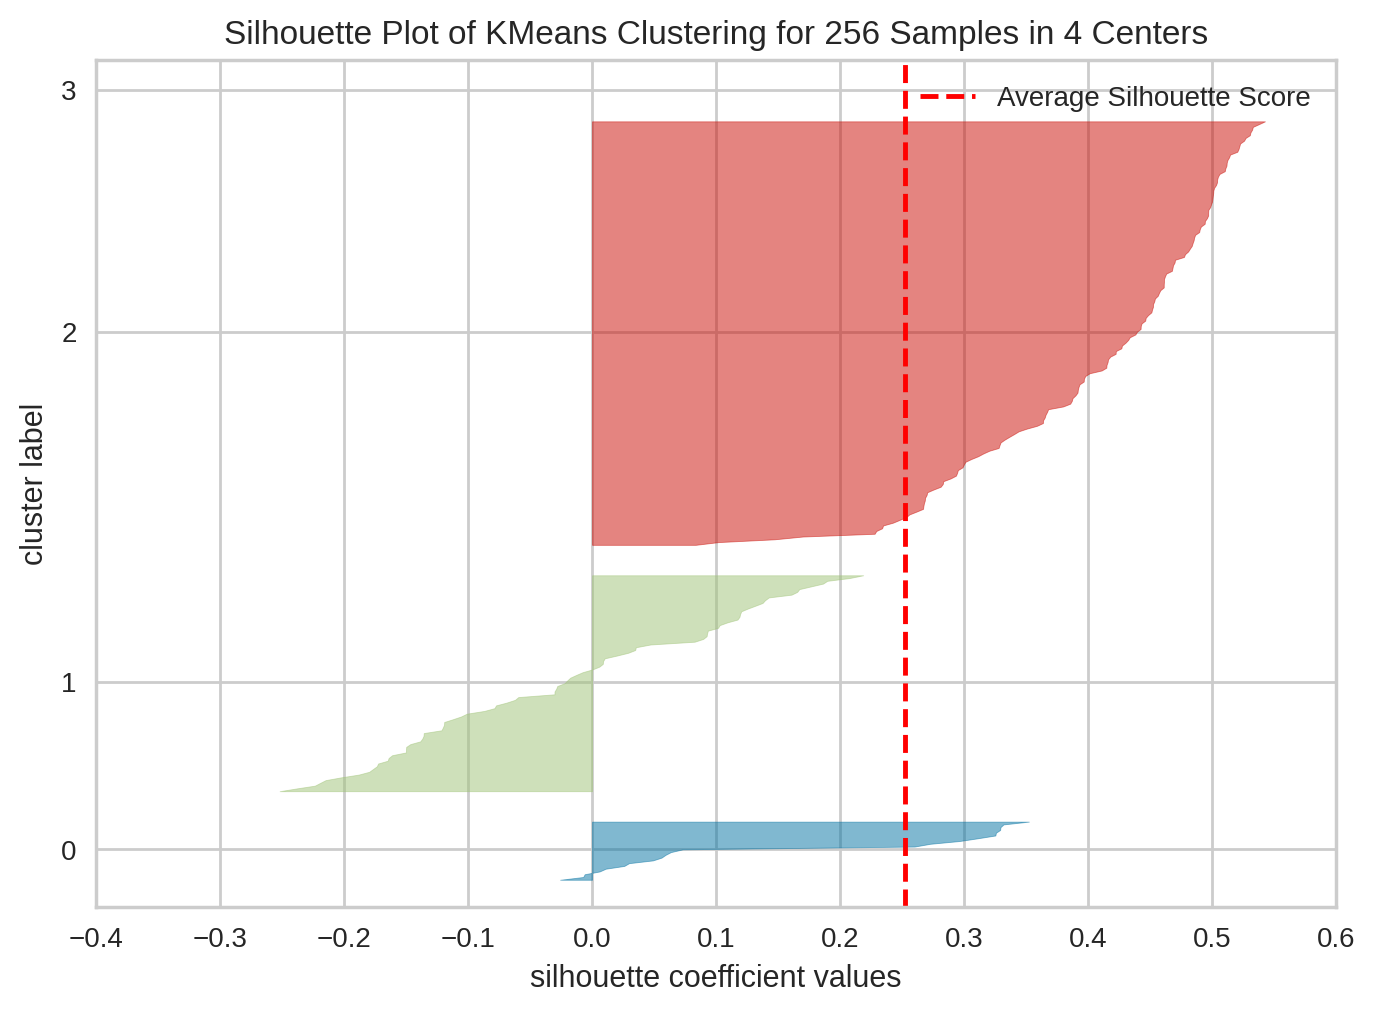

        Zan       Sev     Zerno       krs    Moloko   Promna1   Podrjad  \
0  3.969411 -2.021319 -1.294373 -1.596923 -1.198761  0.215561  3.431040   
1  1.213186 -2.021319 -1.294373 -1.596923 -1.198761 -0.160148  0.330686   
2  0.717814 -2.021319 -1.294373 -1.596923 -1.198761  0.121506  0.830289   
3 -0.191417  1.987596  2.769006  1.172926  1.239829  0.012595 -0.395788   
4  0.032569  0.190079  0.568844  0.690816  0.838912  0.756413 -0.198882   

      IndSh    Vyrna1   MSP1000  ...      Real       VOS       OOS  \
0 -3.303435  5.660338  0.082865  ... -1.186115 -0.282479  0.805441   
1 -3.303435  0.438183 -0.680645  ... -1.011798 -0.829921  0.075154   
2 -3.303435  0.389000 -0.811474  ... -1.113483 -0.282479 -0.227034   
3  0.252273 -0.029306  0.355093  ... -1.113483  0.577788  0.251430   
4  0.560387  0.065744 -0.879077  ... -0.663164  0.004277  0.981718   

   DebitProsr1  KreditProsr1  realskota  VvodEkspluatac    Rentab       Inv  \
0     0.289065     -0.190950  -0.637752        0.

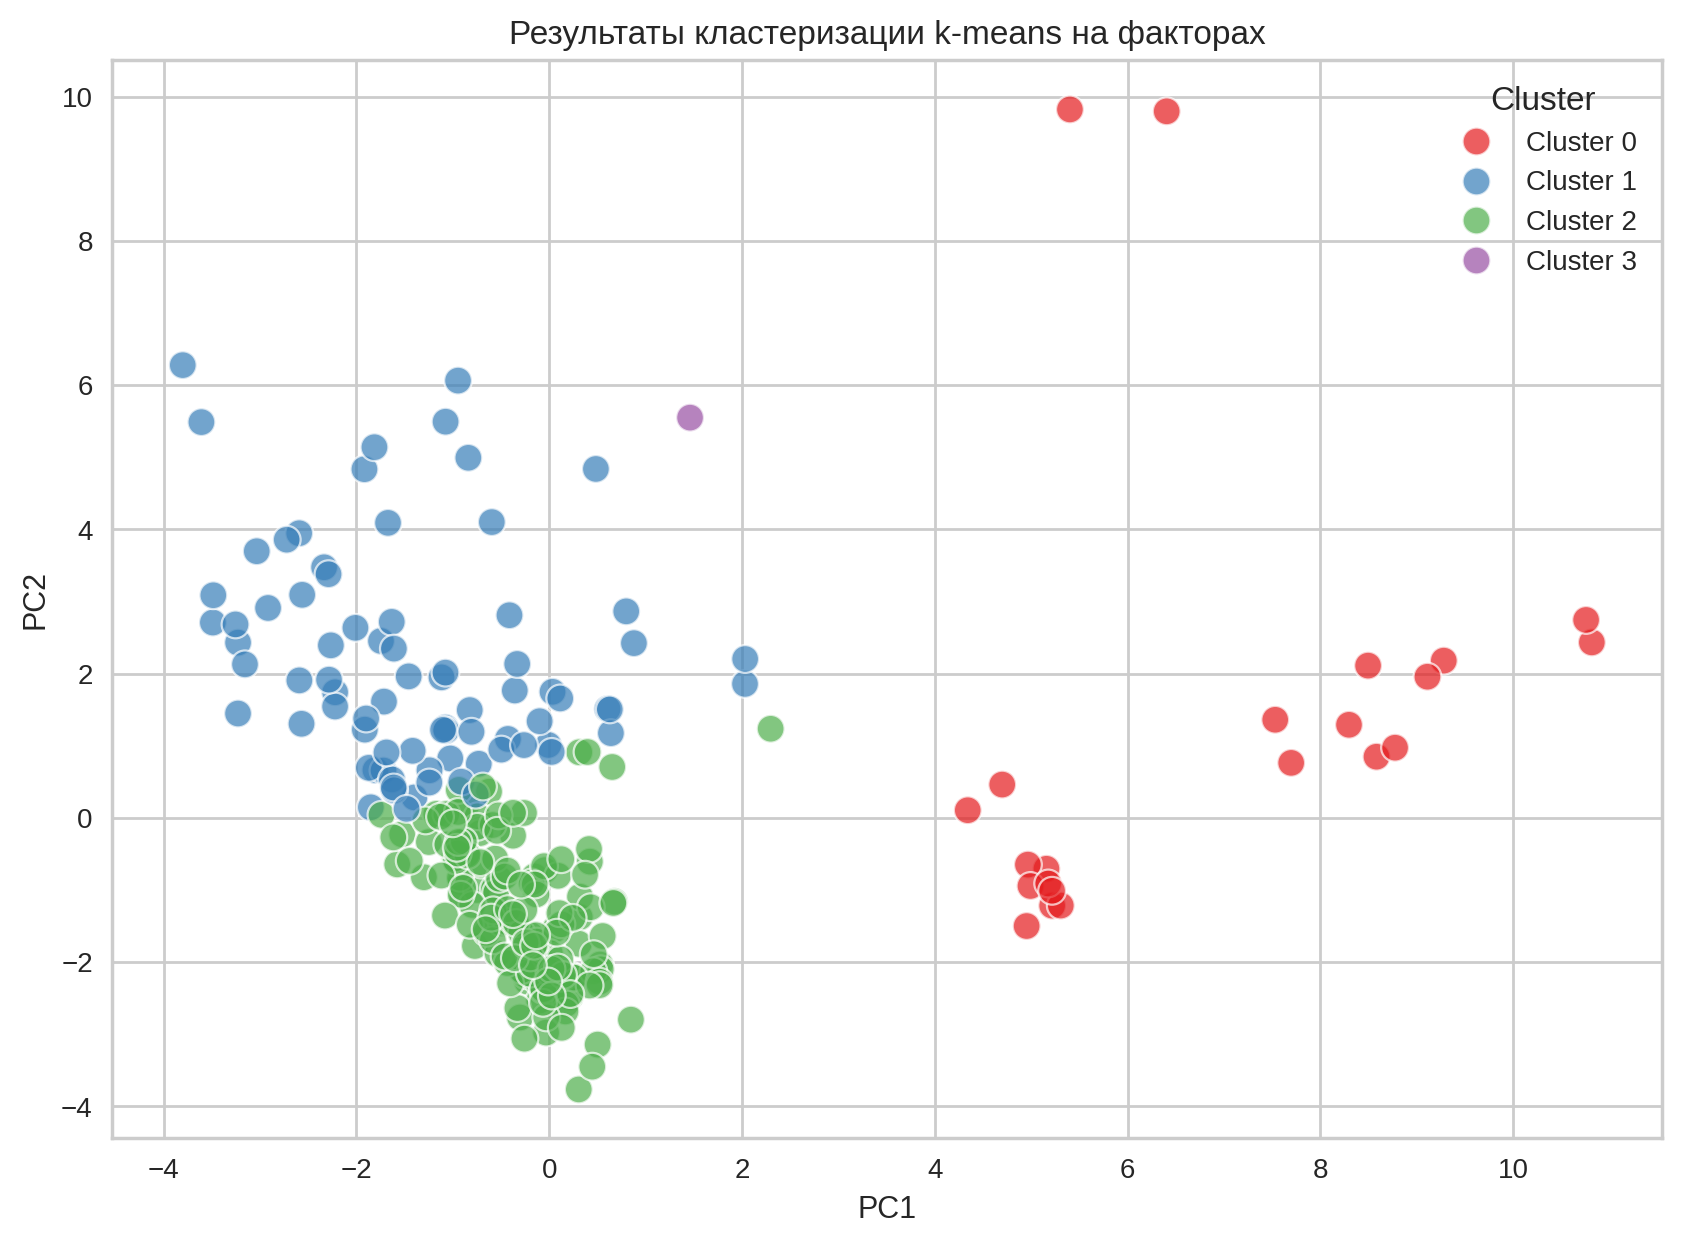

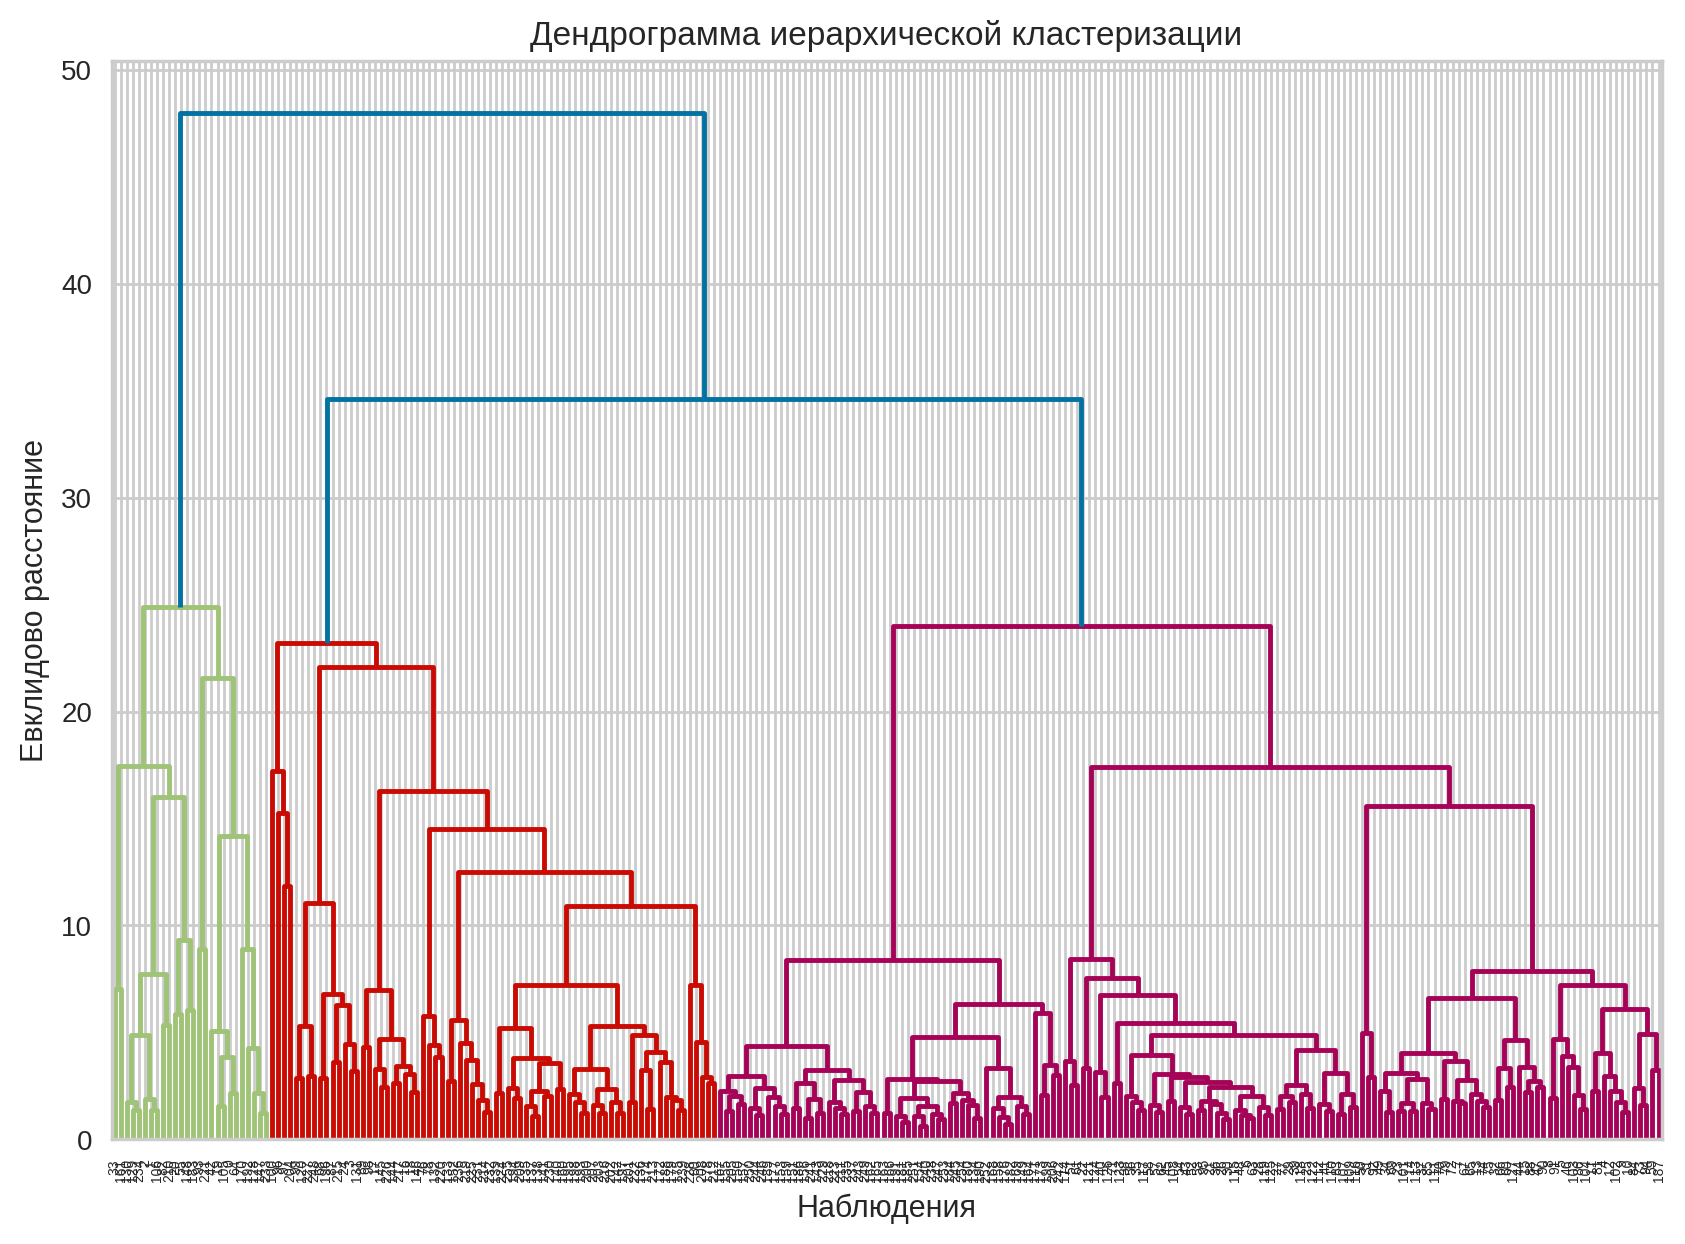

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Результаты кластеризации методом k-средних сохранены в файл: kmeans_clustered_dataPCA.xlsx


In [23]:
# Импорт необходимых библиотек
from pycaret.clustering import *
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns
from sklearn.decomposition import PCA

# Предполагается, что df_scaled — ваш стандартизированный DataFrame
df_scaled_reset = df_scaled.reset_index(drop=True)

# Шаг 2: Инициализация среды
exp_clu = setup(
    data=df_scaled_reset,
    session_id=123,
    normalize=False,
    transformation=False,
    verbose=False
)

# Шаг 3: Создание модели k-means
kmeans_model = create_model('kmeans')

# Шаг 4: Анализ оптимального количества кластеров
plot_model(kmeans_model, plot='elbow')
plot_model(kmeans_model, plot='silhouette')

# Шаг 5: Получение меток кластеров
df_clustered = assign_model(kmeans_model)
print(df_clustered.head())

# Понижение размерности до 2D для визуализации с использованием PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled_reset)
df_clustered['PC1'] = principal_components[:, 0]
df_clustered['PC2'] = principal_components[:, 1]

# Шаг 6: Визуализация кластеров
# Используем яркие и насыщенные цвета для кластеров
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_clustered, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.title('Результаты кластеризации k-means на факторах')
plt.show()

# Шаг 7: Иерархическая кластеризация с использованием SciPy
linked = linkage(df_scaled_reset, method='ward', metric='euclidean')

# Строим дендрограмму
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df_scaled_reset.index.tolist(), color_threshold=0.7*max(linked[:,2]))
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Наблюдения')
plt.ylabel('Евклидово расстояние')
plt.show()

# Определение кластеров из дендрограммы
hierarchical_clusters = fcluster(linked, t=3, criterion='maxclust')

# Добавляем метки кластеров в DataFrame
df_clustered['Кластер_иерархический'] = hierarchical_clusters

# Сохранение результата кластеризации методом k-средних в Excel-файл
output_file = 'kmeans_clustered_dataPCA.xlsx'
df_clustered.to_excel(output_file, index=False)

# Выводим путь для сохраненного файла
from google.colab import files
files.download(output_file)

print(f"Результаты кластеризации методом k-средних сохранены в файл: {output_file}")


При k = 2 коэффициент силуэта: 0.4855
При k = 3 коэффициент силуэта: 0.3001
При k = 4 коэффициент силуэта: 0.1954
При k = 5 коэффициент силуэта: 0.2116
При k = 6 коэффициент силуэта: 0.1887
При k = 7 коэффициент силуэта: 0.1654
При k = 8 коэффициент силуэта: 0.1462
При k = 9 коэффициент силуэта: 0.1532
При k = 10 коэффициент силуэта: 0.1571

Оптимальное количество кластеров (метод силуэта): 2


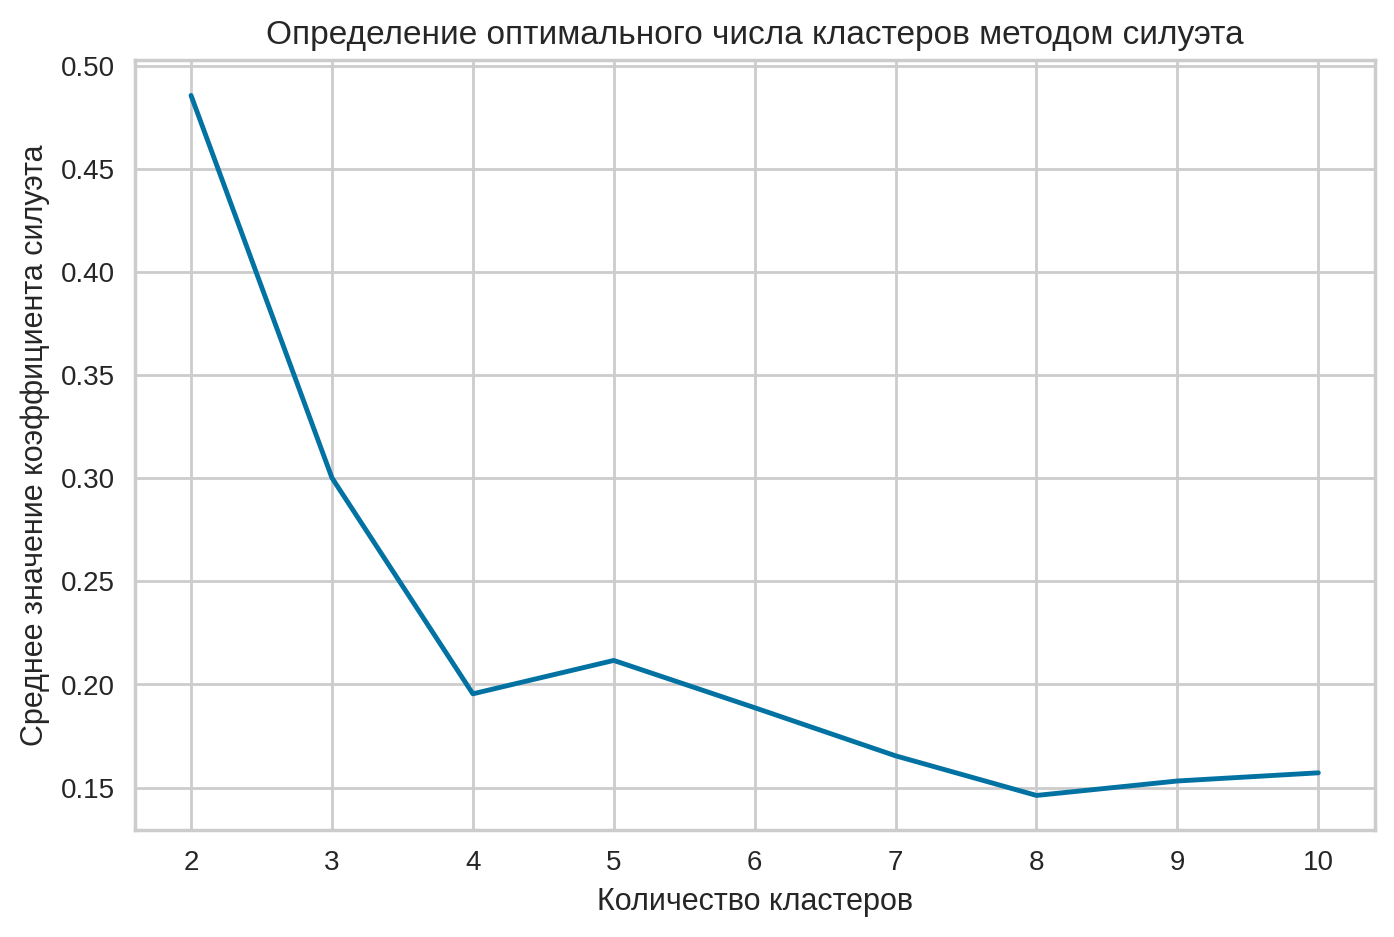

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Предполагается, что df_scaled_reset — это ваш стандартизированный DataFrame
# Задаем диапазон кластеров для тестирования (например, от 2 до 10)
range_n_clusters = range(2, 11)
silhouette_avgs = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled_reset)
    silhouette_avg = silhouette_score(df_scaled_reset, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    print(f"При k = {k} коэффициент силуэта: {silhouette_avg:.4f}")

# Определяем оптимальное значение k как то, при котором коэффициент силуэта максимален.
optimal_k = range_n_clusters[np.argmax(silhouette_avgs)]
print(f"\nОптимальное количество кластеров (метод силуэта): {optimal_k}")

# Визуализация зависимости коэффициента силуэта от числа кластеров
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_avgs, 'bx-')
plt.xlabel("Количество кластеров")
plt.ylabel("Среднее значение коэффициента силуэта")
plt.title("Определение оптимального числа кластеров методом силуэта")
plt.show()


kmeans в excel файл. определение количества кластеров по методу локтя, к-means, построенный на pCA

In [25]:
!pip install kneed

Оптимальное количество кластеров (метод локтя): 3


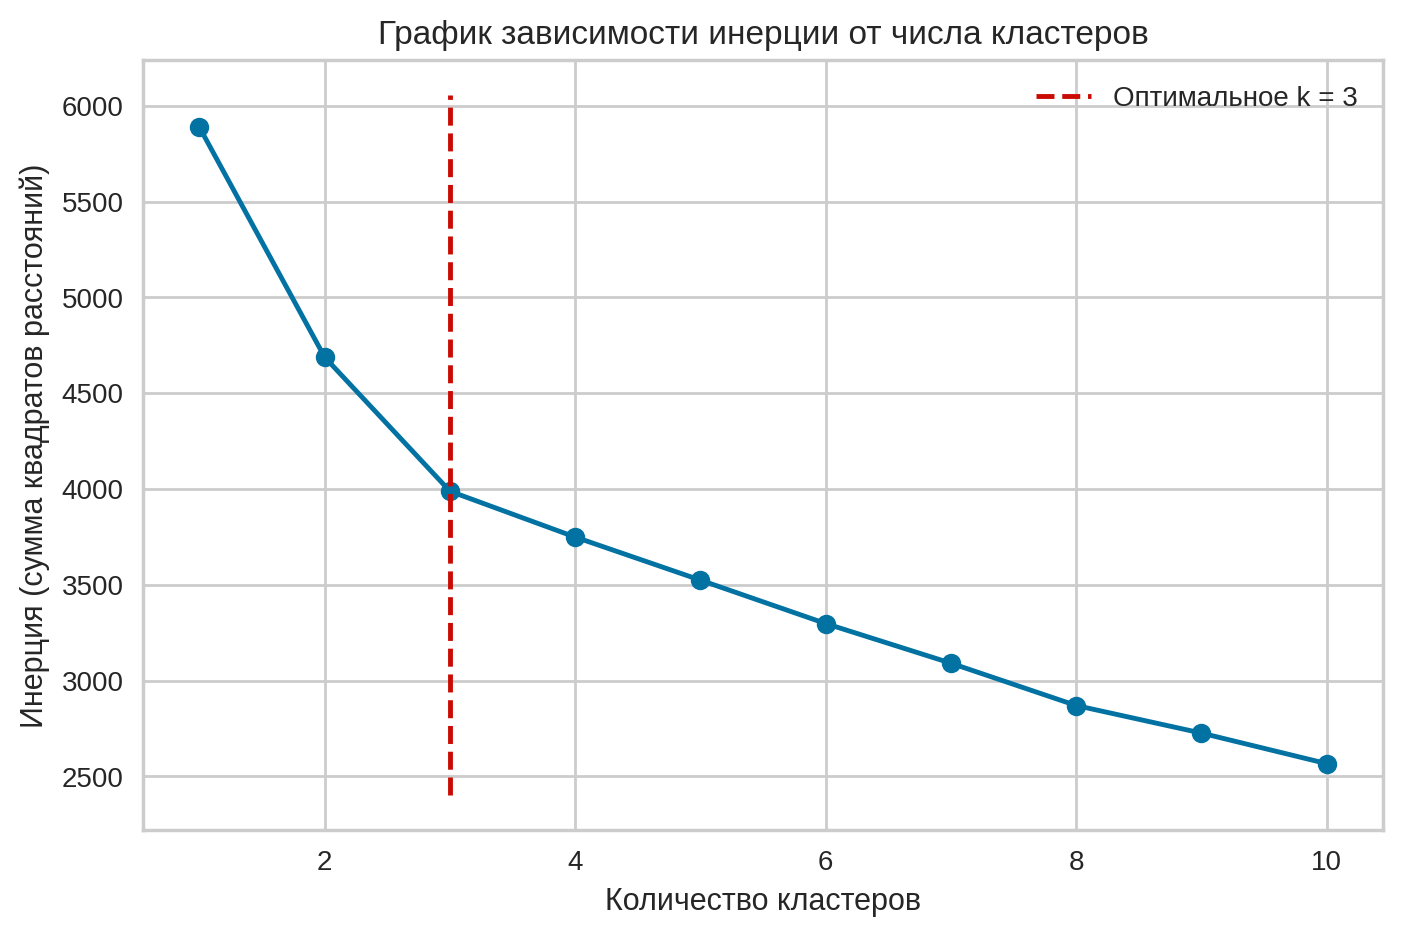

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

        Zan       Sev     Zerno       krs    Moloko   Promna1   Podrjad  \
0  3.969411 -2.021319 -1.294373 -1.596923 -1.198761  0.215561  3.431040   
1  1.213186 -2.021319 -1.294373 -1.596923 -1.198761 -0.160148  0.330686   
2  0.717814 -2.021319 -1.294373 -1.596923 -1.198761  0.121506  0.830289   
3 -0.191417  1.987596  2.769006  1.172926  1.239829  0.012595 -0.395788   
4  0.032569  0.190079  0.568844  0.690816  0.838912  0.756413 -0.198882   

      IndSh    Vyrna1   MSP1000  ...      Real       VOS       OOS  \
0 -3.303435  5.660338  0.082865  ... -1.186115 -0.282479  0.805441   
1 -3.303435  0.438183 -0.680645  ... -1.011798 -0.829921  0.075154   
2 -3.303435  0.389000 -0.811474  ... -1.113483 -0.282479 -0.227034   
3  0.252273 -0.029306  0.355093  ... -1.113483  0.577788  0.251430   
4  0.560387  0.065744 -0.879077  ... -0.663164  0.004277  0.981718   

   DebitProsr1  KreditProsr1  realskota  VvodEkspluatac    Rentab       Inv  \
0     0.289065     -0.190950  -0.637752        0.

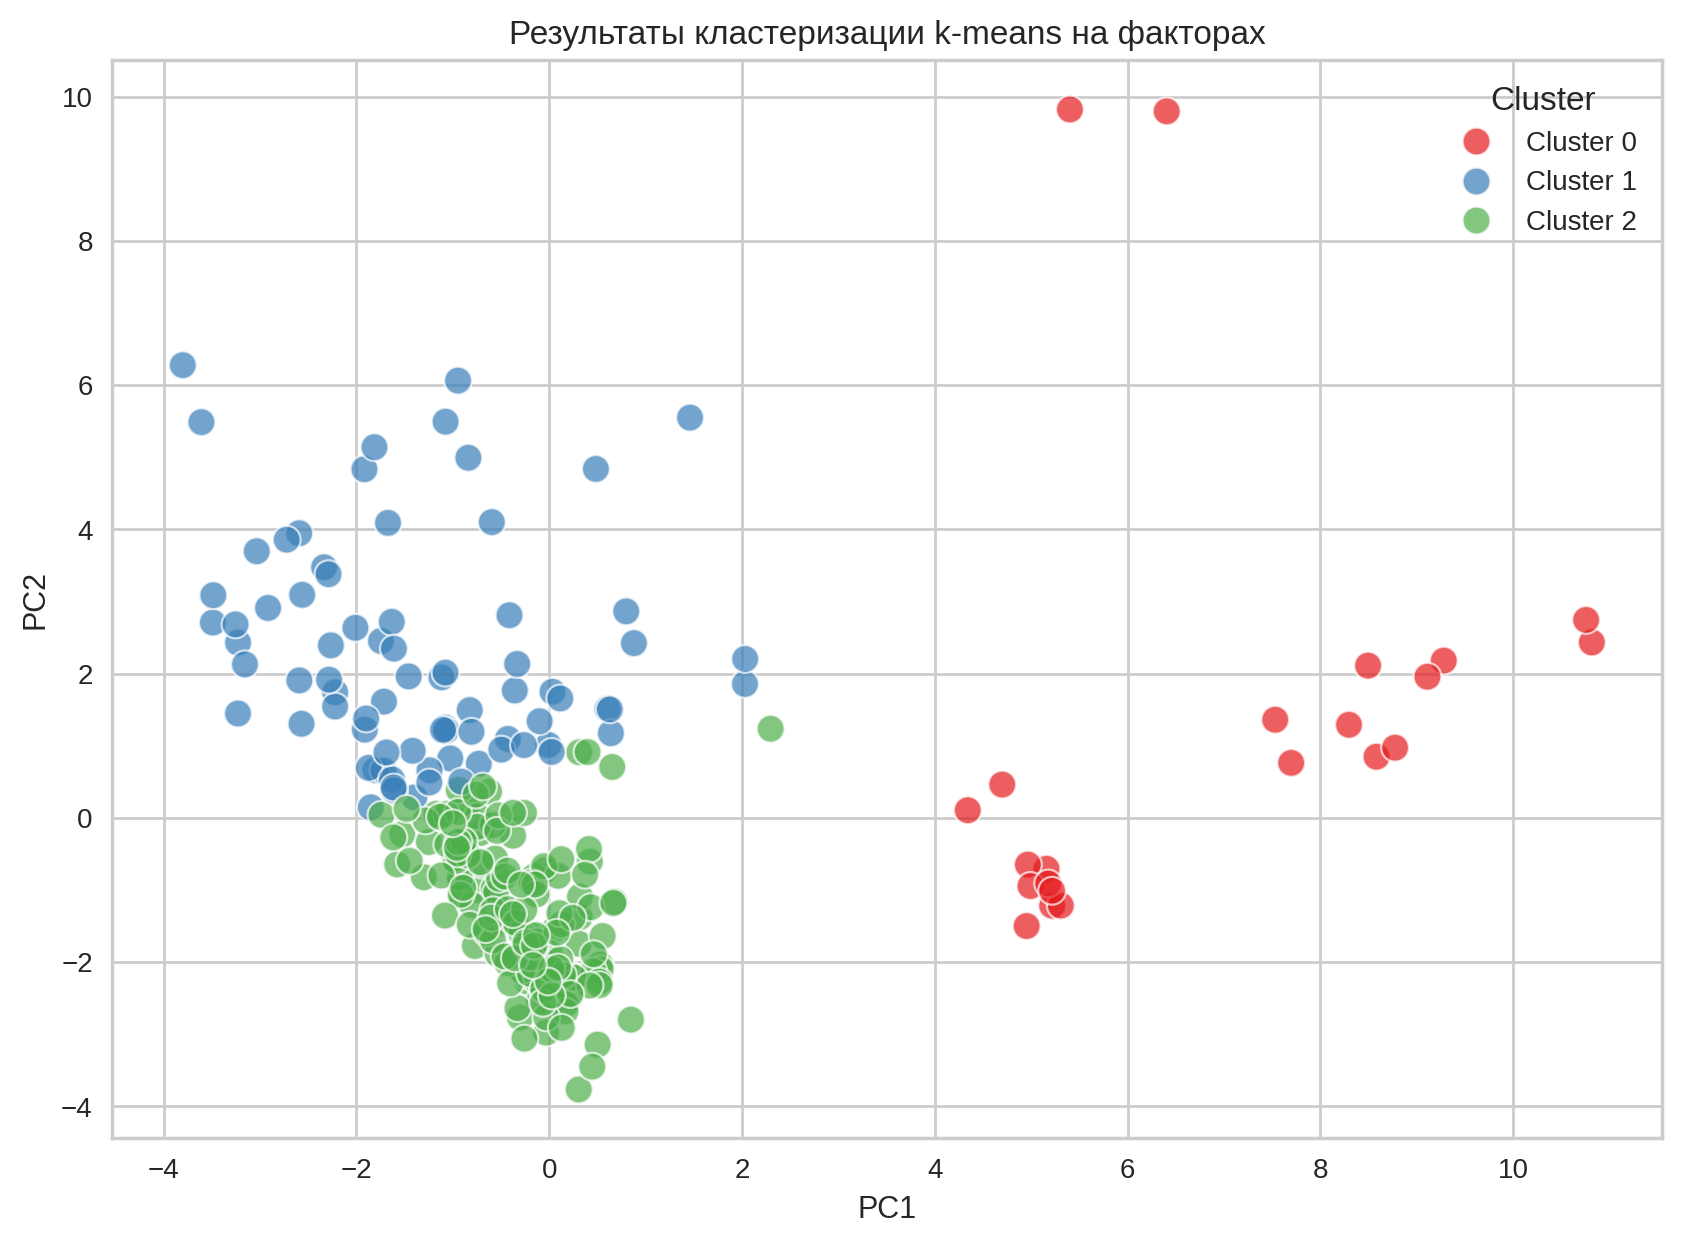

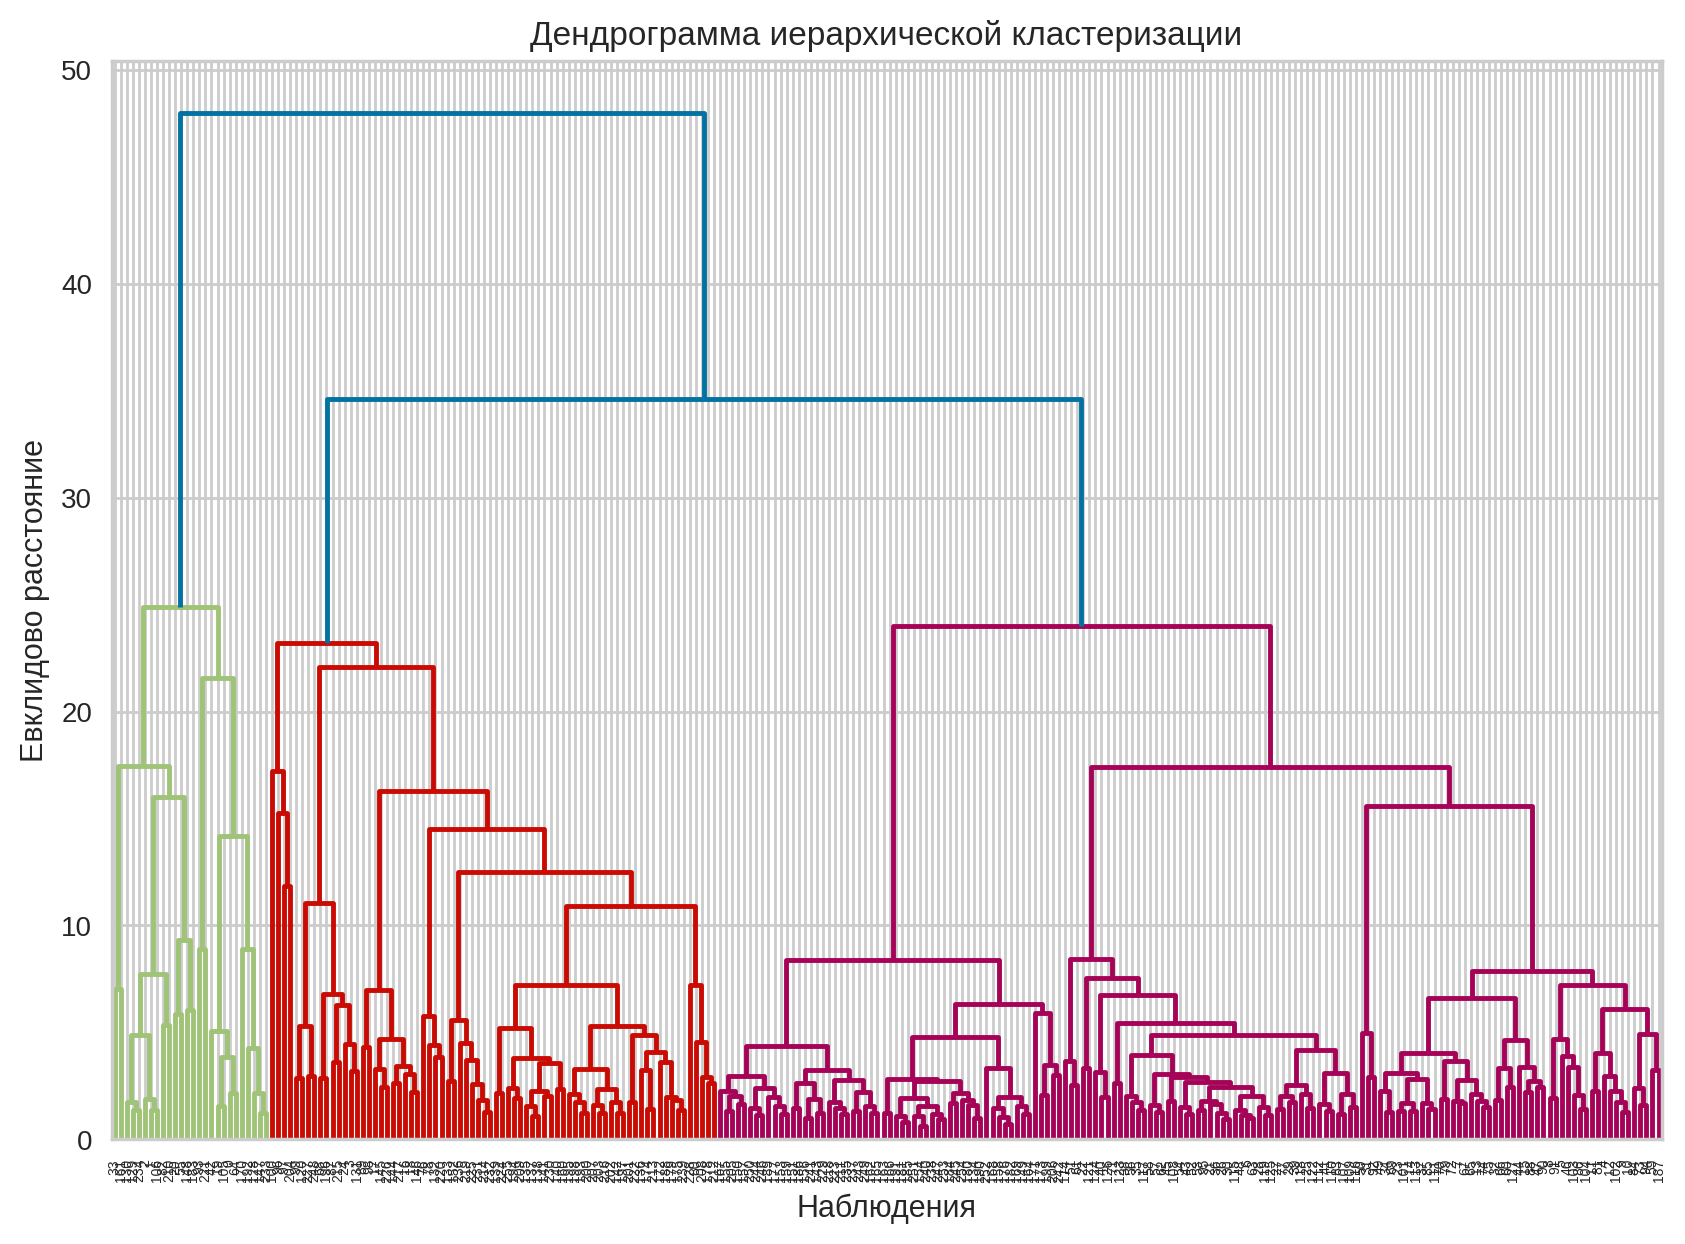

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Результаты кластеризации методом k-средних сохранены в файл: kmeans_clustered_dataPCA.xlsx


In [27]:
# Импорт необходимых библиотек
from pycaret.clustering import *
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns
from sklearn.decomposition import PCA
from kneed import KneeLocator
from sklearn.cluster import KMeans

# Предполагается, что df_scaled — ваш стандартизированный DataFrame
df_scaled_reset = df_scaled.reset_index(drop=True)

# Шаг 2: Инициализация среды
exp_clu = setup(
    data=df_scaled_reset,
    session_id=123,
    normalize=False,
    transformation=False,
    verbose=False
)

# Шаг 3: Определение оптимального количества кластеров методом локтя
max_k = 10  # Можно изменить диапазон по необходимости
inertias = []

# Вычисляем инерцию для k от 1 до max_k
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled_reset)
    inertias.append(kmeans.inertia_)

# Используем KneeLocator для нахождения оптимального количества кластеров
kneedle = KneeLocator(range(1, max_k + 1), inertias, curve="convex", direction="decreasing")
optimal_k_elbow = kneedle.knee
print(f"Оптимальное количество кластеров (метод локтя): {optimal_k_elbow}")

# Визуализируем график локтя
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_k + 1), inertias, 'bo-')
plt.xlabel("Количество кластеров")
plt.ylabel("Инерция (сумма квадратов расстояний)")
plt.title("График зависимости инерции от числа кластеров")
if optimal_k_elbow is not None:
    plt.vlines(optimal_k_elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r', label=f'Оптимальное k = {optimal_k_elbow}')
    plt.legend()
plt.show()

# Если оптимальное k не найдено, задаем стандартное значение (например, 2)
if optimal_k_elbow is None:
    optimal_k_elbow = 2

# Шаг 4: Создание модели k-means с оптимальным количеством кластеров
kmeans_model = create_model('kmeans', num_clusters=optimal_k_elbow)

# Шаг 5: Получение меток кластеров
df_clustered = assign_model(kmeans_model)
print(df_clustered.head())

# Понижение размерности до 2D для визуализации с использованием PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled_reset)
df_clustered['PC1'] = principal_components[:, 0]
df_clustered['PC2'] = principal_components[:, 1]

# Шаг 6: Визуализация кластеров
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_clustered, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.title('Результаты кластеризации k-means на факторах')
plt.show()

# Шаг 7: Иерархическая кластеризация с использованием SciPy
linked = linkage(df_scaled_reset, method='ward', metric='euclidean')

# Строим дендрограмму
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df_scaled_reset.index.tolist(), color_threshold=0.7*max(linked[:,2]))
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Наблюдения')
plt.ylabel('Евклидово расстояние')
plt.show()

# Определение кластеров из дендрограммы
hierarchical_clusters = fcluster(linked, t=optimal_k_elbow, criterion='maxclust')

# Добавляем метки кластеров в DataFrame
df_clustered['Кластер_иерархический'] = hierarchical_clusters

# Сохранение результата кластеризации методом k-средних в Excel-файл
output_file = 'kmeans_clustered_dataPCA.xlsx'
df_clustered.to_excel(output_file, index=False)

# Выводим путь для сохраненного файла
from google.colab import files
files.download(output_file)

print(f"Результаты кластеризации методом k-средних сохранены в файл: {output_file}")


Оптимальное количество кластеров (метод локтя): 3


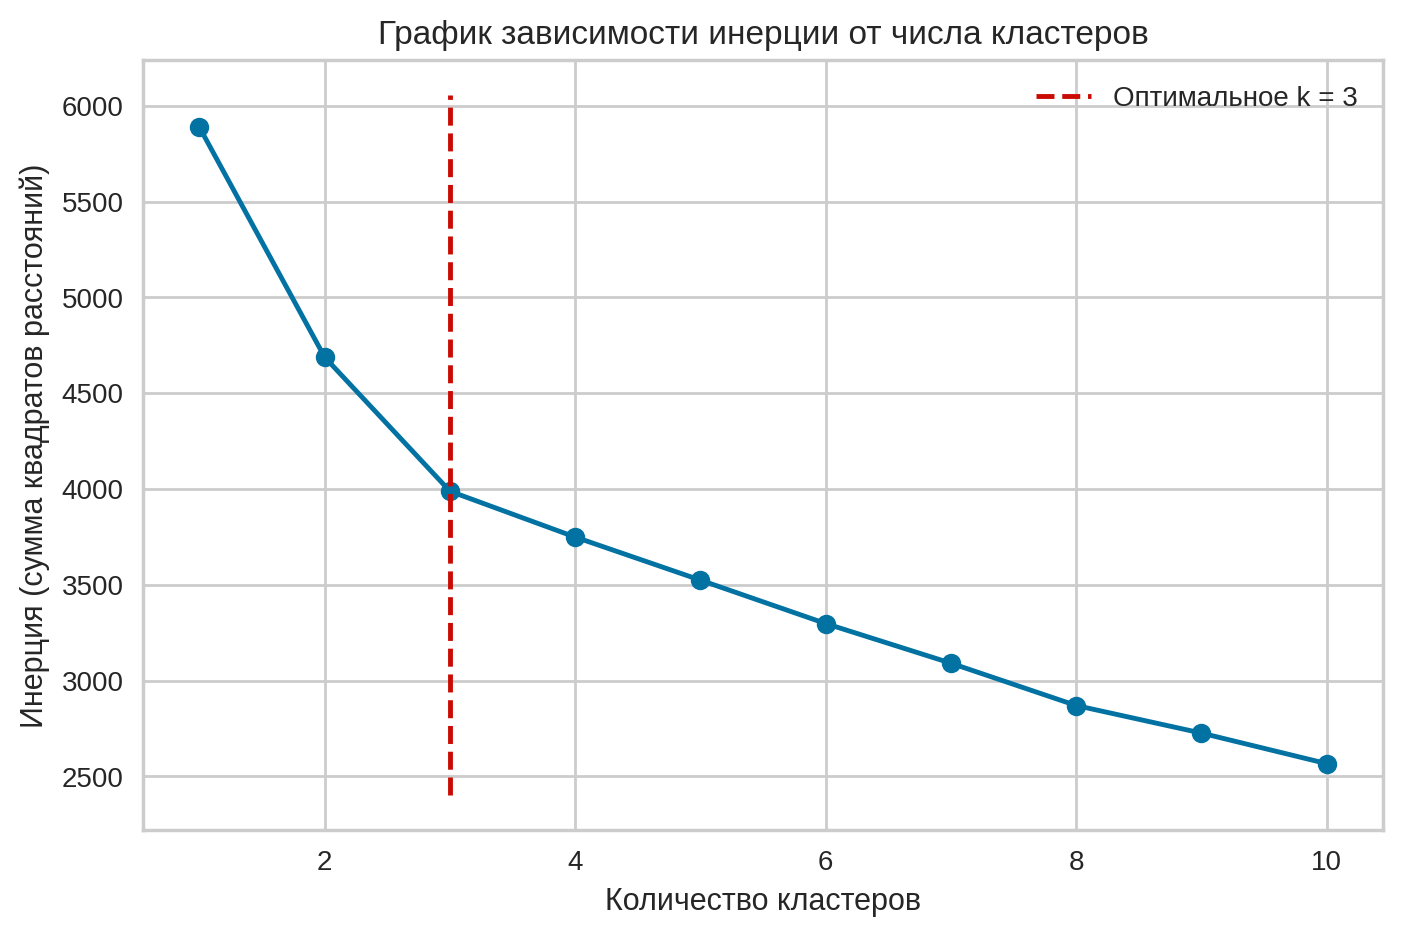

Распределение наблюдений по кластерам:
Cluster
0    177
1     22
2     57
Name: count, dtype: int64


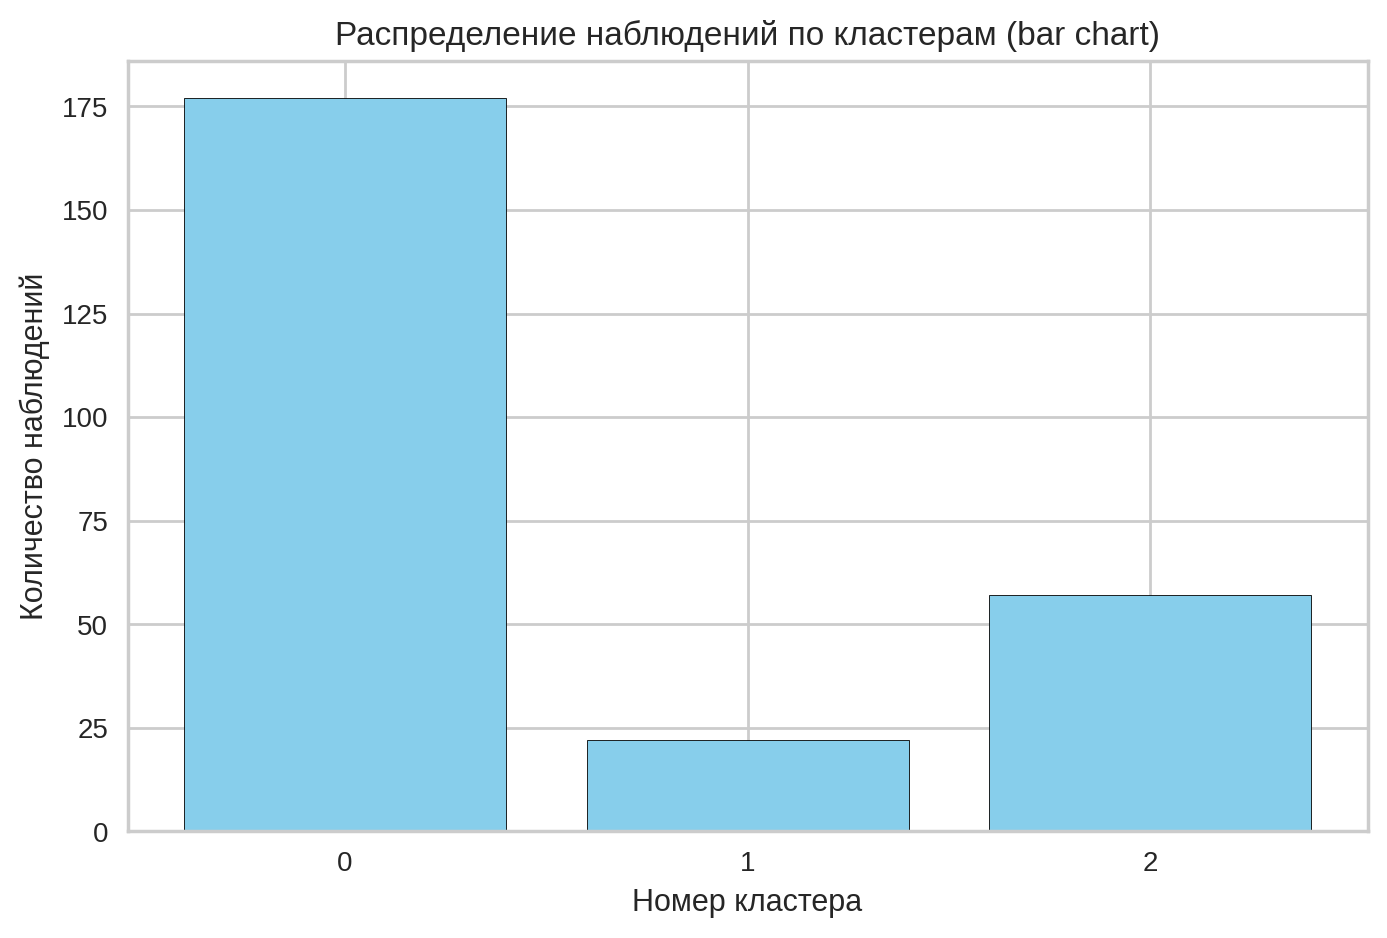

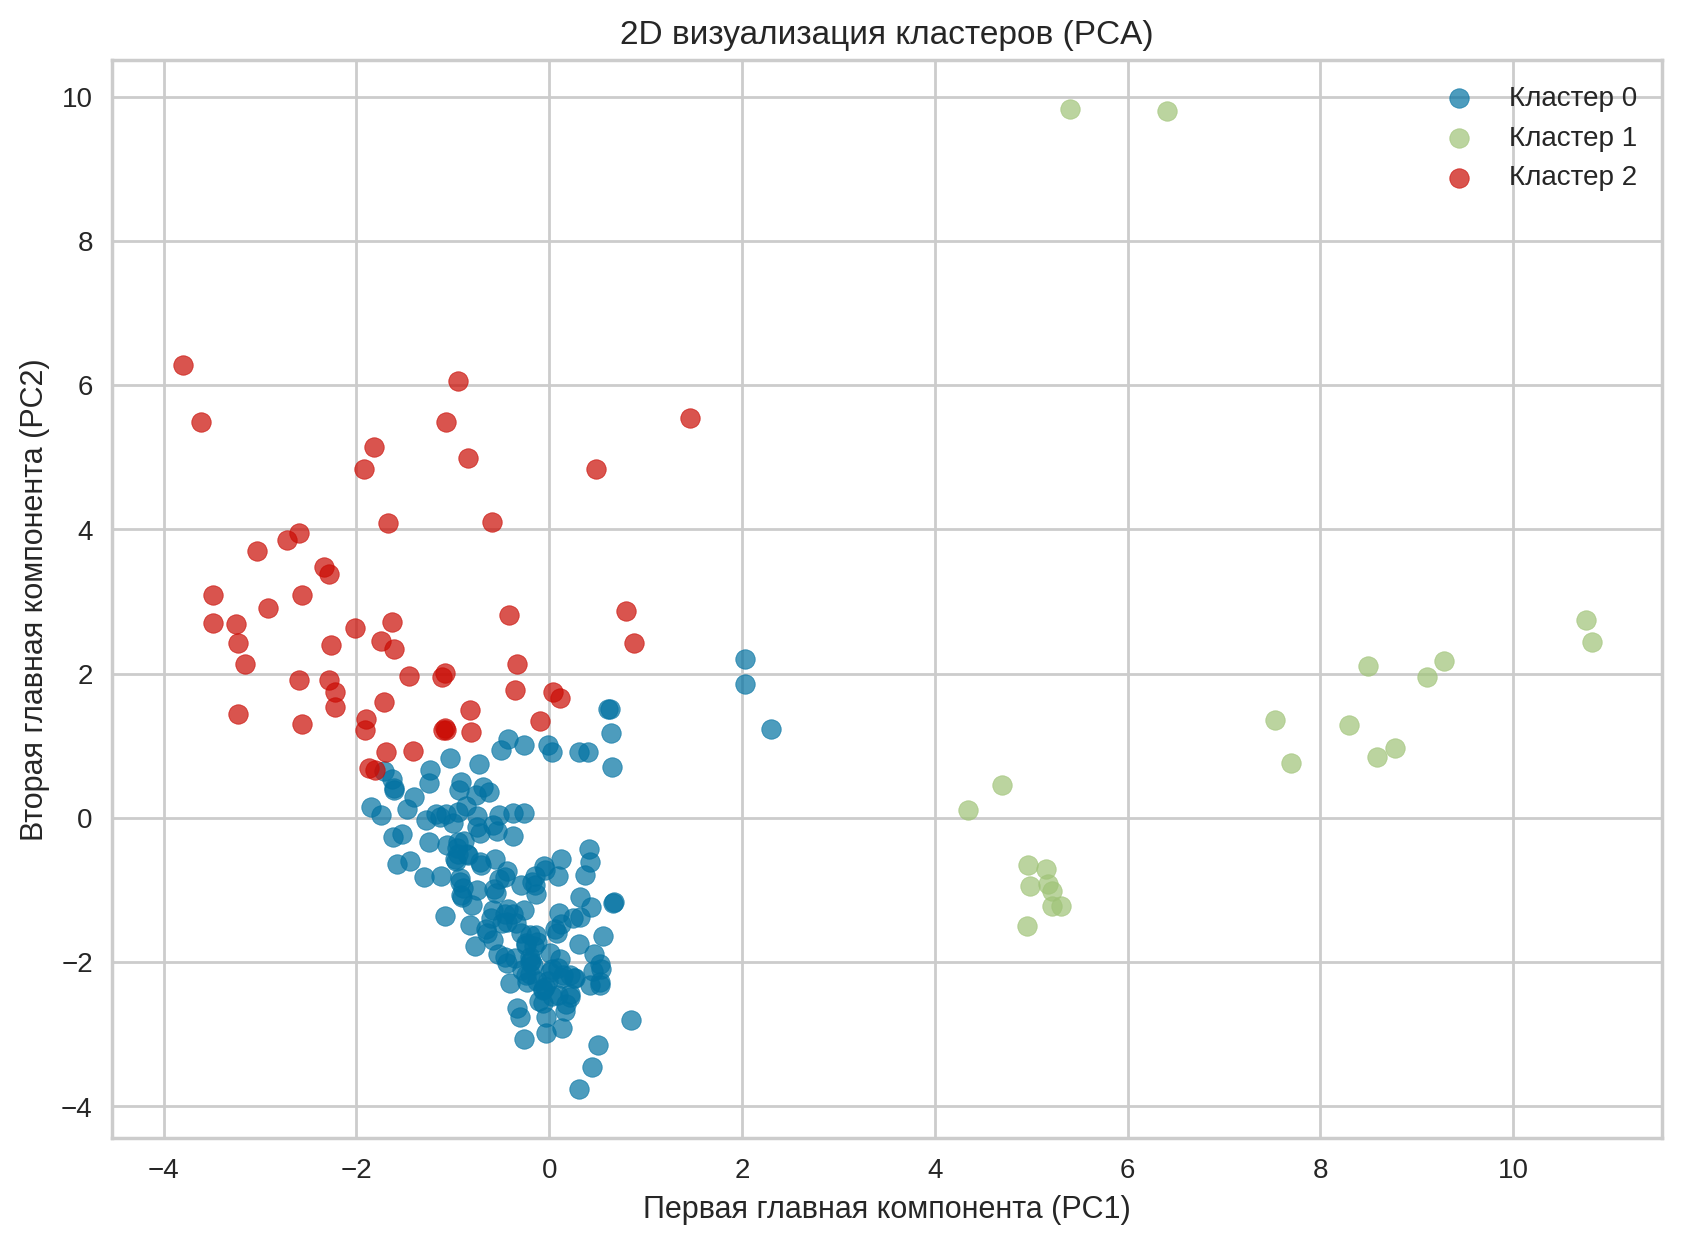

Кластерные метки сохранены в файл: clusters_assignment.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Результаты кластеризации методом k-средних сохранены в файл: clusters_assignment.xlsx


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.decomposition import PCA

# Предполагается, что df_scaled – ваш стандартизированный DataFrame
# Если данные не сброшены, можно сделать:
df_scaled_reset = df_scaled.reset_index(drop=True)

# Определяем диапазон возможных кластеров
max_k = 10  # можно изменить диапазон по необходимости
inertias = []

# Вычисляем инерцию для k от 1 до max_k
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled_reset)
    inertias.append(kmeans.inertia_)

# Определяем оптимальное k по методу локтя с помощью KneeLocator
kneedle = KneeLocator(range(1, max_k + 1), inertias, curve='convex', direction='decreasing')
optimal_k_elbow = kneedle.knee
print(f"Оптимальное количество кластеров (метод локтя): {optimal_k_elbow}")

# Визуализация графика инерции
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_k + 1), inertias, 'bo-')
plt.xlabel("Количество кластеров")
plt.ylabel("Инерция (сумма квадратов расстояний)")
plt.title("График зависимости инерции от числа кластеров")
if optimal_k_elbow is not None:
    plt.vlines(optimal_k_elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r', label=f'Оптимальное k = {optimal_k_elbow}')
    plt.legend()
plt.show()

# Если оптимальное k не найдено, можно задать стандартное значение (например, 2)
if optimal_k_elbow is None:
    optimal_k_elbow = 2

# Фитим финальную модель KMeans с оптимальным числом кластеров
final_kmeans = KMeans(n_clusters=optimal_k_elbow, random_state=42)
cluster_labels = final_kmeans.fit_predict(df_scaled_reset)

# Создаем DataFrame, где к исходным данным (например, стандартизированным) добавлена колонка с метками кластеров
df_clusters = df_scaled_reset.copy()
df_clusters['Cluster'] = cluster_labels

# Вывод распределения по кластерам (количество наблюдений в каждом кластере)
print("Распределение наблюдений по кластерам:")
cluster_counts = df_clusters['Cluster'].value_counts().sort_index()
print(cluster_counts)

# Визуализация распределения по кластерам через столбчатую диаграмму
plt.figure(figsize=(8, 5))
plt.bar(cluster_counts.index, cluster_counts.values, color="skyblue", edgecolor="black")
plt.xlabel("Номер кластера")
plt.ylabel("Количество наблюдений")
plt.title("Распределение наблюдений по кластерам (bar chart)")
plt.xticks(cluster_counts.index)  # Обеспечит отображение каждой метки кластера
plt.show()

# Визуализация результатов кластеризации:
# Сначала выполняем уменьшение размерности до 2D с помощью PCA.
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_scaled_reset)

# Создаем DataFrame с результатами PCA и добавляем метки кластеров
pca_df = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
pca_df["Cluster"] = cluster_labels

plt.figure(figsize=(10, 7))
# Для каждого кластера строим scatter plot с разными цветами
for cluster in sorted(pca_df["Cluster"].unique()):
    cluster_data = pca_df[pca_df["Cluster"] == cluster]
    plt.scatter(cluster_data["PC1"], cluster_data["PC2"], label=f"Кластер {cluster}", alpha=0.7)
plt.xlabel("Первая главная компонента (PC1)")
plt.ylabel("Вторая главная компонента (PC2)")
plt.title("2D визуализация кластеров (PCA)")
plt.legend()
plt.show()

# Сохранение DataFrame с данными о кластерах в Excel
output_file = "clusters_assignment.xlsx"
df_clusters.to_excel(output_file, index=False)
print(f"Кластерные метки сохранены в файл: {output_file}")

# Если работаете в Google Colab, можно скачать файл:
from google.colab import files
files.download(output_file)

print(f"Результаты кластеризации методом k-средних сохранены в файл: {output_file}")


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

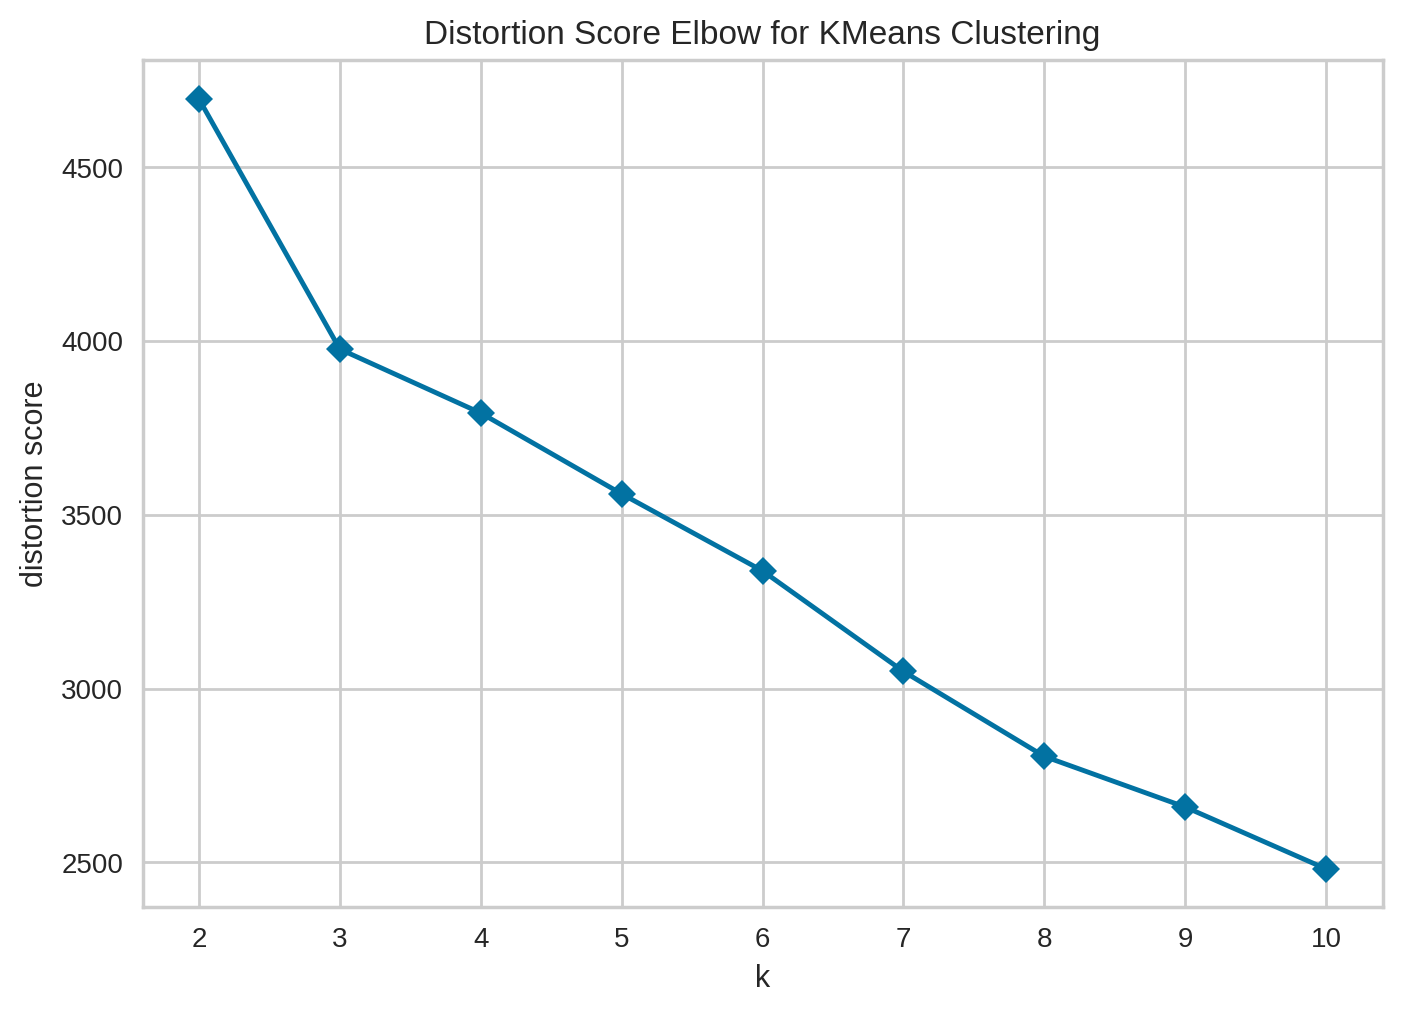

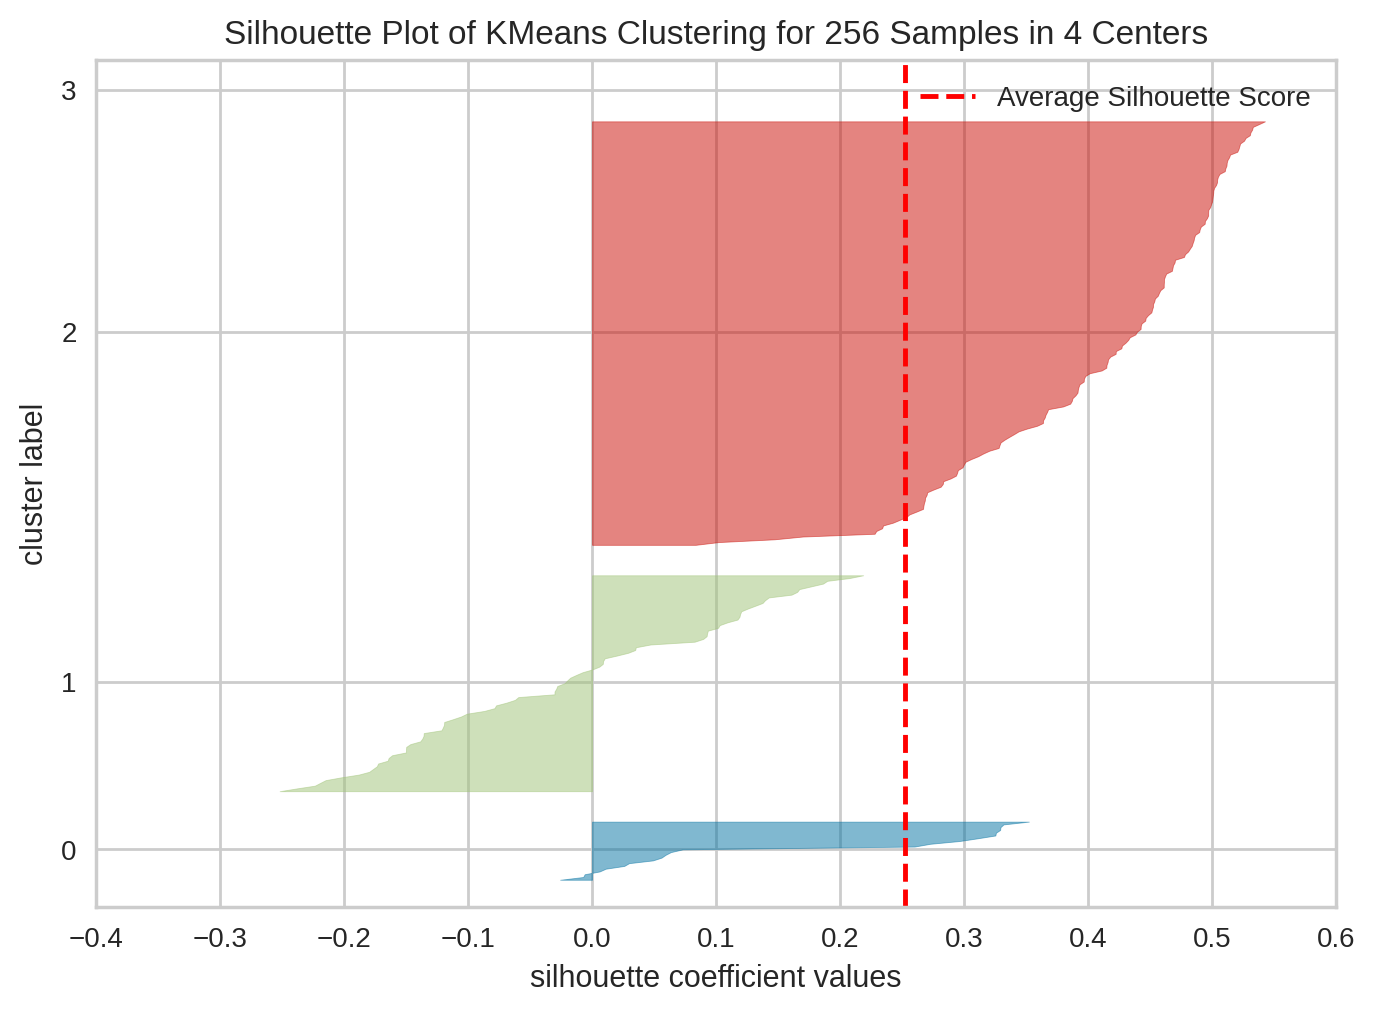

Распределение данных по кластерам:
Cluster  
Cluster 2    154
Cluster 1     79
Cluster 0     22
Cluster 3      1
Name: count, dtype: int64

Пример данных с кластеризацией:
        Zan       Sev     Zerno       krs    Moloko   Promna1   Podrjad  \
0  3.969411 -2.021319 -1.294373 -1.596923 -1.198761  0.215561  3.431040   
1  1.213186 -2.021319 -1.294373 -1.596923 -1.198761 -0.160148  0.330686   
2  0.717814 -2.021319 -1.294373 -1.596923 -1.198761  0.121506  0.830289   
3 -0.191417  1.987596  2.769006  1.172926  1.239829  0.012595 -0.395788   
4  0.032569  0.190079  0.568844  0.690816  0.838912  0.756413 -0.198882   

      IndSh    Vyrna1   MSP1000  ...      Real       VOS       OOS  \
0 -3.303435  5.660338  0.082865  ... -1.186115 -0.282479  0.805441   
1 -3.303435  0.438183 -0.680645  ... -1.011798 -0.829921  0.075154   
2 -3.303435  0.389000 -0.811474  ... -1.113483 -0.282479 -0.227034   
3  0.252273 -0.029306  0.355093  ... -1.113483  0.577788  0.251430   
4  0.560387  0.065744 -0.87

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Результаты кластеризации методом k-means сохранены в файл: kmeans_clustered_data2025.xlsx


In [29]:
# Импорт необходимых библиотек
from pycaret.clustering import *
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns
from sklearn.decomposition import PCA

# Предполагается, что df_scaled — ваш стандартизированный DataFrame
df_scaled_reset = df_scaled.reset_index(drop=True)

# Шаг 2: Инициализация среды
exp_clu = setup(
    data=df_scaled_reset,
    session_id=123,
    normalize=False,
    transformation=False,
    verbose=False
)

# Шаг 3: Создание модели k-means
kmeans_model = create_model('kmeans')

# Шаг 4: Анализ оптимального количества кластеров
plot_model(kmeans_model, plot='elbow')
plot_model(kmeans_model, plot='silhouette')

# Шаг 5: Получение меток кластеров
df_clustered = assign_model(kmeans_model)
print("Распределение данных по кластерам:")
print(df_clustered[['Cluster']].value_counts())
print("\nПример данных с кластеризацией:")
print(df_clustered.head())

# Сохранение результата кластеризации методом k-means в Excel-файл
output_file = 'kmeans_clustered_data2025.xlsx'
df_clustered.to_excel(output_file, index=False)

# Выводим путь для сохраненного файла
from google.colab import files
files.download(output_file)

print(f"Результаты кластеризации методом k-means сохранены в файл: {output_file}")


**k-means без**

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

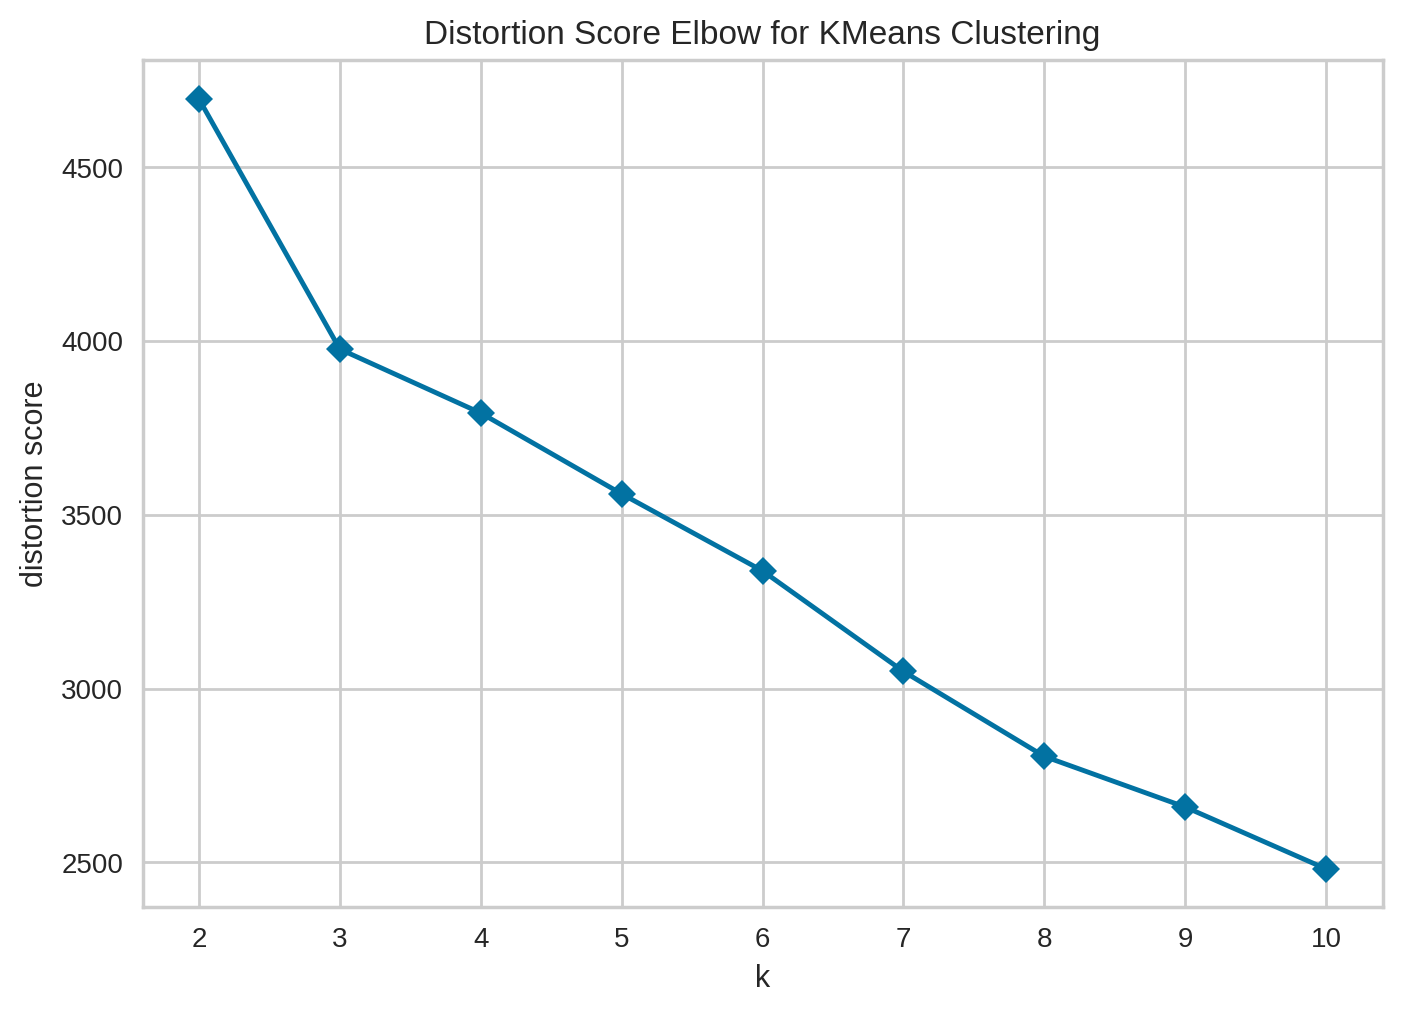

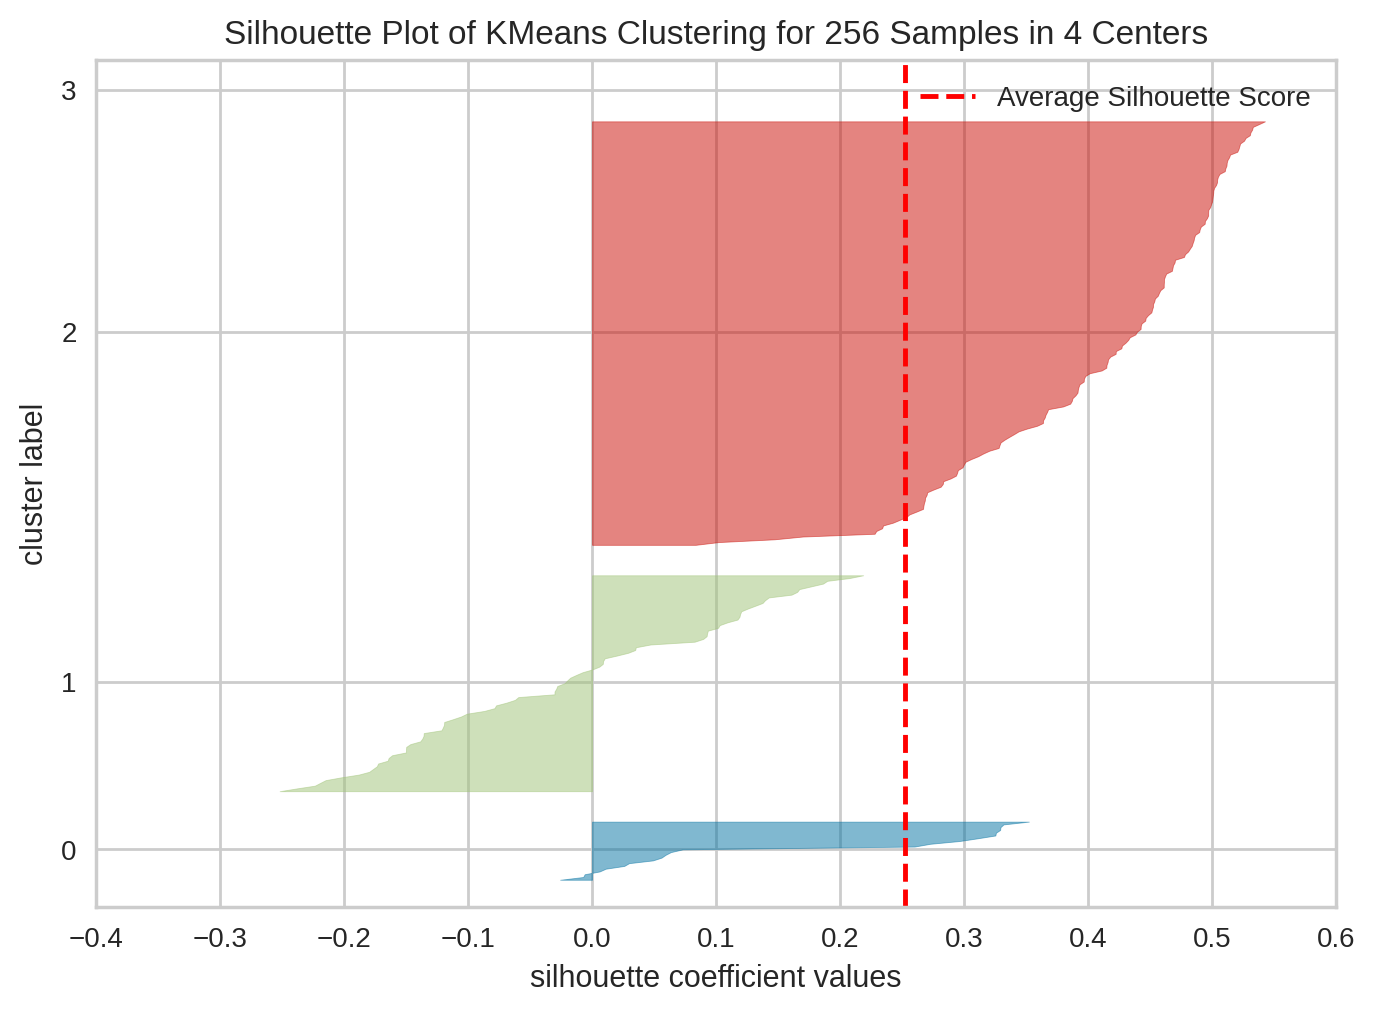

Пример первых строк после кластеризации:
        Zan       Sev     Zerno       krs    Moloko   Promna1   Podrjad  \
0  3.969411 -2.021319 -1.294373 -1.596923 -1.198761  0.215561  3.431040   
1  1.213186 -2.021319 -1.294373 -1.596923 -1.198761 -0.160148  0.330686   
2  0.717814 -2.021319 -1.294373 -1.596923 -1.198761  0.121506  0.830289   
3 -0.191417  1.987596  2.769006  1.172926  1.239829  0.012595 -0.395788   
4  0.032569  0.190079  0.568844  0.690816  0.838912  0.756413 -0.198882   

      IndSh    Vyrna1   MSP1000  ...      Real       VOS       OOS  \
0 -3.303435  5.660338  0.082865  ... -1.186115 -0.282479  0.805441   
1 -3.303435  0.438183 -0.680645  ... -1.011798 -0.829921  0.075154   
2 -3.303435  0.389000 -0.811474  ... -1.113483 -0.282479 -0.227034   
3  0.252273 -0.029306  0.355093  ... -1.113483  0.577788  0.251430   
4  0.560387  0.065744 -0.879077  ... -0.663164  0.004277  0.981718   

   DebitProsr1  KreditProsr1  realskota  VvodEkspluatac    Rentab       Inv  \
0     0.

In [30]:
# Импорт необходимых библиотек
from pycaret.clustering import *
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns

# Предполагается, что df_scaled — ваш стандартизированный DataFrame
df_scaled_reset = df_scaled.reset_index(drop=True)

# Шаг 2: Инициализация среды кластеризации PyCaret
exp_clu = setup(
    data=df_scaled_reset,
    session_id=123,
    normalize=False,
    transformation=False,
    verbose=False
)

# Шаг 3: Создание модели k-means
kmeans_model = create_model('kmeans')

# Шаг 4: Анализ оптимального количества кластеров
plot_model(kmeans_model, plot='elbow')  # График "локтя" для определения оптимального числа кластеров
plot_model(kmeans_model, plot='silhouette')  # График коэффициента силуэта

# Шаг 5: Получение меток кластеров
df_clustered = assign_model(kmeans_model)
print("Пример первых строк после кластеризации:")
print(df_clustered.head())

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

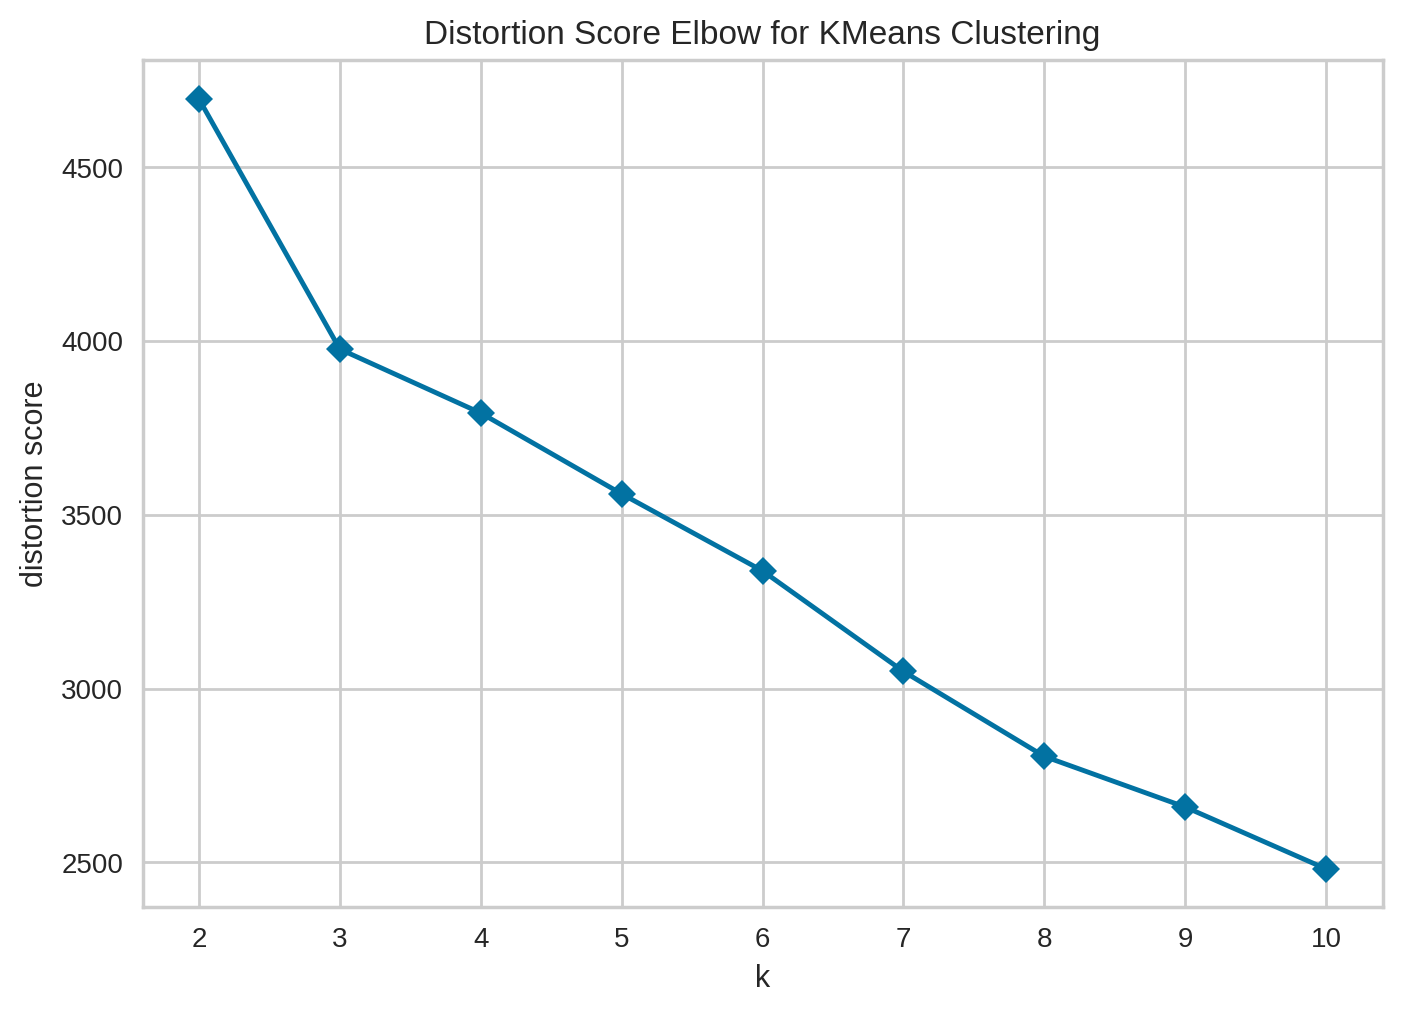

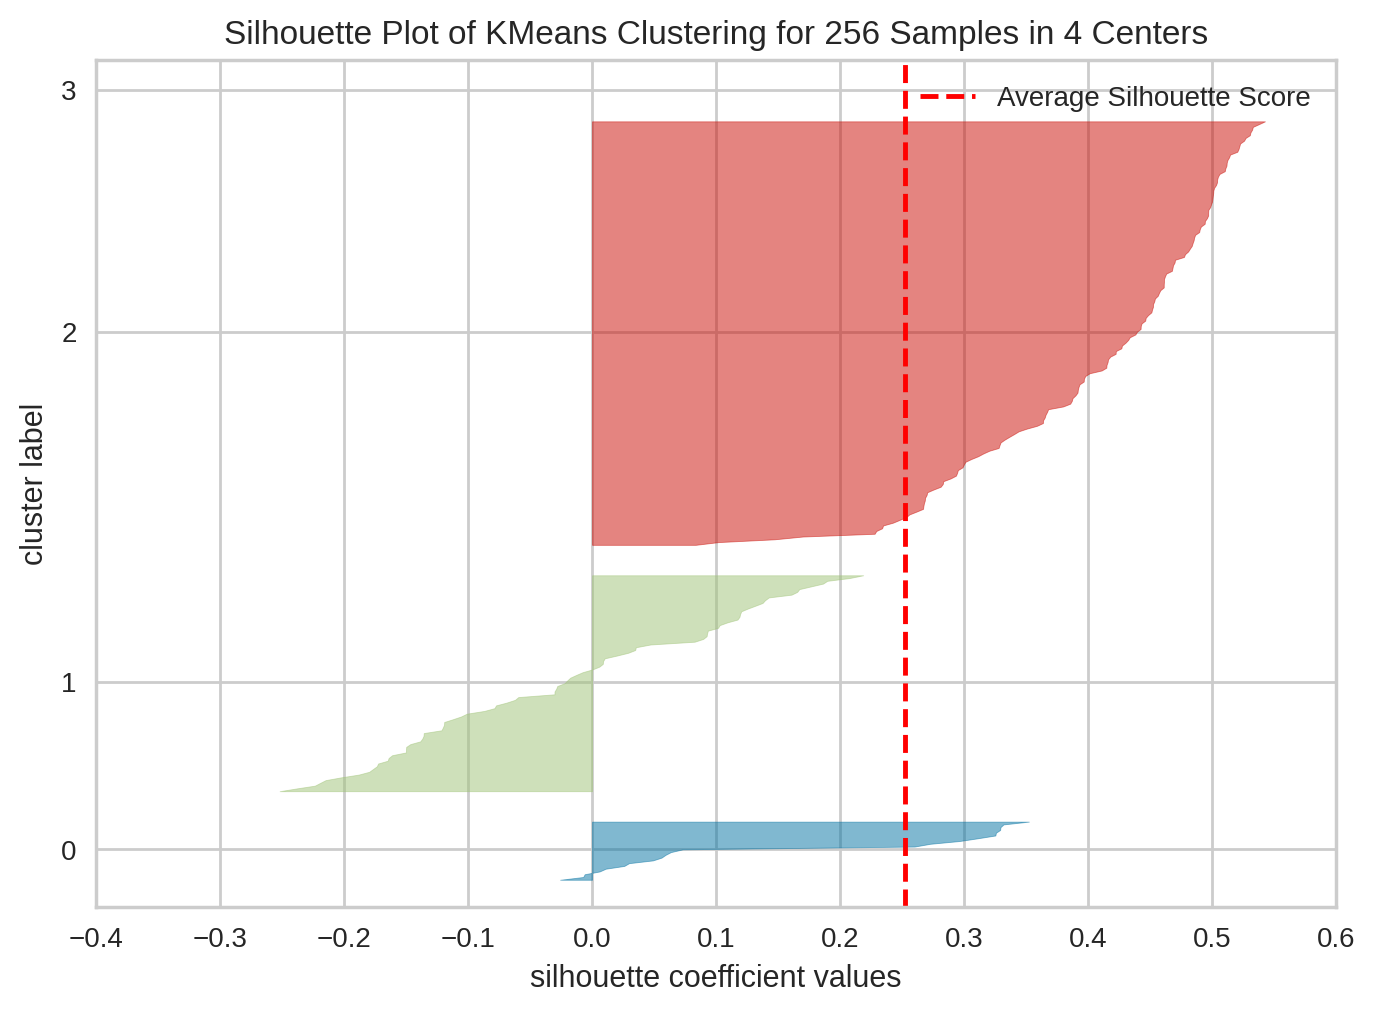

Распределение данных по кластерам (k-means):
Cluster  
Cluster 2    154
Cluster 1     79
Cluster 0     22
Cluster 3      1
Name: count, dtype: int64

Пример данных с кластеризацией (k-means):
        Zan       Sev     Zerno       krs    Moloko   Promna1   Podrjad  \
0  3.969411 -2.021319 -1.294373 -1.596923 -1.198761  0.215561  3.431040   
1  1.213186 -2.021319 -1.294373 -1.596923 -1.198761 -0.160148  0.330686   
2  0.717814 -2.021319 -1.294373 -1.596923 -1.198761  0.121506  0.830289   
3 -0.191417  1.987596  2.769006  1.172926  1.239829  0.012595 -0.395788   
4  0.032569  0.190079  0.568844  0.690816  0.838912  0.756413 -0.198882   

      IndSh    Vyrna1   MSP1000  ...      Real       VOS       OOS  \
0 -3.303435  5.660338  0.082865  ... -1.186115 -0.282479  0.805441   
1 -3.303435  0.438183 -0.680645  ... -1.011798 -0.829921  0.075154   
2 -3.303435  0.389000 -0.811474  ... -1.113483 -0.282479 -0.227034   
3  0.252273 -0.029306  0.355093  ... -1.113483  0.577788  0.251430   
4  0.56

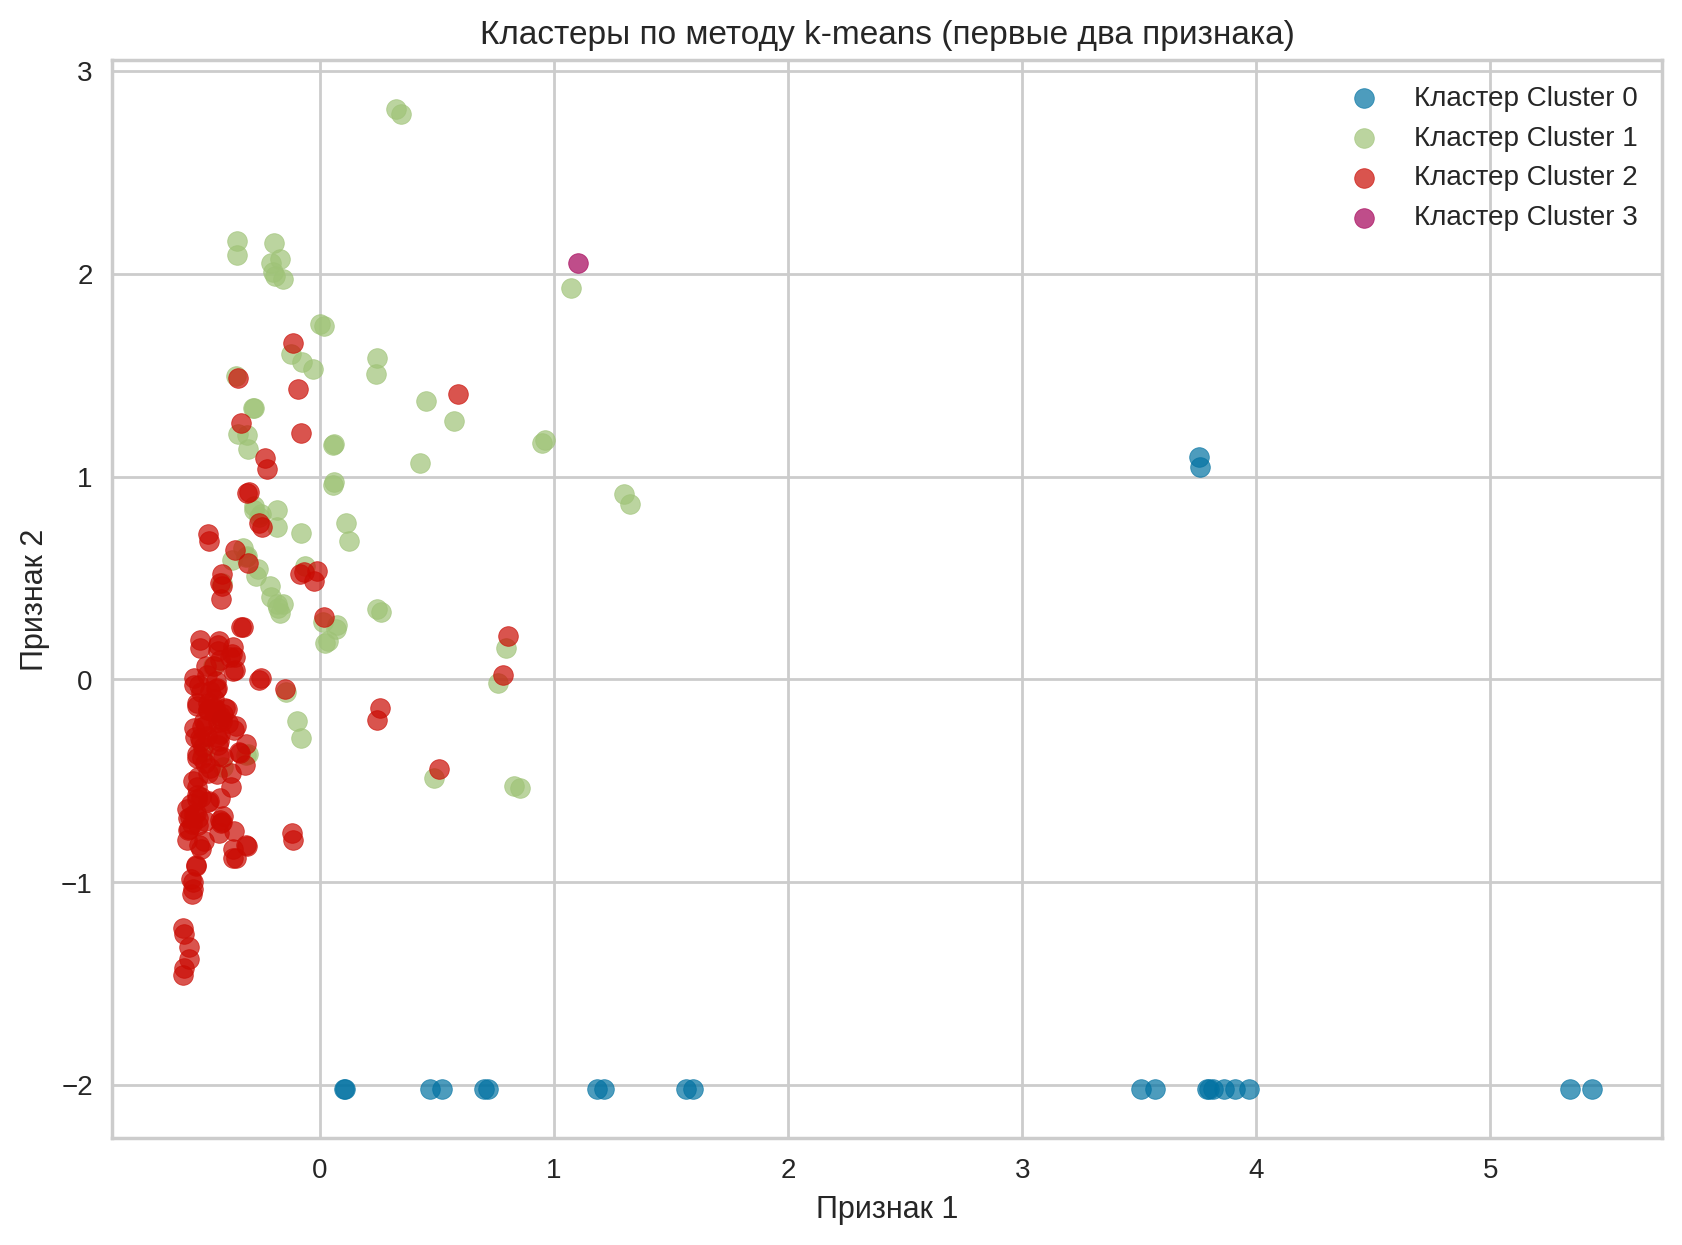

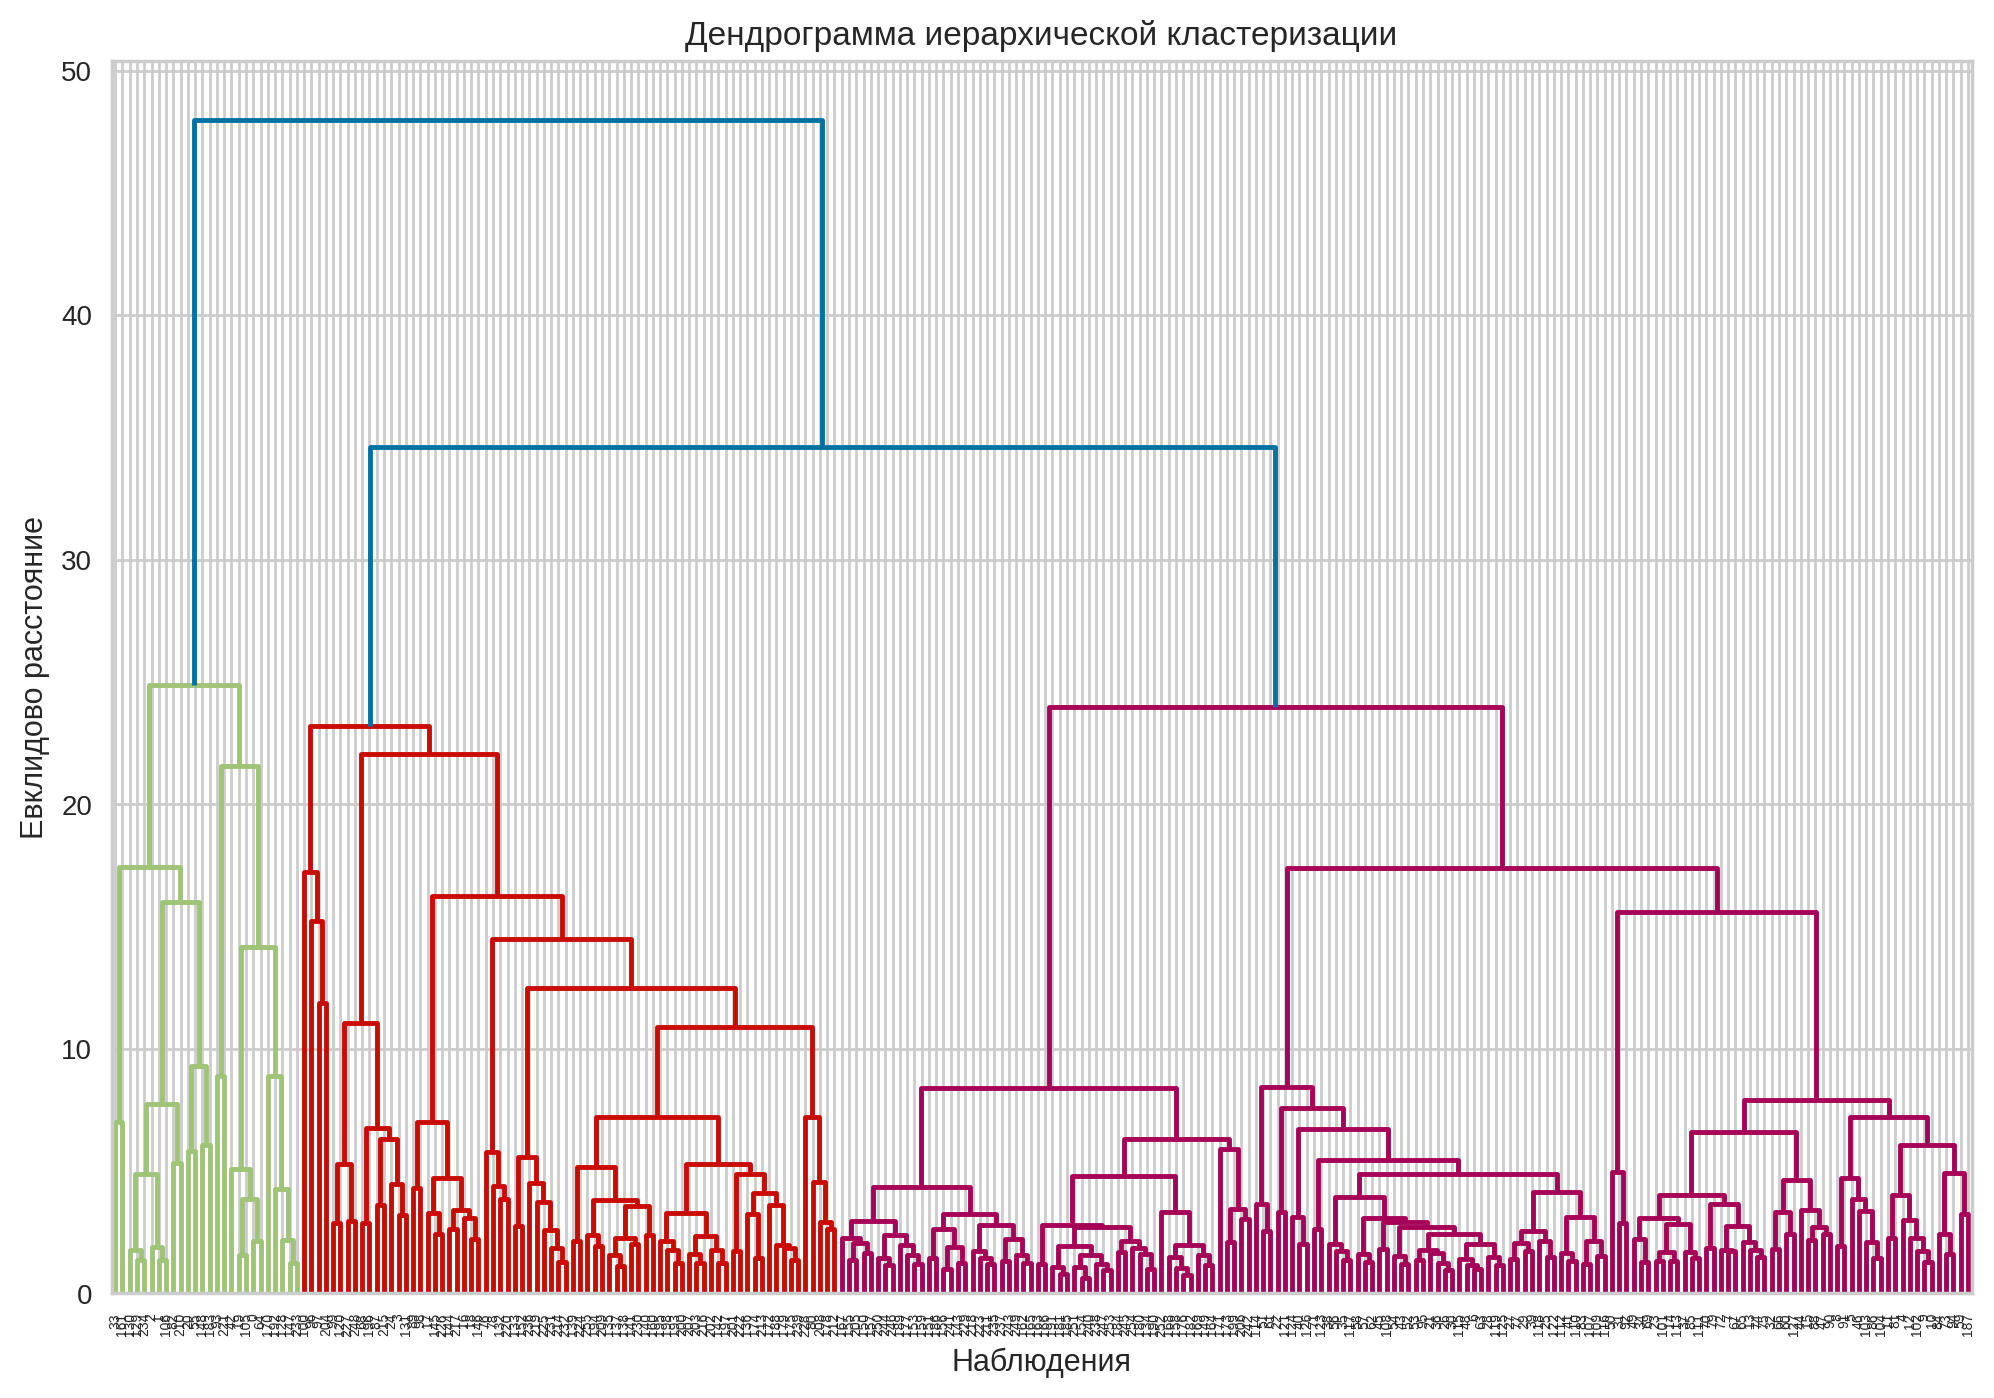

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Распределение данных по кластерам (DBSCAN):
Кластер_DBSCAN
Cluster 1         201
Cluster -1         49
Cluster 0           6
Name: count, dtype: int64


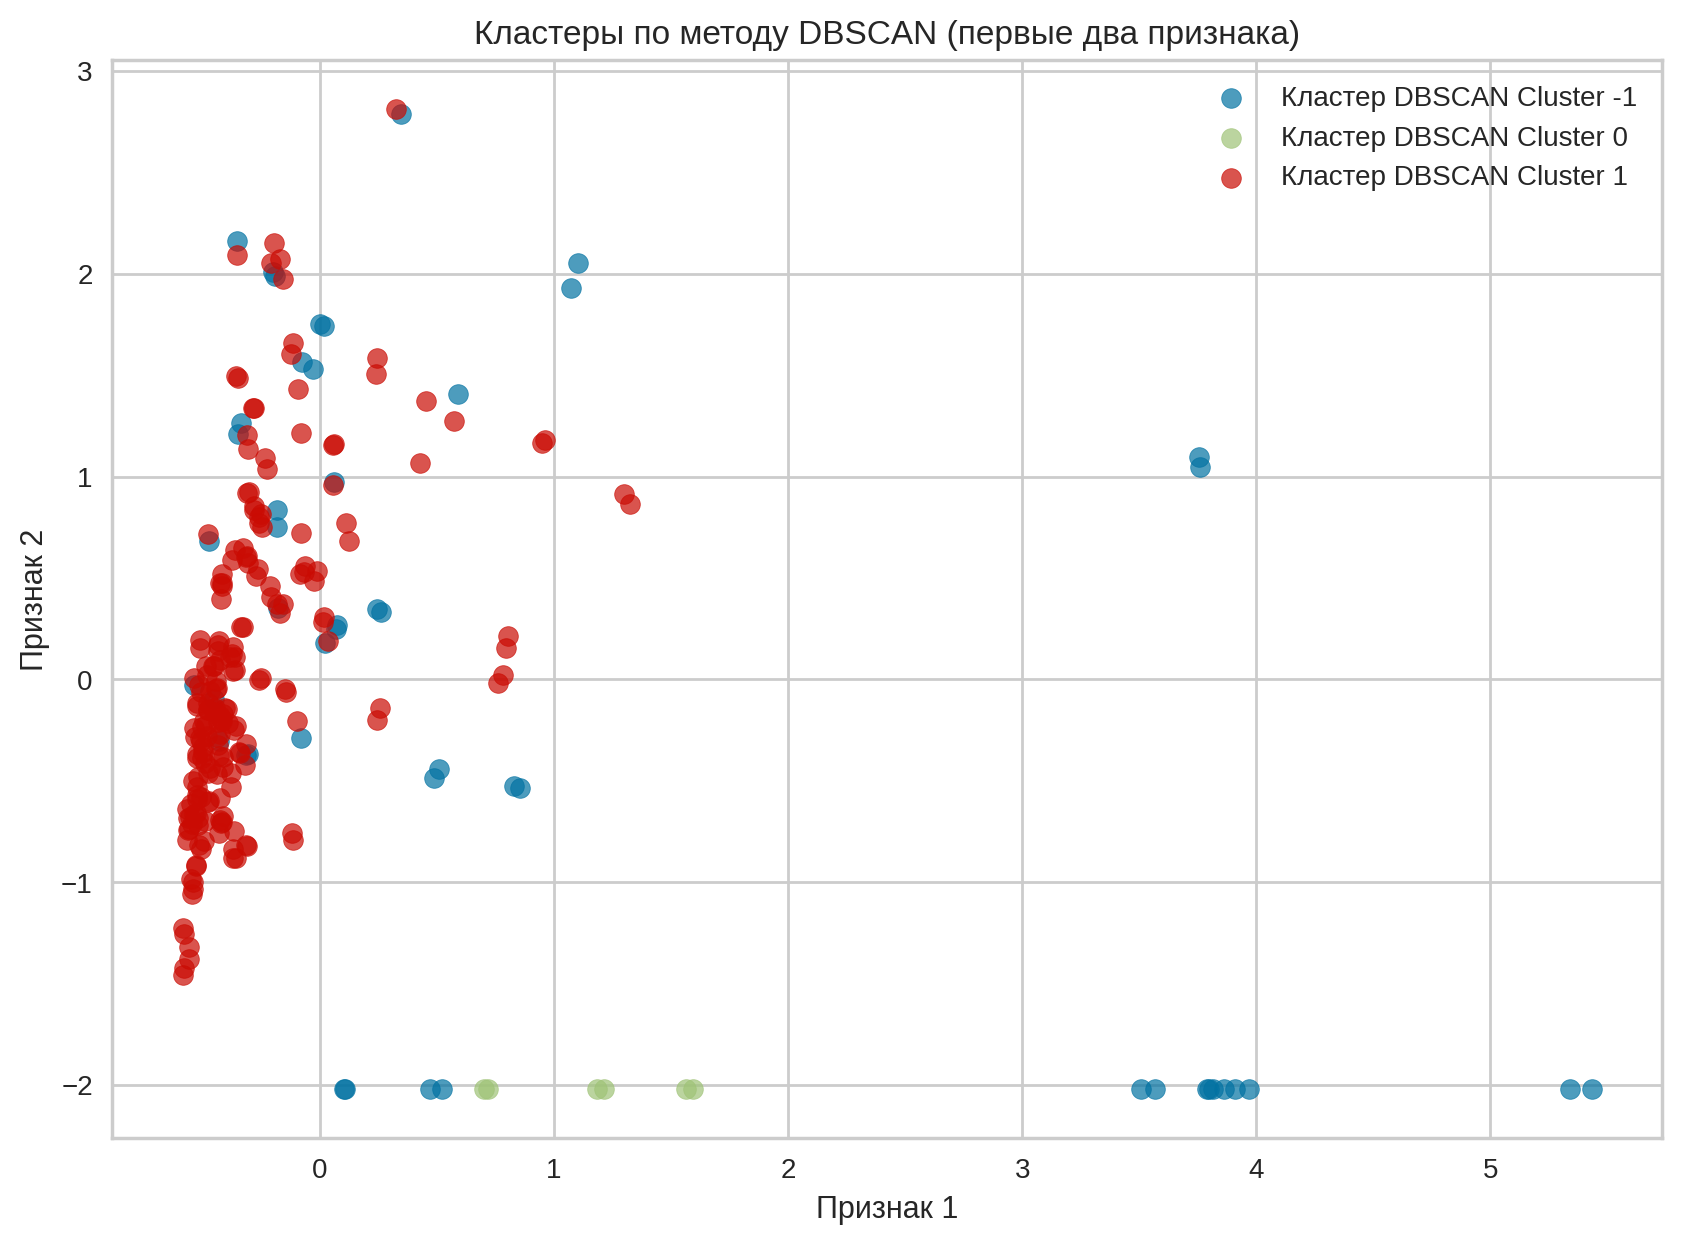

Результаты кластеризации сохранены в файл: kmeans_clustered_data_безPCA.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
# Импорт необходимых библиотек
from pycaret.clustering import *
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Предполагается, что df_scaled — ваш стандартизированный DataFrame
df_scaled_reset = df_scaled.reset_index(drop=True)

# Шаг 2: Инициализация среды кластеризации PyCaret
exp_clu = setup(
    data=df_scaled_reset,
    session_id=123,
    normalize=False,
    transformation=False,
    verbose=False
)

# Шаг 3: Создание модели k-means
kmeans_model = create_model('kmeans')

# Шаг 4: Анализ оптимального количества кластеров
plot_model(kmeans_model, plot='elbow')      # График "локтя"
plot_model(kmeans_model, plot='silhouette')  # График коэффициента силуэта

# Шаг 5: Получение меток кластеров по методу k-means
df_clustered = assign_model(kmeans_model)
print("Распределение данных по кластерам (k-means):")
print(df_clustered[['Cluster']].value_counts())
print("\nПример данных с кластеризацией (k-means):")
print(df_clustered.head())

# Визуализация кластеров методом k-means (используются первые два признака)
plt.figure(figsize=(10, 7))
for cluster in sorted(df_clustered['Cluster'].unique()):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster]
    plt.scatter(
        cluster_data.iloc[:, 0],  # Первый признак
        cluster_data.iloc[:, 1],  # Второй признак
        label=f"Кластер {cluster}",
        s=50,
        alpha=0.7
    )
plt.title("Кластеры по методу k-means (первые два признака)")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()
plt.grid(True)
plt.show()

# Шаг 6: Иерархическая кластеризация
linked = linkage(df_scaled_reset, method='ward')

# Визуализация дендрограммы
plt.figure(figsize=(12, 8))
dendrogram(linked, labels=df_scaled_reset.index.tolist(), color_threshold=0.7 * max(linked[:, 2]))
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Наблюдения')
plt.ylabel('Евклидово расстояние')
plt.show()

# Определение кластеров из дендрограммы (например, выбираем 3 кластера)
hierarchical_clusters = fcluster(linked, t=3, criterion='maxclust')
df_clustered['Кластер_иерархический'] = hierarchical_clusters

# Шаг 7: Кластеризация методом DBSCAN с использованием PyCaret
# Передаём параметры eps и min_samples, чтобы DBSCAN смог выделять кластеры
dbscan_model = create_model('dbscan', eps=3, min_samples=5)
df_dbscan = assign_model(dbscan_model)

# Переименовываем столбец кластеров, чтобы не перезаписывать результаты k-means
df_dbscan.rename(columns={"Cluster": "Кластер_DBSCAN"}, inplace=True)

# Если порядок строк совпадает, можно добавить метки DBSCAN в основной DataFrame:
df_clustered['Кластер_DBSCAN'] = df_dbscan['Кластер_DBSCAN']

print("Распределение данных по кластерам (DBSCAN):")
print(df_clustered[['Кластер_DBSCAN']].value_counts())

# Визуализация кластеров по DBSCAN (используются первые два признака)
plt.figure(figsize=(10, 7))
for cluster in sorted(df_clustered['Кластер_DBSCAN'].unique()):
    cluster_data = df_clustered[df_clustered['Кластер_DBSCAN'] == cluster]
    plt.scatter(
        cluster_data.iloc[:, 0],  # Первый признак
        cluster_data.iloc[:, 1],  # Второй признак
        label=f"Кластер DBSCAN {cluster}",
        s=50,
        alpha=0.7
    )
plt.title("Кластеры по методу DBSCAN (первые два признака)")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()
plt.grid(True)
plt.show()


# Шаг 8: Сохранение результата кластеризации в Excel-файл
output_file = 'kmeans_clustered_data_безPCA.xlsx'
df_clustered.to_excel(output_file, index=False)
print(f"Результаты кластеризации сохранены в файл: {output_file}")

# Если вы работаете в Google Colab, загрузим файл
try:
    from google.colab import files
    files.download(output_file)
except ImportError:
    pass


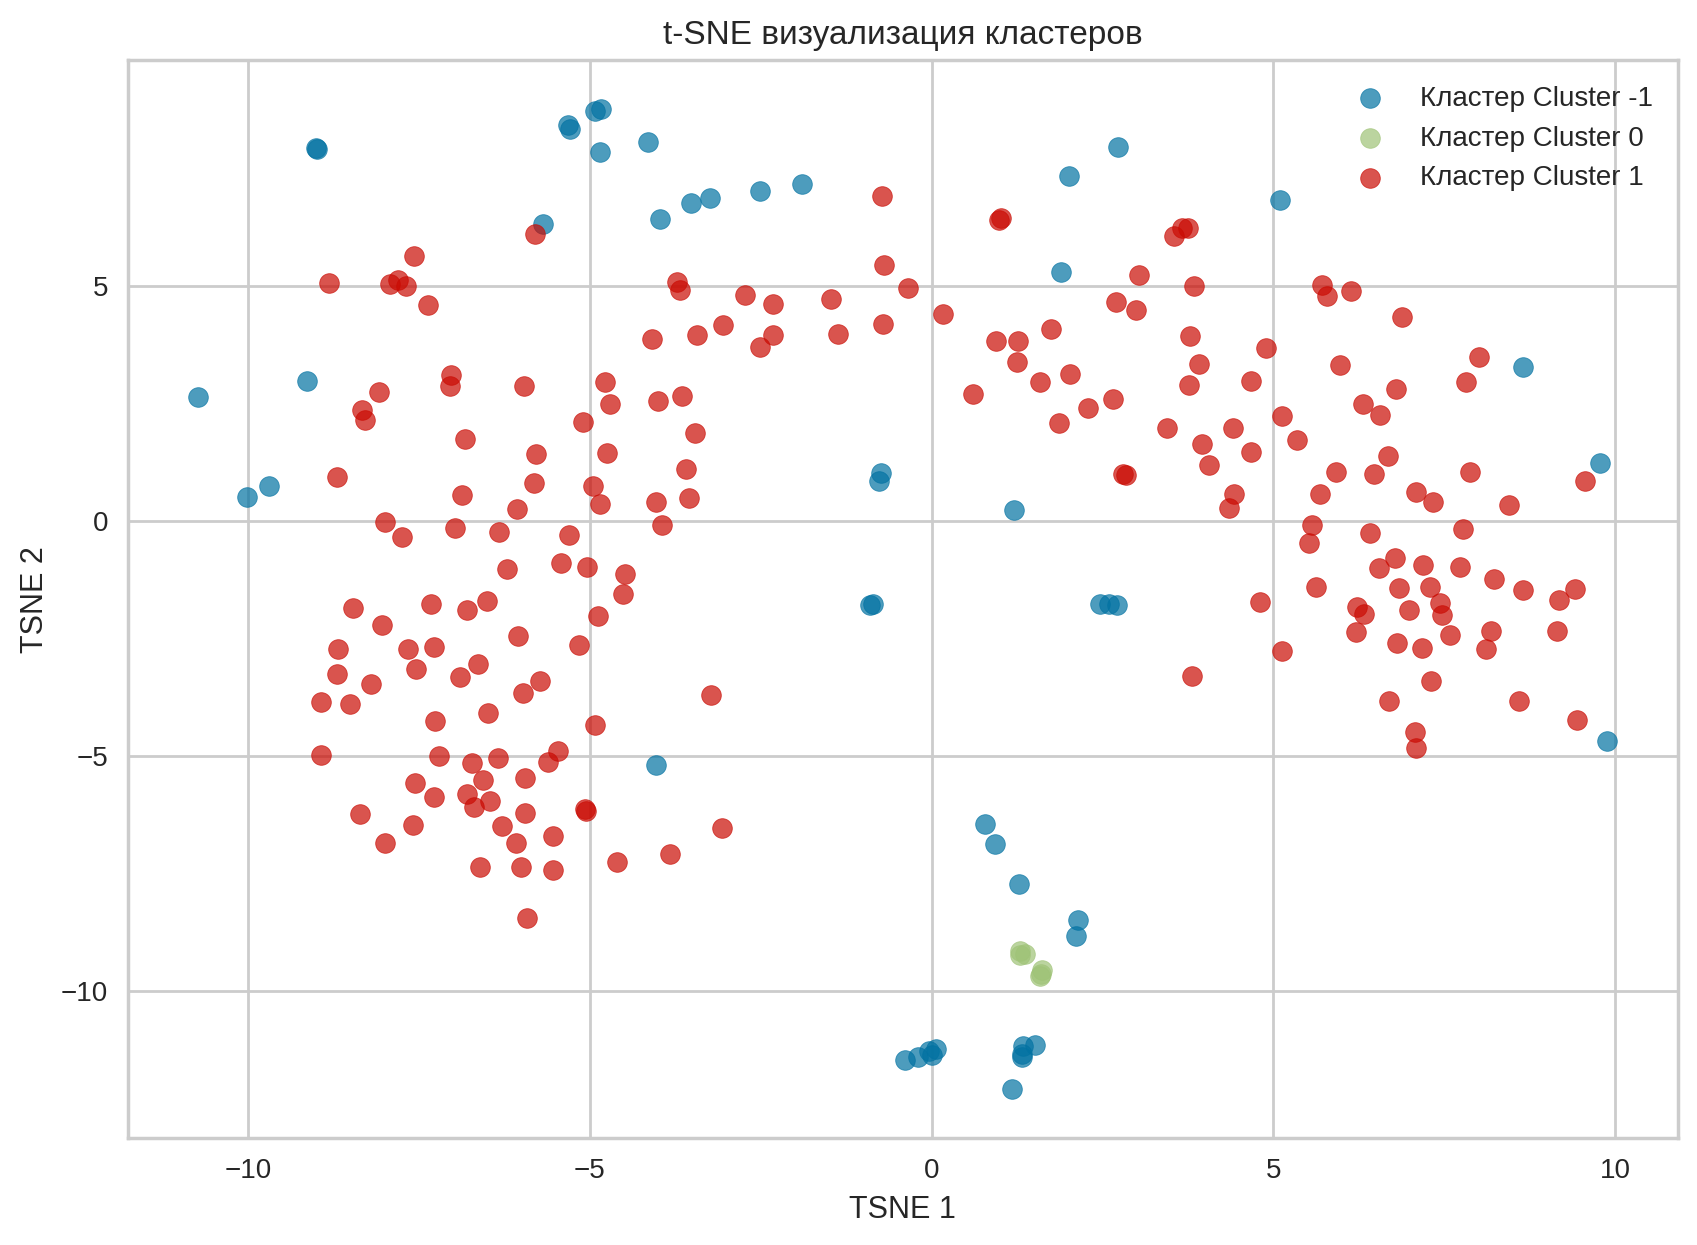

In [32]:
# Импорт необходимых библиотек для t-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

# Предполагается, что df_scaled_reset — ваш стандартизированный DataFrame
# Если у вас ещё нет df_scaled_reset, выполните:
# df_scaled_reset = df_scaled.reset_index(drop=True)

# Применение t-SNE для сведения данных до 2D
# Параметры:
#   n_components=2 — выводим двумерное пространство;
#   perplexity — числовой параметр, зависящий от объёма данных (например, 30);
#   n_iter — количество итераций, можно задать 1000;
#   random_state — для воспроизводимости результатов.
tsne = TSNE(n_components=2, perplexity=40, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(df_scaled_reset)

# Создание DataFrame с результатами t-SNE
df_tsne = df_scaled_reset.copy()
df_tsne['TSNE_1'] = tsne_results[:, 0]
df_tsne['TSNE_2'] = tsne_results[:, 1]

# Если в вашем DataFrame с кластерными метками (например, df_clustered) имеются данные,
# то можно добавить метки кластеров для цветовой визуализации.
# Предположим, что для DBSCAN метки сохранены в столбце "Кластер_DBSCAN".
if 'Кластер_DBSCAN' in df_clustered.columns:
    # Если порядок строк совпадает, добавляем метки в DataFrame с t-SNE результатами.
    df_tsne['Кластер_DBSCAN'] = df_clustered['Кластер_DBSCAN'].values

# Визуализация результатов t-SNE с раскраской по кластерам
plt.figure(figsize=(10, 7))
if 'Кластер_DBSCAN' in df_tsne.columns:
    # Для каждого найденного кластера раскрашиваем точки.
    for cluster in sorted(df_tsne['Кластер_DBSCAN'].unique()):
        cluster_data = df_tsne[df_tsne['Кластер_DBSCAN'] == cluster]
        plt.scatter(cluster_data['TSNE_1'], cluster_data['TSNE_2'],
                    label=f"Кластер {cluster}", s=50, alpha=0.7)
else:
    # Если кластерных меток нет, просто выводим все точки.
    plt.scatter(df_tsne['TSNE_1'], df_tsne['TSNE_2'], s=10, alpha=0.4)

plt.title("t-SNE визуализация кластеров")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.legend()
plt.grid(True)
plt.show()


In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Предполагается, что df_scaled — ваш стандартизированный DataFrame

# Диапазон количества кластеров для проверки
range_n_clusters = list(range(2, 11))

# Сохраняем средние значения коэффициента силуэта для каждого количества кластеров
silhouette_avg_scores_kmeans = []

for n_clusters in range_n_clusters:
    # Создаём модель k-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)

    # Вычисляем средний коэффициент силуэта
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_avg_scores_kmeans.append(silhouette_avg)
    print(f"Для k-means с n_clusters = {n_clusters}, средний коэффициент силуэта = {silhouette_avg}")


Для k-means с n_clusters = 2, средний коэффициент силуэта = 0.4855096110110785
Для k-means с n_clusters = 3, средний коэффициент силуэта = 0.30012181195807086
Для k-means с n_clusters = 4, средний коэффициент силуэта = 0.19542777369964265
Для k-means с n_clusters = 5, средний коэффициент силуэта = 0.21160957098518332
Для k-means с n_clusters = 6, средний коэффициент силуэта = 0.18869076030514348
Для k-means с n_clusters = 7, средний коэффициент силуэта = 0.16535989465223153
Для k-means с n_clusters = 8, средний коэффициент силуэта = 0.14615825033742919
Для k-means с n_clusters = 9, средний коэффициент силуэта = 0.1531670073417897
Для k-means с n_clusters = 10, средний коэффициент силуэта = 0.15712370067441497


In [34]:
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

# Диапазон количества кластеров для проверки
range_n_clusters = list(range(2, 11))

# Сохраняем средние значения коэффициента силуэта для каждого количества кластеров
silhouette_avg_scores_hierarchical = []

# Вычисляем иерархическую кластеризацию
linked = linkage(df_scaled, method='ward')

for n_clusters in range_n_clusters:
    # Задаём количество кластеров
    cluster_labels = fcluster(linked, t=n_clusters, criterion='maxclust')

    # Вычисляем средний коэффициент силуэта
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_avg_scores_hierarchical.append(silhouette_avg)
    print(f"Для иерархической кластеризации с n_clusters = {n_clusters}, средний коэффициент силуэта = {silhouette_avg}")


Для иерархической кластеризации с n_clusters = 2, средний коэффициент силуэта = 0.4778629273931235
Для иерархической кластеризации с n_clusters = 3, средний коэффициент силуэта = 0.2248017141552225
Для иерархической кластеризации с n_clusters = 4, средний коэффициент силуэта = 0.23272815266957958
Для иерархической кластеризации с n_clusters = 5, средний коэффициент силуэта = 0.1182094396900431
Для иерархической кластеризации с n_clusters = 6, средний коэффициент силуэта = 0.13313645374045274
Для иерархической кластеризации с n_clusters = 7, средний коэффициент силуэта = 0.14990345031212937
Для иерархической кластеризации с n_clusters = 8, средний коэффициент силуэта = 0.15769745003779578
Для иерархической кластеризации с n_clusters = 9, средний коэффициент силуэта = 0.16315260663775114
Для иерархической кластеризации с n_clusters = 10, средний коэффициент силуэта = 0.1559903160421986


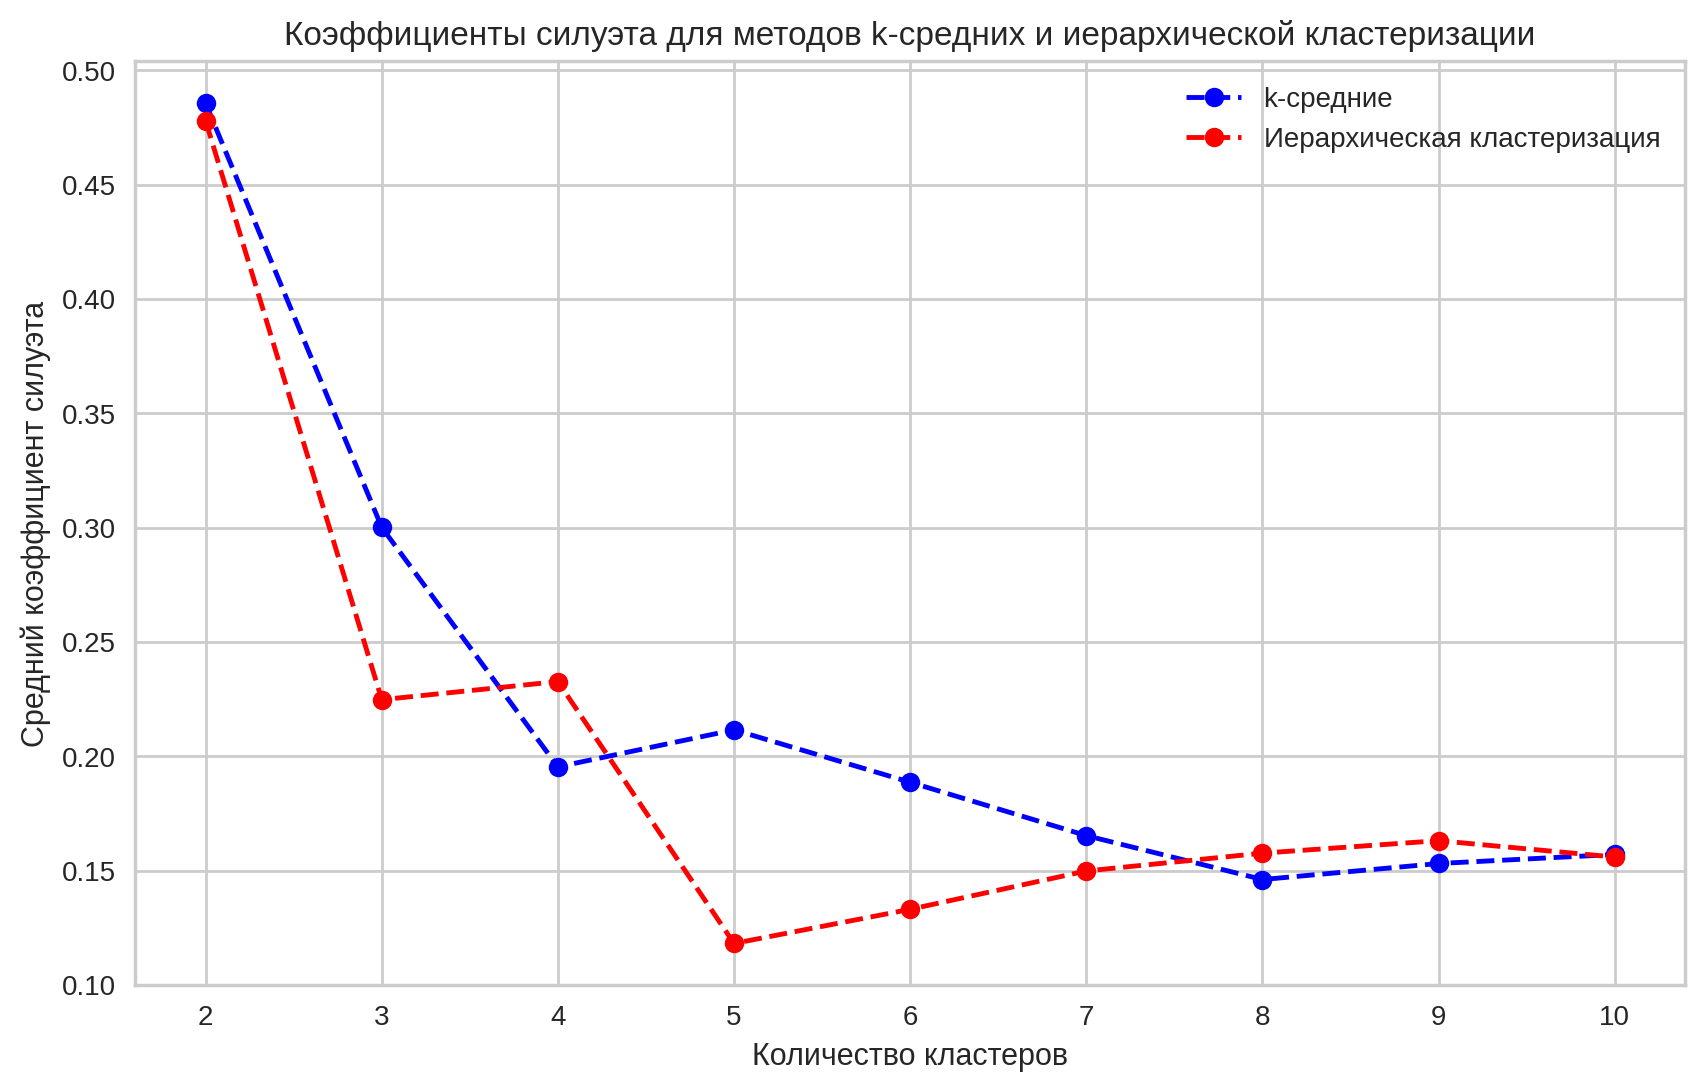

In [35]:
# Построение объединённого графика коэффициентов силуэта
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores_kmeans, marker='o', linestyle='--', label='k-средние', color='blue')
plt.plot(range_n_clusters, silhouette_avg_scores_hierarchical, marker='o', linestyle='--', label='Иерархическая кластеризация', color='red')
plt.title('Коэффициенты силуэта для методов k-средних и иерархической кластеризации')
plt.xlabel('Количество кластеров')
plt.ylabel('Средний коэффициент силуэта')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model = create_model('kmeans', num_clusters=4)
print(model)

In [ ]:
plot_model(model, 'elbow')

[Текст ссылки](https://)ПРобуем другой код fфакторный

In [36]:
import numpy as np
import pandas as pd
from sklearn.decomposition import FactorAnalysis

# Предположим, что ваши стандартизированные данные находятся в DataFrame df_scaled
# df_scaled = ... ваш DataFrame с данными

# Вычисляем корреляционную матрицу
corr_matrix = np.corrcoef(df_scaled, rowvar=False)

# Получаем собственные значения и собственные векторы
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

# Выводим собственные значения
print("Собственные значения:")
print(eigenvalues)

# Определяем количество факторов по критерию Кайзера
num_factors = np.sum(eigenvalues > 1)
print(f"\nОптимальное количество факторов по критерию Кайзера: {num_factors}")


Собственные значения:
[5.72939444 4.67357052 2.6759397  1.55542191 1.25386399 0.96354564
 0.86274047 0.75660276 0.71167128 0.62637429 0.54679683 0.54040716
 0.45278304 0.36921984 0.02469098 0.03964904 0.03012083 0.30225315
 0.2660875  0.11628265 0.19197516 0.14439937 0.16620944]

Оптимальное количество факторов по критерию Кайзера: 5


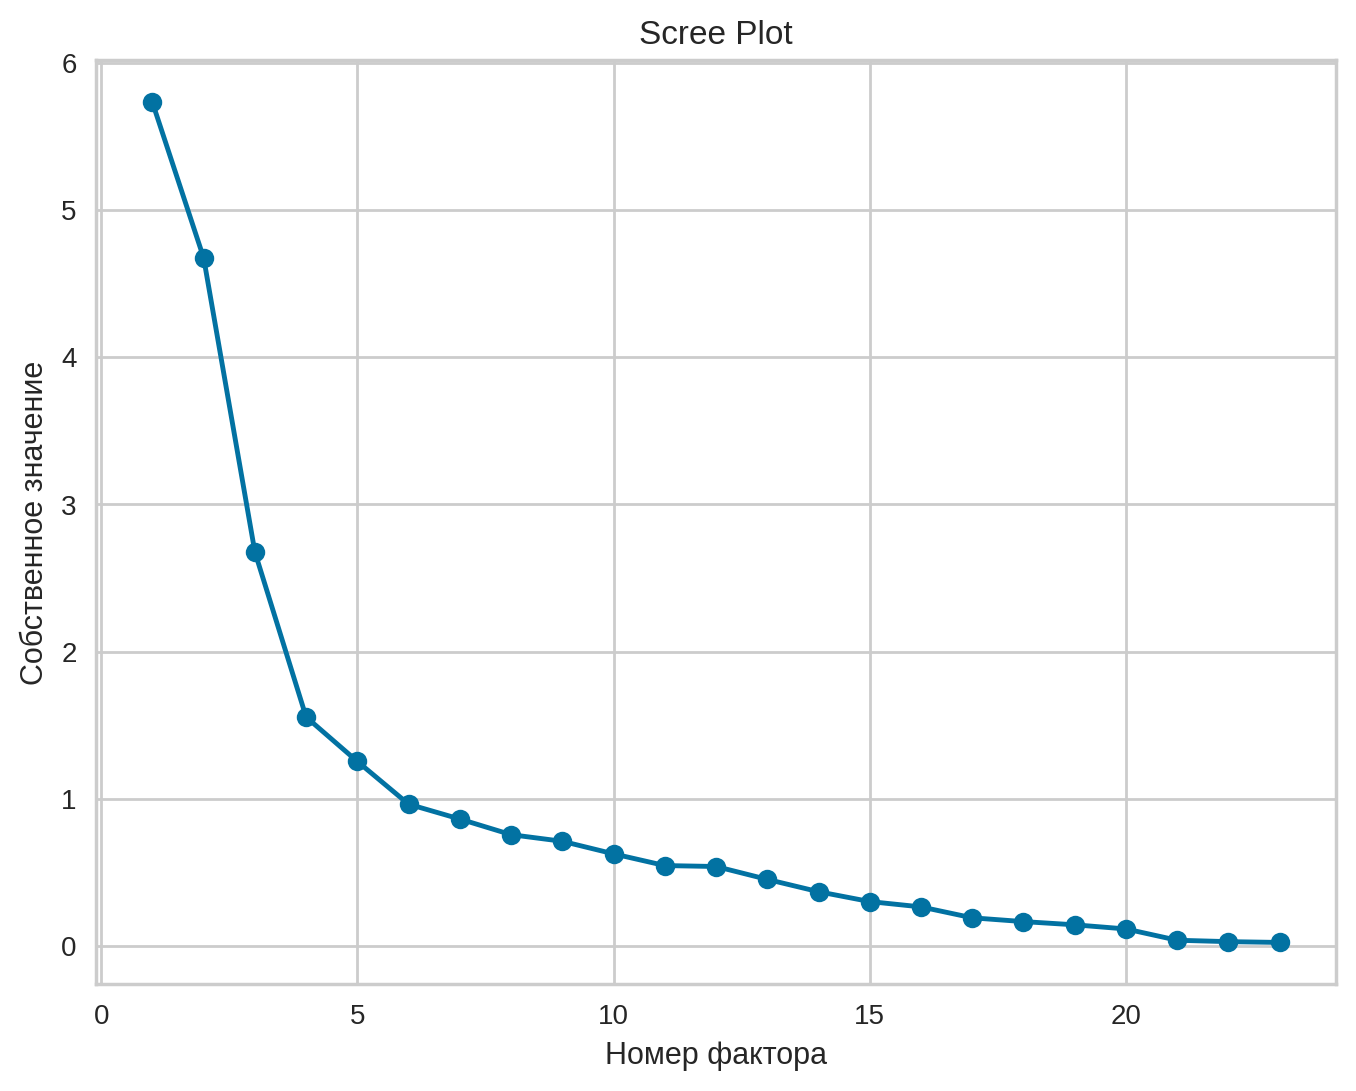

In [37]:
import matplotlib.pyplot as plt

# Сортируем собственные значения в порядке убывания
eigenvalues_sorted = np.sort(eigenvalues)[::-1]

# Строим Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues_sorted)+1), eigenvalues_sorted, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Номер фактора')
plt.ylabel('Собственное значение')
plt.grid(True)
plt.show()


. Параллельный анализ (Parallel Analysis)

In [38]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=606ecb3d42a85b7cb2d185cbfca71115177641c0a2c50e50c5b7d8bed3269ebf
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


KMO: 0.7537274373961339
Bartlett's test p-value: 0.0
[5.72939444 4.67357052 2.6759397  1.55542191 1.25386399 0.96354564
 0.86274047 0.75660276 0.71167128 0.62637429 0.54679683 0.54040716
 0.45278304 0.36921984 0.30225315 0.2660875  0.19197516 0.16620944
 0.14439937 0.11628265 0.03964904 0.03012083 0.02469098]


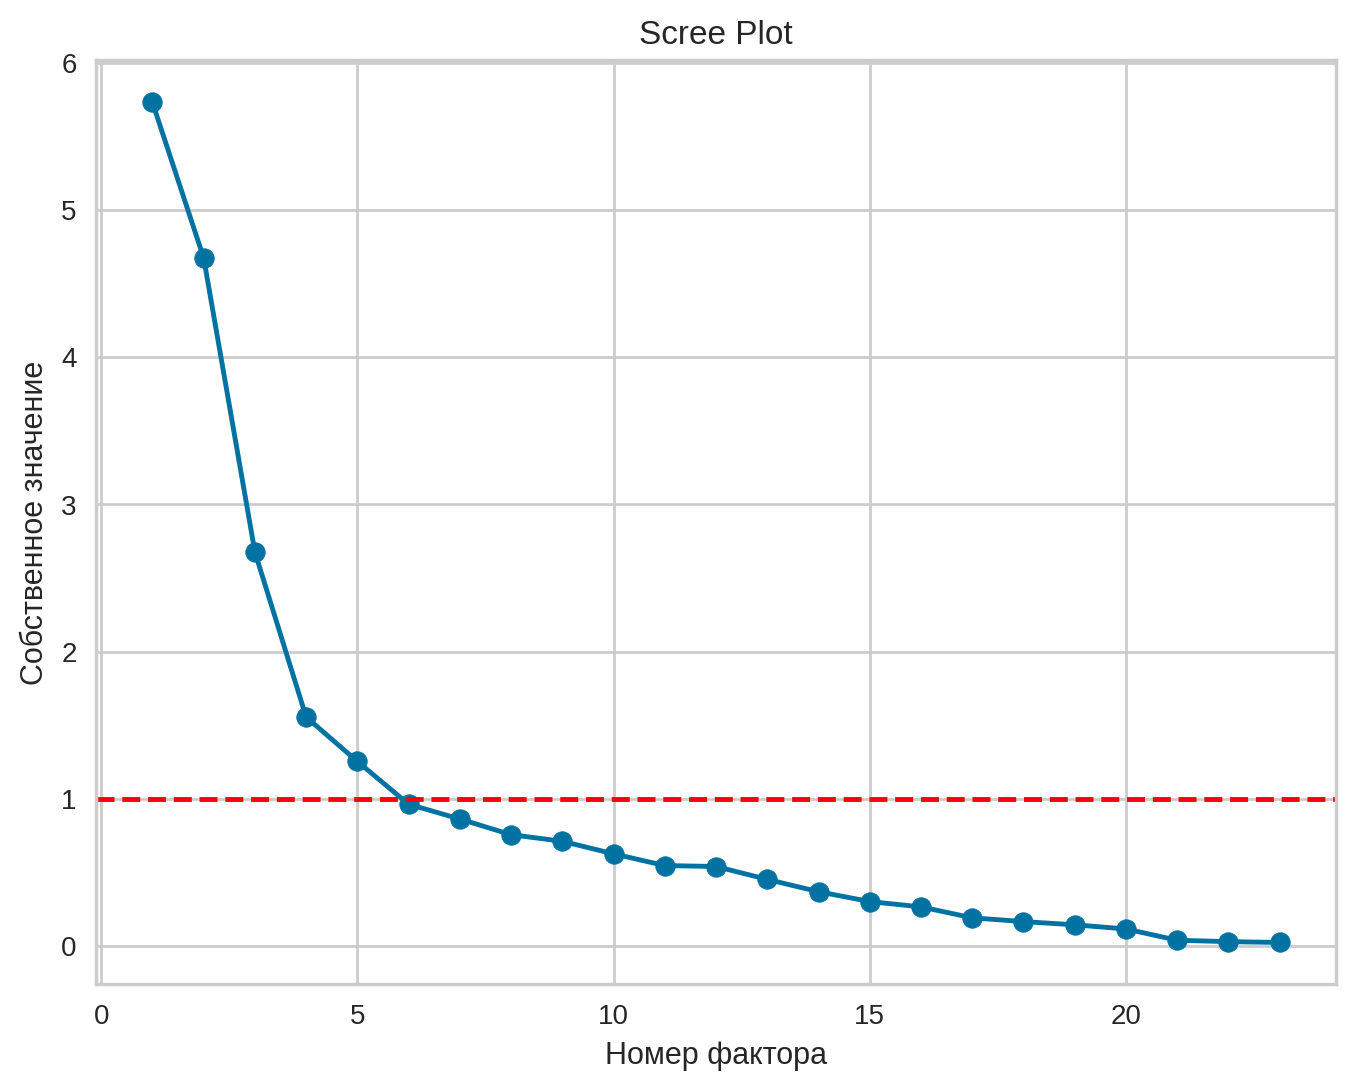

In [39]:
from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Проверка пригодности данных для факторного анализа
kmo_all, kmo_model = calculate_kmo(df_scaled)
print(f"KMO: {kmo_model}")

chi_square_value, p_value = calculate_bartlett_sphericity(df_scaled)
print(f"Bartlett's test p-value: {p_value}")

# Выполняем факторный анализ без указания количества факторов
fa = FactorAnalyzer(rotation=None)
fa.fit(df_scaled)

# Получаем собственные значения до и после извлечения факторов
ev, v = fa.get_eigenvalues()
print(ev)
# Строим Scree Plot с собственными значениями
plt.figure(figsize=(8, 6))
plt.scatter(range(1, len(ev)+1), ev, marker='o')
plt.plot(range(1, len(ev)+1), ev)
plt.title('Scree Plot')
plt.xlabel('Номер фактора')
plt.ylabel('Собственное значение')
plt.axhline(y=1, color='red', linestyle='--')  # Линия на уровне 1
plt.grid(True)
plt.show()



In [47]:
# Суммарная объяснённая дисперсия накапливается в порядке убывания собственных значений
total_variance_explained = np.cumsum(eigenvalues_sorted) / np.sum(eigenvalues_sorted)

# Находим количество факторов, необходимых для объяснения 80% дисперсии
threshold = 0.734
num_factors = np.argmax(total_variance_explained >= threshold) + 1

print(f"Количество факторов для объяснения {threshold*100}% дисперсии: {num_factors}")


Количество факторов для объяснения 73.4% дисперсии: 7


Минимальный Среднеквадратичный Остаток (Minimum Average Partial, MAP)

In [ ]:
!pip install --upgrade pymap
import pymap
print(dir(pymap))



In [ ]:
!pip show pymap

In [ ]:
pip install some_library


In [ ]:
def get_map(data):
    # Your logic here
    return {'n_factors': 6}  # Replace `0` with the actual calculation


In [ ]:
from some_library import get_map



In [48]:
# Выполняем метод MAP
map_result = get_map(df_scaled)
num_factors_map = map_result['n_factors']
print(f"Оптимальное количество факторов по критерию MAP: {num_factors_map}")


NameError: name 'get_map' is not defined

In [ ]:
!pip install --upgrade factor-analyzer


In [ ]:
from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity, calculate_map


In [ ]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer

from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

from factor_analyzer import calculate_map


In [ ]:
pip install --upgrade some_library


In [ ]:
# Install and import
!pip install factor_analyzer

In [21]:

from factor_analyzer import FactorAnalyzer
from factor_analyzer.utils import calculate_map
from some_library import calculate_map

# Assuming df_scaled is your scaled DataFrame
# Perform the MAP test
map_value, n_factors = calculate_map(df_scaled)

print(f"Optimal number of factors according to MAP test: {n_factors}")

# Proceed with factor analysis
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(df_scaled)

# Display loadings
loadings = fa.loadings_
print(pd.DataFrame(loadings, index=df_scaled.columns))


ImportError: cannot import name 'calculate_map' from 'factor_analyzer.utils' (/usr/local/lib/python3.11/dist-packages/factor_analyzer/utils.py)

In [ ]:
!pip install --upgrade scikit-learn matplotlib


**PCA**

In [ ]:
!pip install --upgrade scikit-learn



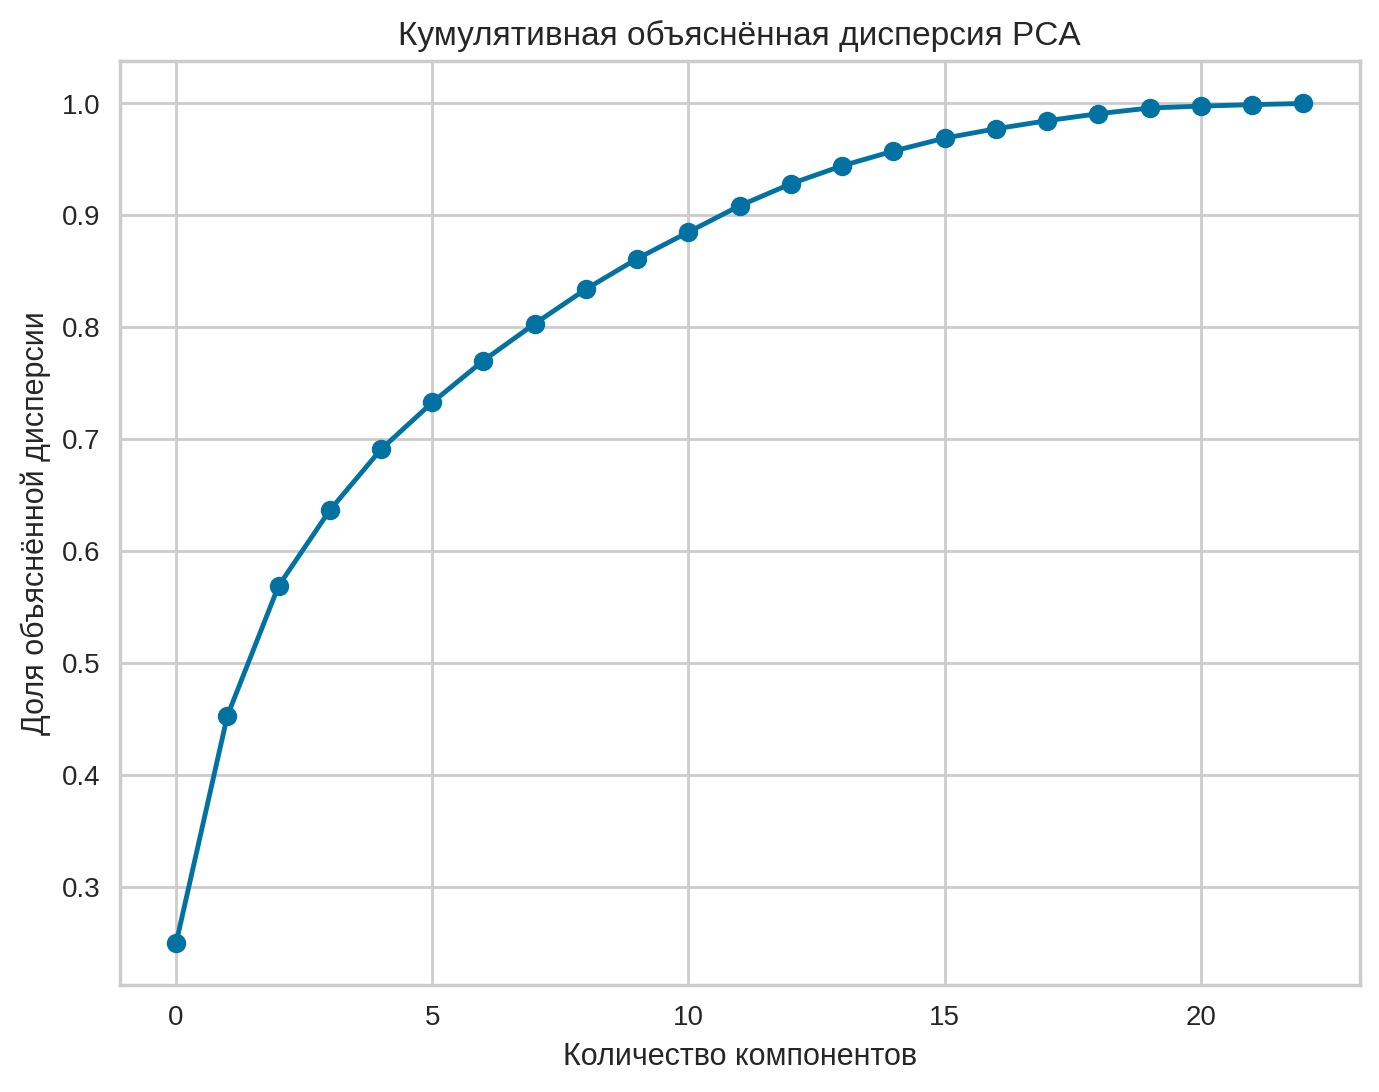

Количество главных компонентов для объяснения 74.0% дисперсии: 7


In [51]:
from sklearn.decomposition import PCA

# Выполняем PCA
pca = PCA().fit(df_scaled)

# Строим Scree Plot для PCA
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.title('Кумулятивная объяснённая дисперсия PCA')
plt.xlabel('Количество компонентов')
plt.ylabel('Доля объяснённой дисперсии')
plt.grid(True)
plt.show()

# Определяем количество факторов для объяснения 80% дисперсии
threshold = 0.74
num_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= threshold) + 1

print(f"Количество главных компонентов для объяснения {threshold*100}% дисперсии: {num_components}")


KMO: 0.7537274373961339
Bartlett's test p-value: 0.0
Количество факторов по критерию Кайзера: 5


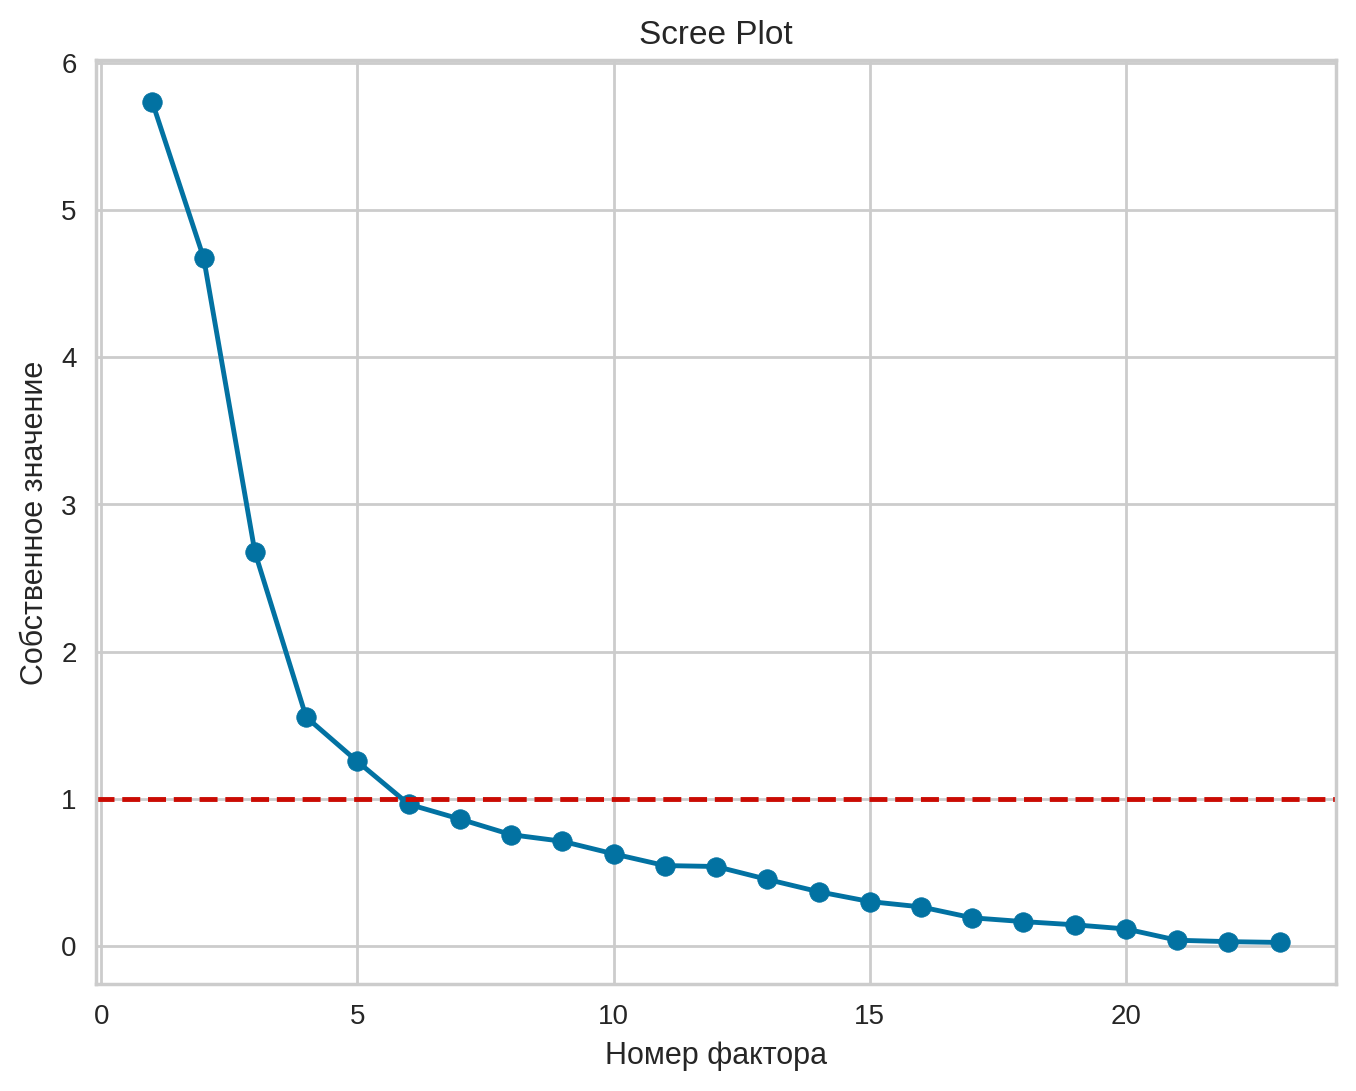

Количество факторов для объяснения 75.0% дисперсии: 7


In [52]:
def determine_optimal_factors(df_scaled, threshold=0.75):
    from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity, FactorAnalyzer
    import numpy as np
    import matplotlib.pyplot as plt

    # Проверка KMO и тест Бартлетта
    kmo_all, kmo_model = calculate_kmo(df_scaled)
    chi_square_value, p_value = calculate_bartlett_sphericity(df_scaled)

    print(f"KMO: {kmo_model}")
    print(f"Bartlett's test p-value: {p_value}")

    # Выполняем факторный анализ без указания количества факторов
    fa = FactorAnalyzer(rotation=None)
    fa.fit(df_scaled)
    eigenvalues, vectors = fa.get_eigenvalues()

    # Критерий Кайзера
    num_factors_kaiser = np.sum(eigenvalues > 1)
    print(f"Количество факторов по критерию Кайзера: {num_factors_kaiser}")

    # Scree Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(range(1, len(eigenvalues)+1), eigenvalues)
    plt.plot(range(1, len(eigenvalues)+1), eigenvalues)
    plt.axhline(y=1, color='r', linestyle='--')
    plt.title('Scree Plot')
    plt.xlabel('Номер фактора')
    plt.ylabel('Собственное значение')
    plt.grid(True)
    plt.show()

    # Критерий накопленной дисперсии
    total_variance_explained = np.cumsum(eigenvalues) / np.sum(eigenvalues)
    num_factors_variance = np.argmax(total_variance_explained >= threshold) + 1

    print(f"Количество факторов для объяснения {threshold*100}% дисперсии: {num_factors_variance}")

    # Возвращаем результаты
    return {
        'KMO': kmo_model,
        'Bartlett_p_value': p_value,
        'num_factors_kaiser': num_factors_kaiser,
        'num_factors_variance': num_factors_variance,
        'eigenvalues': eigenvalues
    }

# Применяем функцию к вашим данным
results = determine_optimal_factors(df_scaled)


Попробовали

Попробуем с помощью метода главных компонент спроецировать
данные на n-мерную плоскость.
То есть выделим 2-3-4-5 главных компоненты.
Реализация метода содержится в классе ```PCA```
библиотеки ```sklearn.decomposition```.



array([0.24910411, 0.20319872, 0.1163452 , 0.06762704, 0.05451583,
       0.04189329])

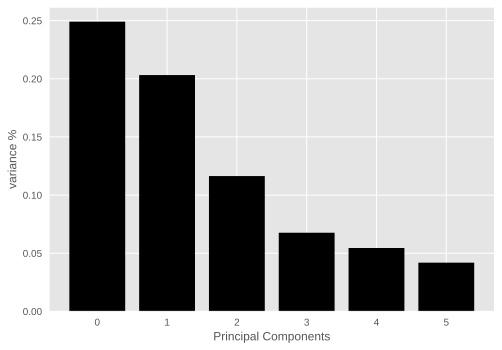

In [53]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format='svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Create a PCA instance
pca=PCA(n_components=6)
principalComponents=pca.fit_transform(df_scaled)
#Plot the expained variaces
features=range(pca.n_components_)
plt.bar(features,pca.explained_variance_ratio_,color='black')
plt.xlabel("Principal Components")
plt.ylabel('variance %')
plt.xticks(features)

#Save components to a dataframe
PCA_components=pd.DataFrame(principalComponents)

#Show the expained variance by each principal component
pca.explained_variance_ratio_

Шаги:
Выполнить факторный анализ с варимакс-ротацией.

Получить факторные оценки.

Выполнить кластеризацию на основе полученных факторных оценок.

Визуализировать результаты кластеризации.

Рассчитать и визуализировать коэффициенты силуэта для методов k-средних и иерархической кластеризации.

Для k-средних, n_clusters = 2, средний коэффициент силуэта = 0.3827575462963493
Для k-средних, n_clusters = 3, средний коэффициент силуэта = 0.3046883446426374
Для k-средних, n_clusters = 4, средний коэффициент силуэта = 0.2589031636972392
Для k-средних, n_clusters = 5, средний коэффициент силуэта = 0.29242311649117303
Для k-средних, n_clusters = 6, средний коэффициент силуэта = 0.3031409065952667
Для k-средних, n_clusters = 7, средний коэффициент силуэта = 0.33628983000980656
Для k-средних, n_clusters = 8, средний коэффициент силуэта = 0.3388120562151743
Для k-средних, n_clusters = 9, средний коэффициент силуэта = 0.30716826632135874
Для k-средних, n_clusters = 10, средний коэффициент силуэта = 0.29724663342335284
Для иерархической кластеризации, n_clusters = 2, средний коэффициент силуэта = 0.49861970206590667
Для иерархической кластеризации, n_clusters = 3, средний коэффициент силуэта = 0.28891434832186125
Для иерархической кластеризации, n_clusters = 4, средний коэффициент силуэта 

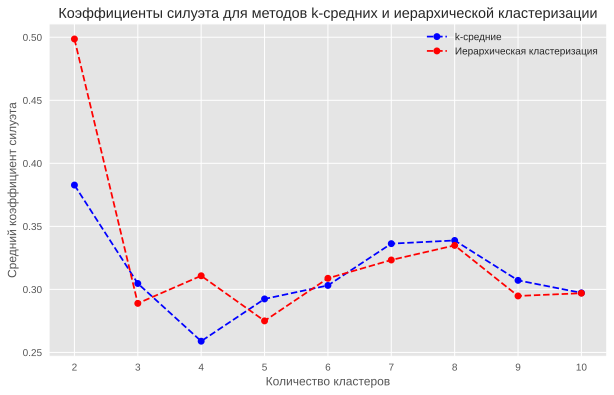

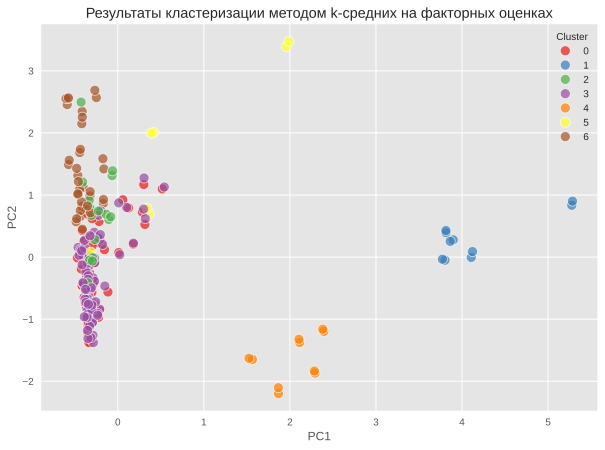

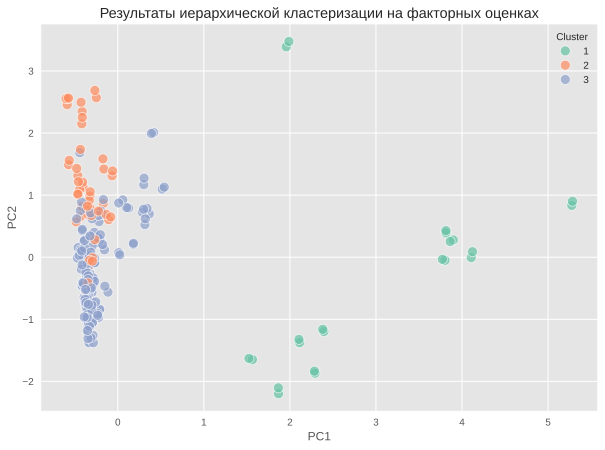

In [54]:
from pycaret.clustering import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import KMeans
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import silhouette_score
import numpy as np

# Предполагается, что df_scaled — ваш стандартизированный DataFrame
df_scaled_reset = df_scaled.reset_index(drop=True)

# Шаг 1: Выполнение факторного анализа с варимакс-ротацией
fa = FactorAnalysis(n_components=6)
fa.set_params(rotation='varimax')
factor_scores = fa.fit_transform(df_scaled_reset)
factor_scores_df = pd.DataFrame(factor_scores, columns=[f'Фактор {i+1}' for i in range(factor_scores.shape[1])])

# Шаг 2: Определение коэффициентов силуэта для метода k-средних
range_n_clusters = list(range(2, 11))
silhouette_avg_scores_kmeans = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(factor_scores_df)
    silhouette_avg = silhouette_score(factor_scores_df, cluster_labels)
    silhouette_avg_scores_kmeans.append(silhouette_avg)
    print(f"Для k-средних, n_clusters = {n_clusters}, средний коэффициент силуэта = {silhouette_avg}")

# Шаг 3: Определение коэффициентов силуэта для иерархической кластеризации
silhouette_avg_scores_hierarchical = []

for n_clusters in range_n_clusters:
    linked = linkage(factor_scores_df, method='ward')
    cluster_labels = fcluster(linked, t=n_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(factor_scores_df, cluster_labels)
    silhouette_avg_scores_hierarchical.append(silhouette_avg)
    print(f"Для иерархической кластеризации, n_clusters = {n_clusters}, средний коэффициент силуэта = {silhouette_avg}")

# Шаг 4: Построение объединённого графика коэффициентов силуэта
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores_kmeans, marker='o', linestyle='--', label='k-средние', color='blue')
plt.plot(range_n_clusters, silhouette_avg_scores_hierarchical, marker='o', linestyle='--', label='Иерархическая кластеризация', color='red')
plt.title('Коэффициенты силуэта для методов k-средних и иерархической кластеризации')
plt.xlabel('Количество кластеров')
plt.ylabel('Средний коэффициент силуэта')
plt.legend()
plt.grid(True)
plt.show()

# Шаг 5: Выбор оптимального количества кластеров и выполнение кластеризации на факторных оценках

# Оптимальное количество кластеров по методу k-средних (например, по коэффициенту силуэта)
optimal_clusters_kmeans = 7

# Выполняем кластеризацию методом k-средних
kmeans = KMeans(n_clusters=optimal_clusters_kmeans, random_state=42)
df_clustered_kmeans = factor_scores_df.copy()
df_clustered_kmeans['Cluster'] = kmeans.fit_predict(factor_scores_df)

# Понижение размерности до 2D для визуализации с использованием PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(factor_scores_df)
df_clustered_kmeans['PC1'] = principal_components[:, 0]
df_clustered_kmeans['PC2'] = principal_components[:, 1]

# Визуализация кластеров методом k-средних
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_clustered_kmeans, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.title('Результаты кластеризации методом k-средних на факторных оценках')
plt.show()

# Оптимальное количество кластеров для иерархической кластеризации (например, по коэффициенту силуэта)
optimal_clusters_hierarchical = 3

# Выполняем иерархическую кластеризацию
linked = linkage(factor_scores_df, method='ward')
df_clustered_hierarchical = factor_scores_df.copy()
df_clustered_hierarchical['Cluster'] = fcluster(linked, t=optimal_clusters_hierarchical, criterion='maxclust')

# Добавление компонент PCA для визуализации
df_clustered_hierarchical['PC1'] = principal_components[:, 0]
df_clustered_hierarchical['PC2'] = principal_components[:, 1]

# Визуализация кластеров иерархической кластеризации
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_clustered_hierarchical, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100, alpha=0.7)
plt.title('Результаты иерархической кластеризации на факторных оценках')
plt.show()


In [ ]:
weights=pca.components_
weights

writer = pd.ExcelWriter('ppp.xlsx')

pd.DataFrame(eigen_vals).to_excel(df, header=False, index=False)

In [ ]:
%matplotlib inline

In [ ]:
Совпадает с spss

In [55]:
n_samples = df_scaled.shape[0]
# We center the data and compute the sample covariance matrix.
df_scaled -= np.mean(df_scaled, axis=0)
cov_matrix = np.dot(df_scaled.T, df_scaled) / n_samples
for eigenvector in pca.components_:
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))

ValueError: shapes (23,23) and (6,) not aligned: 23 (dim 1) != 6 (dim 0)

правильный код выводит снизу собственные вектора

In [ ]:
pca = PCA(n_components=6)
X_transformed = pca.fit_transform(df_scaled)
n_samples=48
# We center the data and compute the sample covariance matrix.
X_centered = df_scaled - np.mean(df_scaled, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):
   print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
   #print(eigenvalue)

In [ ]:
pca.get_covariance()

не работает ниже

print (pca)



Координаты самих компонент находятся в атрибуте ```components_```. коЭФФИЦИЕНТЫ ПРИ ФАКТОРАХ

In [ ]:
pca.components_

In [ ]:
print ('Explained variance by component: %s' % pca.explained_variance_ratio_)

In [ ]:
print ('Cumulartive variance by component: %s' % np.cumsum(pca.explained_variance_ratio_))

In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(df_scaled.T))

In [ ]:
cov_matrix = np.cov(df_scaled.T)
print(cov_matrix)

proba

In [56]:
pca = PCA(n_components=7)
pca.fit(df_scaled)
X_pca = pca.transform(df_scaled)
print("original shape:   ", df_scaled.shape)
print("transformed shape:", X_pca.shape)

original shape:    (256, 23)
transformed shape: (256, 7)


<function matplotlib.pyplot.show(close=None, block=None)>

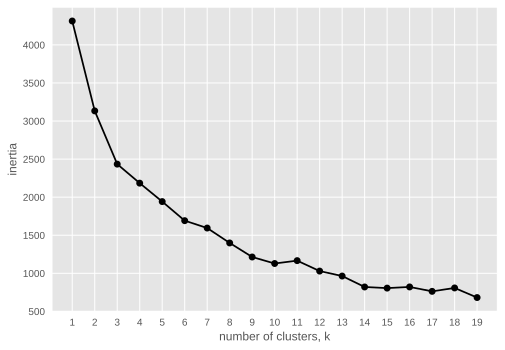

In [57]:
from sklearn.cluster import KMeans
#Elbow method
ks=range(1,20)
inertias=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:10]) #we only use the first 3 principal components
    inertias.append(model.inertia_)

plt.plot(ks,inertias, '-o',color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [ ]:
eigen_values, eigen_vectors

In [ ]:
pca.explained_variance_ratio_

In [ ]:
zzz = pca.transform(df_scaled)

какая доля общей дисперсии объясняется каждым фактором////Наконец, сами факторы (как новые векторы-фичи) можно получить, применив метод transform.

In [ ]:
zzz

Факторный анализ
=========


http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html


Попробуем с помощью факторного анализа построить новые фичи, которые были бы более удобными в использовании с минимальной потерей информации.

Используем класс ```FactorAnalysis``` из ```sklearn.decomposition```.
Начнём с 3-4-5-6 факторов.

In [ ]:
pip cache purge


In [ ]:
!pip install factor_analyzer

In [ ]:
!pip install --upgrade scikit-learn numpy cython


In [ ]:
!pip install --force-reinstall cython


In [ ]:
!pip install --upgrade scipy matplotlib


In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn


In [60]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
#df_scaled_without_10 = df_scaled.drop(df_scaled.columns[2], axis=1)
# Создание модели факторного анализа
fa = FactorAnalyzer(n_factors=6, rotation='varimax', method='principal', use_smc=True)

# Обучение модели
fa.fit(df_scaled)

# Создание DataFrame с факторными нагрузками
kak = pd.DataFrame(fa.loadings_, index=df_scaled.columns)

# Вывод собственных значений
print("Eigenvalues:", fa.get_eigenvalues())

# Проверка адекватности факторного анализа (KMO тест)
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_scaled)
print("KMO Test Value:", kmo_model)


Eigenvalues: (array([5.72939444, 4.67357052, 2.6759397 , 1.55542191, 1.25386399,
       0.96354564, 0.86274047, 0.75660276, 0.71167128, 0.62637429,
       0.54679683, 0.54040716, 0.45278304, 0.36921984, 0.30225315,
       0.2660875 , 0.19197516, 0.16620944, 0.14439937, 0.11628265,
       0.03964904, 0.03012083, 0.02469098]), array([ 5.53978738e+00,  4.44747037e+00,  2.38126781e+00,  1.19618698e+00,
        9.94878333e-01,  6.68132740e-01,  5.77149037e-01,  3.93251319e-01,
        3.42629024e-01,  2.71676396e-01,  1.94764147e-01,  1.61043051e-01,
        1.20945751e-01,  8.90626105e-02,  5.44101796e-02,  4.98025727e-03,
       -8.68335837e-03, -2.01579658e-02, -6.74325288e-02, -7.48501478e-02,
       -9.82242452e-02, -1.20470038e-01, -1.96080907e-01]))
KMO Test Value: 0.7537274373961339


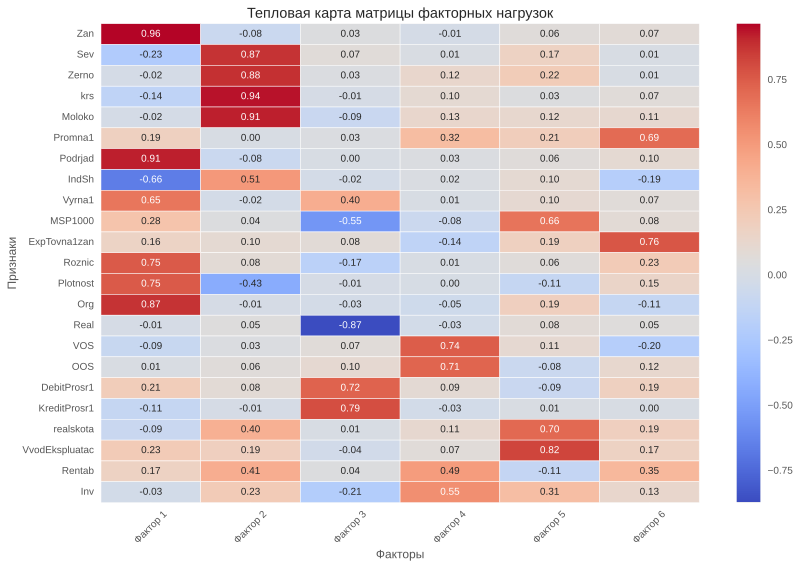

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Изменяем названия столбцов (факторов) так, чтобы нумерация начиналась с 1
kak.columns = [f'Фактор {i+1}' for i in range(kak.shape[1])]

# Настройка размера графика
plt.figure(figsize=(12, 8))

# Отрисовка тепловой карты
sns.heatmap(kak, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Настраиваем заголовок и метки осей
plt.title('Тепловая карта матрицы факторных нагрузок')
plt.xlabel('Факторы')
plt.ylabel('Признаки')

# Поворачиваем метки оси X для лучшей читаемости
plt.xticks(rotation=45)

# Отображаем график
plt.tight_layout()
plt.show()


In [23]:
# Исключаем 10-й столбец (индексация с нуля, поэтому столбец 10 имеет индекс 9)
df_scaled_without_10 = df_scaled.drop(df_scaled.columns[24], axis=1)
fa = FactorAnalysis(n_components=6)
fa.set_params(rotation='varimax')
# Передаем этот массив в модель FactorAnalysis
fa.fit(df_scaled_without_10)

# Используем названия столбцов из df_scaled_without_10
kak = pd.DataFrame(fa.components_, columns=df_scaled_without_10.columns)


IndexError: index 24 is out of bounds for axis 0 with size 24

Метод варимакс,но метод НЕ proncipal

Координаты факторов в пространстве старых фич находятся в атрибуте ```components_```.

Верный варимакс- метод -pricipal

The method must be one of the following: ['ml', 'mle', 'uls', 'minres', 'principal']

In [ ]:
loadings

In [ ]:
SEM

In [62]:
pip install semopy

model_spec = """
        # Измерительная модель
        EconActivity =~ Zan + Podrjad + IndSh + Roznic + Vra4 + Org + TOobrzPit +Doljasobstv + Nurzdana1000
        Productivity =~ Promna1 + Vyrna1 + ExpTovna1zan
        Agriculture  =~ Plorzselhozzem + Zerno + Moloko + krs
        Infrastructure =~ MSP1000 + VvodEkspluatac
        Finance =~  Rentab+ Doljasobstv
        FinancialStability =~ KreditProsr1 + DebitProsr1
        Investments  =~ InvNaDushu + VOS + OOS

        # Структурная модель

        Productivity ~ EconActivity + Investments
        Infrastructure ~ EconActivity + Finance
        FinancialStability ~  Investments
        Agriculture ~ EconActivity
        Finance ~ Agriculture
 """


        # Структурная модель
        Infrastructure      ~ EconActivity +  Agriculture    
        Productivity        ~ EconActivity + Infrastructure
        #   ~ FinancialStability
        Investments         ~ Productivity
        FinancialStability  ~ Productivity

In [ ]:
pip install --upgrade semopy


In [ ]:
from semopy import Model
from semopy.inspector import modification_indices
import pandas as pd

# Определение SEM-модели (пример)
model_spec = """
    Productivity        ~ EconActivity + Investments
    Agriculture         ~ Infrastructure + Productivity
    FinancialStability  ~ Productivity
    EconActivity        ~ FinancialStability
    Infrastructure      ~ Investments
    Investments         ~ Infrastructure

"""


# Создание и подгонка модели
model = Model(model_spec)
model.fit(df_scaled)

# Вывод модификационных индексов
mod_indices = modification_indices(model)
print(mod_indices)


            # Измерительная модель
            EconActivity     =~ Zan + Podrjad + IndSh + Roznic + SMR + Vra4 + Org + TOobrzPit + MSP1000
            #Agriculture      =~ Sev + Zerno +  krs + Moloko
            FinancialStability =~ KreditProsr1 + DebitProsr1
            Productivity     =~ Promna1 + Vyrna1 + ExpTovna1zan
            #Infrastructure   =~  + VvodEkspluatac
            ProductionFunds  =~ VOS + OOS

            # Структурные уравнения модели
            Productivity    ~ EconActivity
            ProductionFunds ~ Productivity
            # Дополнительные ковариации между экзогенными факторами
            EconActivity  ~ FinancialStability
            #Agriculture ~  Productivity +  ProductionFunds

ЛУЧШАЯ


model_spec_improved = """
# Измерительная модель
# Для улучшения модели избыточные перекрытия устранены:
EconActivity       =~ Zan + Plotnost + Podrjad + IndSh + Vra4 + Org + Roznic + TOobrzPit
Uslugi             =~ ExpUslna1zan + SMR
FinancialStability =~ KreditProsr1 + DebitProsr1
Productivity       =~ Promna1 + Vyrna1 + ExpTovna1zan
Infrastructure     =~ realskota + VvodEkspluatac + MSP1000
ProductionFunds    =~ Rentab + VOS + OOS

# Структурная модель
# Расширяем структурные зависимости для лучшей инкрементальной подгонки:
Productivity    ~ EconActivity + Uslugi + Infrastructure + FinancialStability
ProductionFunds ~ Productivity + FinancialStability

# Ковариации между экзогенными конструкторами (предполагаем их взаимосвязанность)
EconActivity       ~~ Uslugi + FinancialStability + Infrastructure
Uslugi             ~~ FinancialStability + Infrastructure
FinancialStability ~~ Infrastructure

# Возможное добавление ковариации между ошибками измерений схожих индикаторов (если теоретически оправдано):
# TOobrzPit ~~ Roznic
"""


Average employment of the population for the period, %', 'Podrjad',
       'INVEST', 'Real', 'retail', 'rentab', 'Coeff vvoda', 'Coeff obn',
       'Obespech', 'Vvod', 'SMR', 'Agricultural index', 'Obsz. tovarooborot',
       'Ubyto4nye', 'Density', 'Debit', 'Kredit', 'SME', 'Housing stock',
       'PP na 1 person', 'Accepted/fired', 'Vyru4ka', 'KRS', 'Organiz',
       'Agriculture lands', 'Vegetables', 'Milk'],
      dtype='object')

      

            # Измерительная модель
            EconActivity       =~ rentab + Debit + Kredit + PPna1person + Vyru4ka + Housingstock
            Agriculture        =~ Obespech + Agriculturelands + Vegetables + Milk + KRS + Density
            Proizvodstvo           =~ Coeffvvoda + Coeffobn
            Organiz            =~ SME + Vyru4ka + Organiz + Ubyto4nye
            Dohod              =~ Real + retail
            Invest             =~ Podrjad + SMR
            Trud               =~ Averageemploymentof + Obsztovarooborot
            House              =~ Podrjad + Vvod


            # Структурная модель
            # Экономическая активность влияет на продуктивность, производство и уровень доходов:
            EconActivity  ~ Proizvodstvo + Invest
            Proizvodstvo ~ Agriculture + Organiz

            # Аграрное производство влияет на трудовой потенциал и уровень инвестиций:
            Trud ~ Agriculture +EconActivity+ Invest


            # Жилищный сектор связан с аграрным обеспечением и инвестициями:
            House ~ Agriculture + Invest

            Dohod ~Trud

In [ ]:
!pip uninstall semopy
!pip install semopy


In [ ]:
!pip install --upgrade semopy



In [1]:
import semopy
from semopy import Model
import pandas as pd
import numpy as np
from scipy.stats import shapiro

# Упрощенная модель с учетом ошибок
cfa_spec_simplified = """
    # Упрощённая измерительная модель — CFA
    EconActivity =~ Zan + Roznic
    FinanceExport =~ Vyrna1 + ExpTovna1zan
    Agriculture  =~ Sev + Zerno + Moloko
    Infrastructure =~ MSP1000 + VvodEkspluatac
    FinancialStability =~ KreditProsr1 + DebitProsr1
    Productivity  =~ Promna1 + Rentab

"""

# Создаем и оцениваем модель
try:
    print("=== ПОПЫТКА БАЗОВОЙ ОЦЕНКИ ===")
    model = Model(model_spec)
    res = model.fit(df_scaled)

    # Вывод результатов
    print("\nФИТНЕС-МЕТРИКИ:")
    stats = semopy.calc_stats(model)
    print(pd.DataFrame(stats.items(), columns=['Метрика', 'Значение']))

    print("\nФАКТОРНЫЕ НАГРУЗКИ:")
    print(model.inspect('std_estimates').loc[lambda x: x['op'] == '=~'])

except Exception as e:
    print(f"\nКРИТИЧЕСКАЯ ОШИБКА: {str(e)}")
    print("\nРЕКОМЕНДАЦИИ:")
    print("1. Упростите модель еще сильнее (оставьте 2-3 индикатора на конструкт)")
    print("2. Проверьте корреляции между переменными:")
    print(df_scaled.corr().round(2))
    print("3. Убедитесь, что размер выборки > 200 наблюдений")
    print("4. Для ненормальных данных попробуйте преобразования:")
    print("   - Логарифмирование: np.log1p(df_scaled)")
    print("   - Квадратный корень: np.sqrt(df_scaled - df_scaled.min() + 1)")

# Проверка нормальности (альтернативный подход)
print("\nАЛЬТЕРНАТИВНАЯ ПРОВЕРКА НОРМАЛЬНОСТИ:")
print("Доля переменных с p-value > 0.05:",
      sum(shapiro(df_scaled[col])[1] > 0.05 for col in df_scaled.columns)/len(df_scaled.columns))

# Альтернативный минималистичный вариант
if 'res' not in locals():
    print("\n=== ПОПЫТКА МИНИМАЛИСТИЧНОЙ МОДЕЛИ ===")
    minimal_spec = """
        Econ =~ Zan + Podrjad
        Finance =~ Vyrna1
        Finance ~ Econ
    """
    try:
        model_min = Model(minimal_spec)
        res_min = model_min.fit(df_scaled)
        print("\nУСПЕШНАЯ ОЦЕНКА МИНИМАЛЬНОЙ МОДЕЛИ")
        print(semopy.calc_stats(model_min))
    except:
        print("Даже минимальная модель не работает. Требуется:")
        print("- Проверить данные на пропуски и выбросы")
        print("- Увеличить размер выборки")
        print("- Использовать другие методы (например, PCA или EFA)")

ModuleNotFoundError: No module named 'semopy'

['Model', 'ModelEffects', 'ModelGeneralizedEffects', 'ModelMeans', 'Optimizer', '__author__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'bias_correction', 'calc_stats', 'constraints', 'create_regularization', 'efa', 'effects', 'estimate_means', 'examples', 'gather_statistics', 'inspector', 'means', 'model', 'model_base', 'model_effects', 'model_generalized_effects', 'model_generation', 'model_means', 'multigroup', 'name', 'optimizer', 'parser', 'plot', 'polycorr', 'regularization', 'report', 'semplot', 'solver', 'startingvalues', 'stats', 'unbias', 'utils']
2.3.11
Index(['Zan', 'Sev', 'Zerno', 'krs', 'Moloko', 'Promna1', 'Podrjad', 'IndSh',
       'Vyrna1', 'MSP1000', 'ExpTovna1zan', 'Roznic', 'Plotnost', 'Org',
       'Real', 'VOS', 'OOS', 'DebitProsr1', 'KreditProsr1', 'realskota',
       'VvodEkspluatac', 'Rentab', 'Inv'],
      dtype='object')
Fit results:
 Name of objective: MLW
Optimization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Детальная информация по параметрам модели сохранена в файл 'model_parameters2026.xlsx'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SEM модель экспортирована в файл 'sem_model.dot'.


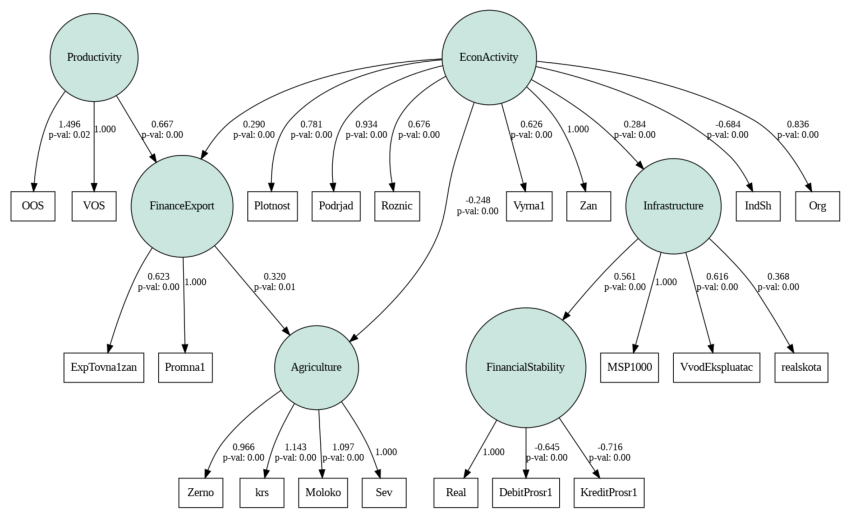

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
import semopy
print(dir(semopy))
print(semopy.__version__)

from semopy import ModelMeans
#from semopy import Model
#from semopy.inspector import modification_indices
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
from google.colab import files  # Только для загрузки файлов, если вы работаете в Google Colab.

# Загрузите ваши данные в DataFrame «df»
# Пример: df = pd.read_csv("your_data.csv")

# Определение спецификации SEM модели
model_spec = """

    # Измерительная модель
    EconActivity =~ Zan + Podrjad+ IndSh + Roznic + Vyrna1 +Plotnost + Org
    FinanceExport =~ Promna1+ ExpTovna1zan
    Agriculture  =~ Sev + Zerno + Moloko + krs
    Infrastructure =~ MSP1000 + VvodEkspluatac + realskota
    FinancialStability =~ Real+ KreditProsr1 + DebitProsr1
    Productivity  =~  VOS + OOS

    # Структурная модель

    FinanceExport ~ EconActivity + Productivity
    Infrastructure ~ EconActivity
    FinancialStability ~  Infrastructure
    Agriculture ~ EconActivity+FinanceExport

 """
print(df_scaled.columns)  # Выведет список всех доступных переменных

# Создание и обучение модели
model = semopy.Model(model_spec)
res = model.fit(df_scaled, obj="MLW")

print("Fit results:\n", res)

# Получение модификационных индексов
model_means = ModelMeans(model_spec)
model_means.fit(df_scaled)
params = model_means.inspect("parameters")
print("Parameters:\n", params)


# Получение модификационных индексов  modification_indices = inspect(model, data, 'modindices')
# Печать модификационных индексов print(modification_indices)


# Подгонка модели
model = ModelMeans(model_spec)
model.fit(df_scaled)

# Вывод параметров модели
params = model.inspect("parameters")
print(params)

# Модельная ковариационная матрица
fitted_values = model.predict(df_scaled)
#print(fitted_values)



# Вывод фитнес-метрик модели
print("\nGoodness-of-Fit Statistics:")
fit_metrics = semopy.calc_stats(model)

# Преобразование фитнес-метрик в подходящий формат для DataFrame
fit_metrics_df = pd.DataFrame(fit_metrics.items(), columns=["Metric", "Value"])

# Сохранение фитнес-метрик в файл Excel
fit_metrics_filename = "fit_metrics2026.xlsx"
fit_metrics_df.to_excel(fit_metrics_filename, index=False)
print(f"Фитнес-метрики сохранены в файл '{fit_metrics_filename}'.")
files.download(fit_metrics_filename)


# Вывод детальной информации по параметрам модели
inspection_df = model.inspect()
output_filename = "model_parameters2026.xlsx"
inspection_df.to_excel(output_filename, index=False)
print(f"Детальная информация по параметрам модели сохранена в файл '{output_filename}'.")
files.download(output_filename)

# Экспорт графика SEM модели
dot_path = "sem_model.dot"
semopy.semplot(model, dot_path)
print(f"SEM модель экспортирована в файл '{dot_path}'.")

# Рендеринг графика
with open(dot_path, 'r') as file:
    dot_data = file.read()

graph = graphviz.Source(dot_data)
graph.format = 'png'  # Указываем формат
graph.render('sem_model_graph_large', cleanup=True, engine='dot')

# Отображение готового графика
img = plt.imread('sem_model_graph_large.png')
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

# Скачивание графика
files.download('sem_model_graph_large.png')


In [ ]:
import semopy
from semopy import ModelMeans
#from semopy import Model
#from semopy.inspector import modification_indices
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
from google.colab import files  # Только для загрузки файлов, если вы работаете в Google Colab.

# Загрузите ваши данные в DataFrame «df»
# Пример: df = pd.read_csv("your_data.csv")

# Определение спецификации SEM модели
model_spec = """
            # Измерительная модель
            EconActivity       =~ Zan + Plotnost + Podrjad +  IndSh + SMR + Vra4 + Org + Roznic+ TOobrzPit
            Uslugi             =~ ExpUslna1zan + SMR
            FinancialStability =~ KreditProsr1 + DebitProsr1
            Productivity       =~  Promna1 + Vyrna1 + ExpTovna1zan
            Infrastructure     =~ realskota + VvodEkspluatac + MSP1000
            ProductionFunds    =~ Rentab + VOS + OOS

            # Структурная модель
            # Продуктивность определяется влиянием экономической активности, услуг и финансовой стабильности:
            Productivity ~ EconActivity
            # Финансовая стабильность теперь определяется экономической активностью вместо инфраструктуры:
            FinancialStability ~ EconActivity
            Productivity ~ Infrastructure
            # Услуги зависят от экономической активности:
            Uslugi ~ EconActivity

            # Производственные фонды зависят от продуктивности:
            ProductionFunds ~ Productivity

            # Ковариации между экзогенными переменными:
            EconActivity ~~ Infrastructure + Uslugi
            #Uslugi ~~ FinancialStability


 """

# Создание и обучение модели
model = semopy.Model(model_spec)
res = model.fit(df_scaled)
print("Fit results:\n", res)

# Подгонка модели
model = ModelMeans(model_spec)
model.fit(df_scaled)

# Вывод параметров модели
params = model.inspect("parameters")
print(params)

# Модельная ковариационная матрица
fitted_values = model.predict(df_scaled)
#print(fitted_values)



# Вывод фитнес-метрик модели
print("\nGoodness-of-Fit Statistics:")
fit_metrics = semopy.calc_stats(model)

# Преобразование фитнес-метрик в подходящий формат для DataFrame
fit_metrics_df = pd.DataFrame(fit_metrics.items(), columns=["Metric", "Value"])

# Сохранение фитнес-метрик в файл Excel
fit_metrics_filename = "fit_metrics2025.xlsx"
fit_metrics_df.to_excel(fit_metrics_filename, index=False)
print(f"Фитнес-метрики сохранены в файл '{fit_metrics_filename}'.")
files.download(fit_metrics_filename)


# Вывод детальной информации по параметрам модели
inspection_df = model.inspect()
output_filename = "model_parameters2025.xlsx"
inspection_df.to_excel(output_filename, index=False)
print(f"Детальная информация по параметрам модели сохранена в файл '{output_filename}'.")
files.download(output_filename)

# Экспорт графика SEM модели
dot_path = "sem_model.dot"
semopy.semplot(model, dot_path)
print(f"SEM модель экспортирована в файл '{dot_path}'.")

# Рендеринг графика
with open(dot_path, 'r') as file:
    dot_data = file.read()

graph = graphviz.Source(dot_data)
graph.format = 'png'  # Указываем формат
graph.render('sem_model_graph_large', cleanup=True, engine='dot')

# Отображение готового графика
img = plt.imread('sem_model_graph_large.png')
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

# Скачивание графика
files.download('sem_model_graph_large.png')


Дополнит.анализ промышленнсти на 1 занятого,так ка в разные факторы вошел
Провести дополнительный анализ (например, CFA), чтобы оценить, насколько такая спецификация соответствует данным и теории.

Лучшее БЕЗ ПОДГОНКИ,что может быть на текущий момент

In [70]:
import semopy
import pandas as pd
import graphviz

# Спецификация модели
model_spec = """

    # Измерительная модель
    EconActivity =~ Zan + Podrjad+ IndSh + Roznic + Vyrna1 +Plotnost + Org
    FinanceExport =~ Promna1+ ExpTovna1zan
    Agriculture  =~ Sev + Zerno + Moloko + krs
    Infrastructure =~ MSP1000 + VvodEkspluatac + realskota
    FinancialStability =~ Real+ KreditProsr1 + DebitProsr1
    Productivity  =~  VOS + OOS

    # Структурная модель

    FinanceExport ~ EconActivity + Productivity
    Infrastructure ~ EconActivity
    FinancialStability ~  Infrastructure
    Agriculture ~ EconActivity+FinanceExport

 """


# Создание и обучение модели
model = semopy.Model(model_spec)
res = model.fit(df)
print("Fit Results:\n", res)

# Оценка фитнес-метрик
fit_metrics = semopy.calc_stats(model)
print("\nGoodness-of-Fit Statistics:")
print(fit_metrics)

# Экспорт графика SEM модели в формат .dot
dot_path = "sem_model.dot"
semopy.semplot(model, dot_path)
print(f"SEM модель экспортирована в файл '{dot_path}'.")

# Рендеринг графика в формат PDF
graph = graphviz.Source.from_file(dot_path)
graph.format = 'pdf'  # Указываем формат PDF
graph.render('sem_model_graph_pdf', cleanup=True)

print("График модели успешно сохранён в формате PDF.")

# Скачивание PDF-файла
files.download('sem_model_graph_pdf.pdf')

Fit Results:
 Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 10.554
Number of iterations: 1248
Params: 124.905 -19.723 1116.370 1810.821 499.946 1081.819 71.237 2.259 0.003 0.001 23.658 0.937 -10.517 -4.856 -2.325 31.535 513.354 1.982 0.473 -253.470 1400.676 19.750 1425.048 1.220 -0.083 54319249.907 294.717 21.455 336.838 57.220 4365.375 0.000 278.653 15.742 1166096.808 228117.889 13318.912 0.005 1873.966 12.079 1490165.559 210146784.225 14.675 45739.089 6652400.001 674544565.013 1095533090.899 7.217 359.229

Goodness-of-Fit Statistics:
       DoF  DoF Baseline         chi2  chi2 p-value  chi2 Baseline      CFI  \
Value  182           210  2701.944224           0.0    5713.024591  0.54208   

            GFI      AGFI       NFI       TLI     RMSEA        AIC  \
Value  0.527055  0.454295  0.527055  0.471631  0.233018  76.891061   

              BIC    LogLik  
Value  250.604756  10.55447  
SEM модель эксп

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import semopy
import pandas as pd
import graphviz
import matplotlib.pyplot as plt

# Загрузка и подготовка данных: убедитесь, что df_scaled готовы к анализу
# df = pd.read_csv("your_data.csv")
# df_scaled = ваш_метод_масштабирования(df)

# Модифицированная спецификация SEM модели
model_spec = """
    # Измерительная модель
    EconActivity    =~ Zan + Podrjad + IndSh + Roznic + Vra4 + Org + TOobrzPit + Doljasobstv + Nurzdana1000

    Agriculture     =~ Plorzselhozzem + Zerno + Moloko + krs
    # Опционально, разрешаем коррелировать ошибки между индикаторами, связанными с растениеводством:
    Plorzselhozzem ~~ Zerno

    Productivity    =~ Promna1 + Vyrna1 + ExpTovna1zan
    Infrastructure  =~ MSP1000 + VvodEkspluatac
    Finance         =~ Rentab + Doljasobstv
    FinancialStability =~ KreditProsr1 + DebitProsr1
    Investments     =~ InvNaDushu + VOS + OOS

    # Структурная модель
    Productivity    ~ EconActivity + Investments
    Infrastructure  ~ EconActivity + Finance
    FinancialStability ~ Investments

    # Модифицированный путь: включение посредника
    #Agriculture     ~ EconActivity + Infrastructure

    Finance         ~ Agriculture
"""
#Agriculture     ~ EconActivity + Infrastructure
# Создание модели
model = semopy.Model(model_spec)

# Обучение модели (убедитесь, что DataFrame df_scaled содержит все необходимые переменные)
res = model.fit(df_scaled)
print("Fit results:\n", res)

# Вывод детальной информации по параметрам модели
print("\nModel inspection:")
inspection_df = model.inspect()
print(inspection_df)

# Сохраняем DataFrame полностью в Excel файл (xlsx).
# Если у вас нет установленного openpyxl, установите его через: pip install openpyxl
output_filename = "model_parameters2026.xlsx"
inspection_df.to_excel(output_filename, index=False)

print(f"Детальная информация по параметрам модели сохранена в файл '{output_filename}'.")
files.download('model_parameters2026.xlsx')

# --- Шаг 4: Экспорт графика SEM модели в формате .dot ---
dot_path = "beverage_brand_analysis_sem.dot"
semopy.semplot(model, dot_path)
print(f"SEM модель экспортирована в файл '{dot_path}'.")

# --- Шаг 5: Чтение .dot файла ---
with open(dot_path, 'r') as file:
    dot_data = file.read()

# --- Шаг 6: Рендеринг графика с увеличенным разрешением ---
# Настройки рендера через Graphviz
graph = graphviz.Source(dot_data)
graph.format = 'png'  # Указываем формат
graph.render('beverage_brand_analysis_sem_large1', cleanup=True, engine='dot')  # Используем 'dot' как engine

# --- Шаг 7: Отображение готового графика ---
img = plt.imread('beverage_brand_analysis_sem_large1.png')
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

# --- Шаг 8: Скачивание графика ---
files.download('beverage_brand_analysis_sem_large1.png')


In [ ]:
import semopy
import pandas as pd
import graphviz
import matplotlib.pyplot as plt

# Загрузка и подготовка данных: убедитесь, что df_scaled готовы к анализу
# Пример:
# df = pd.read_csv("your_data.csv")
# df_scaled = ваш_метод_масштабирования(df)

# Новая спецификация SEM модели с разделением Agriculture на два конструкта:
model_spec = """
    # Измерительная модель
    EconActivity    =~ Zan + Podrjad + IndSh + Roznic + Vra4 + Org + TOobrzPit + Doljasobstv + Nurzdana1000

    # Конструкт для растениеводства (Crop Production); индикатор Plorzselhozzem исключён,
    # так как он показал слабую нагрузку (p = 0.80)
    CropProduction  =~ Zerno

    # Конструкт для животноводства (Livestock)
    Livestock       =~ Moloko + krs

    Productivity    =~ Promna1 + Vyrna1 + ExpTovna1zan
    Infrastructure  =~ MSP1000 + VvodEkspluatac
    Finance         =~ Rentab + Doljasobstv
    FinancialStability =~ KreditProsr1 + DebitProsr1
    Investments     =~ InvNaDushu + VOS + OOS

    # Структурная модель
    Productivity    ~ EconActivity + Investments
    Infrastructure  ~ EconActivity + Finance
    FinancialStability ~ Investments

    # Отдельные структурные пути для компонентов сельского хозяйства:
    CropProduction ~ EconActivity + Infrastructure
    Livestock      ~ EconActivity + Infrastructure

    # Влияние обоих компонентов на финансовую сферу
    Finance         ~ CropProduction + Livestock
"""

# Создание и обучение модели
model = semopy.Model(model_spec)

# Обучение модели (убедитесь, что DataFrame df_scaled содержит все необходимые переменные)
res = model.fit(df_scaled)
print("Fit results:\n", res)

# Вывод детальной информации по параметрам модели (например, коэффициенты, p-значения и т.д.)
print("\nModel inspection:")
inspection_df = model.inspect()
print(inspection_df)

# Сохраняем DataFrame полностью в Excel файл (xlsx).
# Если у вас нет установленного openpyxl, установите его через: pip install openpyxl
output_filename = "model_parameters2025.xlsx"
inspection_df.to_excel(output_filename, index=False)

print(f"Детальная информация по параметрам модели сохранена в файл '{output_filename}'.")
files.download('model_parameters2025.xlsx')

# --- Шаг 4: Экспорт графика SEM модели в формате .dot ---
dot_path = "beverage_brand_analysis_sem.dot"
semopy.semplot(model, dot_path)
print(f"SEM модель экспортирована в файл '{dot_path}'.")

# --- Шаг 5: Чтение .dot файла ---
with open(dot_path, 'r') as file:
    dot_data = file.read()

# --- Шаг 6: Рендеринг графика с увеличенным разрешением ---
# Настройки рендера через Graphviz
graph = graphviz.Source(dot_data)
graph.format = 'png'  # Указываем формат
graph.render('beverage_brand_analysis_sem_large1', cleanup=True, engine='dot')  # Используем 'dot' как engine

# --- Шаг 7: Отображение готового графика ---
img = plt.imread('beverage_brand_analysis_sem_large1.png')
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

# --- Шаг 8: Скачивание графика ---
files.download('beverage_brand_analysis_sem_large1.png')


In [ ]:
import semopy
from graphviz import Source

import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from google.colab import files

# Предполагается, что DataFrame df_scaled уже определён и содержит необходимые переменные
# Например:
# df_scaled = pd.read_csv("your_data.csv")

# Определение модели CFA с перекрёстной нагрузкой на индикатор
model_spec = """
    # Измерительная модель с кросс-нагрузками
     EconActivity =~ Zan + Podrjad+IndSh+Roznic +Vra4+Org +TOobrzPit+ Doljasobstv +TOobrzPit
     Finance =~  Rentab+ Doljasobstv

"""

# Создание модели и её обучение
model = semopy.Model(model_spec)
res = model.fit(df_scaled)
print("Результаты подгонки модели:\n", res)

# Получаем детальную информацию по параметрам модели
inspect_df = model.inspect()
print("\nИнспекция модели:")
print(inspect_df)

# Фильтрация дисперсий и ковариаций для латентных переменных
latent_vars = ['EconActivity', 'Finance']
latent_cov = inspect_df[(inspect_df['op'] == '~~') &
                        (inspect_df['lval'].isin(latent_vars)) &
                        (inspect_df['rval'].isin(latent_vars))]
print("\nКовариации и дисперсии для латентных переменных:")
print(latent_cov)

# Проверяем, что дисперсии и ковариации найдены
if latent_cov.empty:
    raise ValueError("Не удалось найти строки с дисперсиями и ковариациями для указанных латентных переменных.")

# Извлечение дисперсии для 'EconActivity'
econ_var = latent_cov.loc[
    (latent_cov['lval'] == 'EconActivity') & (latent_cov['rval'] == 'EconActivity'),
    'Estimate'
].values[0]

# Извлечение дисперсии для 'Finance'
finance_var = latent_cov.loc[
    (latent_cov['lval'] == 'Finance') & (latent_cov['rval'] == 'Finance'),
    'Estimate'
].values[0]

# Извлечение ковариации между 'EconActivity' и 'Finance'
cov_mask = ((latent_cov['lval'] == 'EconActivity') & (latent_cov['rval'] == 'Finance')) | \
           ((latent_cov['lval'] == 'Finance') & (latent_cov['rval'] == 'EconActivity'))
cov_value = latent_cov.loc[cov_mask, 'Estimate'].values[0]

# Вычисление корреляции между 'EconActivity' и 'Finance'
correlation = cov_value / ((econ_var ** 0.5) * (finance_var ** 0.5))
print(f"\nКорреляция между 'EconActivity' и 'Finance': {correlation}")

# Экспорт схемы модели в .dot файл и преобразование в графический файл
diagram_path = "CFA_model.dot"
semopy.semplot(model, diagram_path)
print(f"\nСхема CFA модели экспортирована в '{diagram_path}'.")

# Чтение .dot файла
with open(diagram_path, 'r') as file:
    dot_data = file.read()

# Рендер графика в формат PNG
graph = Source(dot_data)
graph.format = 'png'
output_filename = "CFA_model_updated"
graph.render(output_filename, cleanup=True, engine='dot')
print(f"\nГрафик модели сохранён как '{output_filename}.png'.")

# Отображение графика
img = plt.imread(output_filename + '.png')
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

# Модификационные индексы
modification_indices = semopy.calc_modindices(model, df_scaled)
print("\nМодификационные индексы:")
print(modification_indices)

# Скачивание итогового графического файла (для Google Colab, если необходимо)
# files.download(output_filename + '.png')



In [ ]:
import semopy
import pandas as pd

# Определение спецификации SEM модели с перекрёстной нагрузкой
model_spec = """
    # Измерительная модель
    Productivity =~ Promna1 + Vyrna1 + ExpTovna1zan
    Inv          =~ Promna1 + Nominal + Rentab + Doljasobstv + Invest5
"""

# Создание модели
model = semopy.Model(model_spec)

# Предположим, что df_scaled содержит все необходимые переменные, включая Promna1
# Обучение модели
res = model.fit(df_scaled)
print("Результаты подгонки модели:\n", res)

# Инспекция модели: вывод параметров
inspect_df = model.inspect()
print("\nДетальная информация о параметрах модели:")
print(inspect_df)

# Сохранение параметров модели в Excel
output_filename = "model_parameters.xlsx"
inspect_df.to_excel(output_filename, index=False)
print(f"Параметры модели сохранены в файл '{output_filename}'.")

# Экспорт схемы модели в формат .dot
diagram_path = "CFA_model.dot"
semopy.semplot(model, diagram_path)
print(f"\nСхема модели экспортирована в '{diagram_path}'.")


In [ ]:
import semopy
import pandas as pd

# Определение модели CFA с перекрёстной нагрузкой на индикатор
model_spec = """
    # Измерительная модель с кросс-нагрузками
    Factor2 =~ IndustryWorker + RevenueWorker + ExportWorker
    Factor7 =~ IndustryWorker + NominalZP + Rentabelnost + BudgetOwnFundShare + Invest5Years
"""

# Загрузка данных в DataFrame
# Замените 'your_data.csv' на путь к вашему файлу данных.
df = pd.read_csv('your_data.csv')

# Создание модели и обучение
model = semopy.Model(model_spec)
res = model.fit(df)
print("Результаты подгонки модели:\n", res)

# Проверка дискриминантной валидности
# Инспекция латентных факторов и корреляций между ними
inspect_result = model.inspect()
print("\nИнспекция модели:")
print(inspect_result)

# Анализ дискриминантной валидности
# Вычисляем корреляции между латентными переменными
correlations = model.param_matrix.loc[model.param_matrix['Type'] == 'covariance']
print("\nКорреляции между латентными переменными:")
print(correlations)

# Генерация графической диаграммы модели
diagram_path = "CFA_model.dot"
semopy.semplot(model, diagram_path)
print(f"Схема CFA модели экспортирована в '{diagram_path}'.")

# Дополнительно: Вывод модификационных индексов
modification_indices = semopy.calc_modindices(model, df)
print("\nМодификационные индексы:")
print(modification_indices)


In [ ]:
import semopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

# Define the updated SEM model specification
model_spec = """
    # Measurement model
    EconDev =~ Invest5 + Organizac + Rentab + Doljasobstv + Roznic
    SocInfra =~ Vra410000 + ObespechenieZhil + Real
    Agriculture =~ Zerno + KRS + Moloko + Kartof
    Construction =~ VvodExpluatac + Plotnost + Dorogi
    FinDebts =~ DebitProsr1 + KreditProsr1
    Employment =~ ExpUsIna1zan + ExpTovna1zan + Sootnosh4islzanktrudosposob
    Demographics =~ Nurzdana1000 + MSP1000

    # Structural model
    SocInfra ~ EconDev
    Employment ~ EconDev + Demographics
    FinDebts ~ Agriculture
    SocInfra ~ Demographics
"""

# Create and fit the SEM model
model = semopy.Model(model_spec)
res = model.fit(df_scaled)
print(res)
print("\nModel inspection:")
print(model.inspect())

# Save the diagram using semopy
diagram_path = "updated_sem_model.dot"
semopy.semplot(model, diagram_path)
print(f"SEM Model diagram exported to '{diagram_path}'.")


In [ ]:
# Предполагается, что вы уже выполнили факторный анализ и имеете объект 'fa'

# Получаем факторные оценки
factor_scores = fa.transform(df_scaled)

# Преобразуем в DataFrame
factor_scores_df = pd.DataFrame(factor_scores, columns=[f'Фактор {i+1}' for i in range(factor_scores.shape[1])])

# Просмотрим первые несколько строк
print(factor_scores_df.head())


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
max_clusters = 18  # Вы можете изменить максимальное количество кластеров

for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(factor_scores_df)
    wcss.append(kmeans.inertia_)

# Строим график метода локтя
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters+1), wcss, marker='o', linestyle='--')
plt.title('Метод локтя для определения оптимального количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_clusters in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(factor_scores_df)
    silhouette_avg = silhouette_score(factor_scores_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Строим график коэффициента силуэта
plt.figure(figsize=(8, 5))
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o', linestyle='--')
plt.title('Коэффициент силуэта для различного количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.show()


In [ ]:
# Укажите найденное оптимальное количество кластеров
optimal_clusters = 3 # Замените на действительное число

# Выполняем кластеризацию
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(factor_scores_df)
cluster_labels = kmeans.labels_

# Добавляем метки кластеров в DataFrame с факторными оценками
factor_scores_df['Кластер'] = cluster_labels

# Просмотрим первые строки
print(factor_scores_df.head())


In [ ]:
from sklearn.decomposition import PCA

# Понижаем размерность до 2D для визуализации
pca = PCA(n_components=2)
principal_components = pca.fit_transform(factor_scores_df.drop('Кластер', axis=1))

# Создаём DataFrame для визуализации
visualization_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
visualization_df['Кластер'] = cluster_labels

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(data=visualization_df, x='PC1', y='PC2', hue='Кластер', palette='bright')
plt.title('Результаты кластеризации k-means на факторах')
plt.show()


**5. Иерархическая кластеризация**
**5.1. Выполнение иерархической кластеризации **

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Используем метод связывания Ward
linked = linkage(factor_scores_df.drop('Кластер', axis=1), method='ward')

# Строим дендрограмму
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=factor_scores_df.index)
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Наблюдения')
plt.ylabel('Евклидово расстояние')
plt.show()


5.2. Определение кластеров из дендрограммы

In [ ]:
# Задаём количество кластеров
hierarchical_clusters = fcluster(linked, t=4, criterion='maxclust')

# Добавляем метки кластеров в DataFrame
factor_scores_df['Кластер_иерархический'] = hierarchical_clusters

# Просмотрим первые строки
print(factor_scores_df.head())


5.3. Визуализация результатов иерархической кластеризации

In [ ]:
# Добавляем метки иерархических кластеров в DataFrame для визуализации
visualization_df['Кластер_иерархический'] = hierarchical_clusters

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(data=visualization_df, x='PC1', y='PC2', hue='Кластер_иерархический', palette='deep')
plt.title('Результаты иерархической кластеризации на факторах')
plt.show()


6. Сравнение результатов и интерпретация кластеров
Сравните метки кластеров, полученные разными методами.

Проанализируйте, как наблюдения распределились по кластерам.

Исследуйте средние значения факторов внутри каждого кластера, чтобы интерпретировать их.

In [ ]:
# Просмотрим распределение наблюдений по кластерам
print(factor_scores_df['Кластер'].value_counts())
print(factor_scores_df['Кластер_иерархический'].value_counts())

# Группировка по кластеру и расчет среднего значения факторов
cluster_means = factor_scores_df.groupby('Кластер').mean()
print("\nСредние значения факторов по k-means кластерам:")
print(cluster_means)

cluster_means_hier = factor_scores_df.groupby('Кластер_иерархический').mean()
print("\nСредние значения факторов по иерархическим кластерам:")
print(cluster_means_hier)


In [ ]:
new_loadings = np.resize(loadings, (20, 10))

In [ ]:
plt.figure(figsize=(20, 16))

In [ ]:
ff=plt.figure(figsize=(40, 32))

In [ ]:
matfig = plt.figure(figsize=(8,8))
plt.matshow(d.corr(), fignum=matfig.number)

In [ ]:
plt.matshow(loadings, cmap='viridis',fignum=ff.number)
plt.xticks([0,1,2,3,4,5,6,7,8], ["1", "2", "3", "4","5","6","7","8"], rotation=0)
#plt.figure(figsize=(20, 20))
plt.colorbar()
#plt.xlabel([1,2,3,4,5,6,7,8,9,10,11])
#xticks=([1, 30])
plt.yticks([0,1,2,3,4,5,6,7,8], ["1", "2", "3", "4","5","6","7","8"], rotation=0)
plt.ylabel("Показатели")
plt.xlabel("Главные компоненты")

In [ ]:
!pip install factor_analyzer

In [ ]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [ ]:
fa = FactorAnalyzer()
fa.set_params(rotation='varimax')
fa.fit(df_scaled)
loadings = fa.loadings_
eigen_values, vectors = fa.get_eigenvalues()

In [ ]:
eigen_values, vectors

map= pd.DataFrame(loadings, ["Первая компонента", "Вторая компонента", "Третья компонента", "Четвертая компонента"])
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')


In [ ]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

KМО КАйзера kaizera

In [ ]:
#CHECK ADEQUACY
#Bartlett
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)
print(chi_square_value, p_value)

#KMO
#Value should be 0.6<
kmo_all,kmo_model=calculate_kmo(df_scaled)
print(kmo_model)
print(kmo_all)

In [ ]:

from google.colab import files

df.to_excel('file.xlsx', index=False, header=False)


# Скачивание файла
files.download('file.xlsx')

Структурные уравнения

In [ ]:
import seaborn as sns

corr_matrix = pd.DataFrame(df_scaled, columns=df_scaled.columns).corr()
plt.figure(figsize=(21,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
pip install semopy

In [ ]:
!brew install graphviz

In [ ]:
# Measurement model
social=~ x1 + x2 + x3
s/h =~ y1 + y2 + y3 + y4
industry =~ y5 + y6 + y7 + y8

In [ ]:
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60

**Specifying the structural model**

In [ ]:
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60

**Specifying the correlations**

In [ ]:
# Correlations
y1 ~~ y5
y2 ~~ y4
y2 ~~ y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y5

In [ ]:
Import pandas as pd
#data = pd.read_csv('PoliticalDemocracy.csv')

**Defining the SEM model**

In [ ]:
# Define the SEM model specification
model_spec = """
# Measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8

# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60

# Correlations
y1 ~~ y5
y2 ~~ y4
y2 ~~ y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y5
"""

**Next, we define the model and fit the data**

In [ ]:
import semopy
# Define the model
model = semopy.Model(model_spec)
#Fit the model
model.fit(data)
# Inspect the results
print(model.inspect())

**Interpreting the results**

In [ ]:
semopy.semplot(model, 'political_sem_model.png')
print("SEM Model diagram saved as 'political_sem_model.png'.")
img = plt.imread('political_sem_model.png')
plt.imshow(img)
plt.axis('off')
plt.show()

Assessing model fit
The hypothesized model should match the observed relationships to assess SEM model fit. Various fit indices are used to assess how well the model fits the data. Here are commonly used ones:

Chi-Square Test: Compares the observed covariance matrix with the model-implied covariance matrix. A non-significant chi-square indicates a good fit.
Root Mean Square Error of Approximation: It evaluates how well the model approximates the data, adjusting for model complexity. Values below 0.05 and up to 0.08 are acceptable.
https://app.datacamp.com/learn/tutorials/structural-equation-modeling?registration_source=google_onetap

In [ ]:
# Установка необходимых библиотек
!pip install --upgrade factor_analyzer semopy pycaret openpyxl

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from semopy import Model, Optimizer
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.clustering import *
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA

# Предполагается, что df — твой DataFrame
# Стандартизация данных
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Проверка на пропущенные значения
if df_scaled.isnull().values.any():
    print("Data contains missing values. Please handle them before proceeding.")
else:
    # Выполнение KMO-теста
    kmo_all, kmo_model = calculate_kmo(df_scaled)
    print(f"KMO: {kmo_model:.2f}")

    # Выполнение теста сферичности Бартлетта
    chi_square_value, p_value = calculate_bartlett_sphericity(df_scaled)
    print(f"p-значение Бартлетта: {p_value:.4f}")

    # Определение количества факторов с использованием графика осыпи
    fa = FactorAnalyzer()
    fa.fit(df_scaled)
    ev, v = fa.get_eigenvalues()
    plt.plot(range(1, df.shape[1]+1), ev)
    plt.title('График осыпи')
    plt.xlabel('Факторы')
    plt.ylabel('Собственные значения')
    plt.grid()
    plt.show()

    # Определение оптимального количества факторов (предположим, 4)
    optimal_factors = 4

    # Выполнение факторного анализа с оптимальным количеством факторов
    fa = FactorAnalyzer(n_factors=optimal_factors, rotation='varimax')
    fa.fit(df_scaled)
    loadings = pd.DataFrame(fa.loadings_, index=df.columns)
    print(loadings)

    # Построение корреляционной матрицы и тепловой карты
    corr_matrix = pd.DataFrame(df_scaled, columns=df.columns).corr()
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.show()

    # Описание модели SEM
    model_desc = """
    Social =~ Real + Density + retail + Organiz + Obespech+SME+Vvod
    Industry =~ Podrjad + INVEST + Vyru4ka + rentab+ Ubyto4nye
    Agri =~  KRS+Vegetables+Milk
    #Social ~ Industry + Agri
    """


    # Создание и оценка модели
    model = Model(model_desc)
    model.load_dataset(df_scaled)  # Добавлен вызов load_dataset
    optim = Optimizer(model)
    result = optim.optimize()

    # Просмотр результатов
    estimates = model.inspect()
    print(estimates)

    # Шаги для кластеризации
    df_scaled_reset = df_scaled.reset_index(drop=True)

    # Шаг 2: Инициализация среды
    exp_clu = setup(
        data=df_scaled_reset,
        session_id=123,
        normalize=False,
        transformation=False,
        verbose=False
    )

    # Шаг 3: Создание модели k-means
    kmeans_model = create_model('kmeans')

    # Шаг 4: Анализ оптимального количества кластеров
    plot_model(kmeans_model, plot='elbow')
    plot_model(kmeans_model, plot='silhouette')

    # Шаг 5: Получение меток кластеров
    df_clustered = assign_model(kmeans_model)
    print(df_clustered.head())

    # Понижение размерности до 2D для визуализации с использованием PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(df_scaled_reset)
    df_clustered['PC1'] = principal_components[:, 0]
    df_clustered['PC2'] = principal_components[:, 1]

    # Шаг 6: Визуализация кластеров
    # Используем яркие и насыщенные цвета для кластеров
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df_clustered, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, alpha=0.7)
    plt.title('Результаты кластеризации k-means на факторах')
    plt.show()

    # Шаг 7: Иерархическая кластеризация с использованием SciPy
    linked = linkage(df_scaled_reset, method='ward')

    # Строим дендрограмму
    plt.figure(figsize=(10, 7))
    dendrogram(linked, labels=df_scaled_reset.index.tolist(), color_threshold=0.75*max(linked[:,2]))
    plt.title('Дендрограмма иерархической кластеризации')
    plt.xlabel('Наблюдения')
    plt.ylabel('Евклидово расстояние')
    plt.show()

    # Определение кластеров из дендрограммы
    hierarchical_clusters = fcluster(linked, t=3, criterion='maxclust')

    # Добавляем метки кластеров в DataFrame
    df_clustered['Кластер_иерархический'] = hierarchical_clusters

    # Просмотрим первые строки
    print(df_clustered.head())

    # Сохранение результата в Excel-файл
    output_file = 'clustered_data.xlsx'
    df_clustered.to_excel(output_file, index=False)

    # Выводим путь для сохраненного файла
    from google.colab import files
    files.download(output_file)

    print(f"Результаты кластеризации сохранены в файл: {output_file}")


**ОСНОВНОЙ КОД**

In [ ]:
!pip install semopy

In [ ]:
import semopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

# Define the SEM model specification
model_spec = """
    # Measurement model
    Fin1 =~ DebitProsr1+KreditProsr1
    Fin2 =~ Nominal+Rentab+Doljasobstv+Invest5
    Agri1 =~ Plorzselhozzem + Zerno + krs + Moloko
    Agri2 =~ IndSh + Plotnost
    Social =~ Zan + Podrjad + Plotnost + Roznic + Organizac + TOobrzPit + Vra4
    Industry =~ Promna1 + Vyrna1 + ExpTovna1zan
    Zhil =~ VvodEkspluatac + MSP1000
"""

# Create and fit the SEM model
model = semopy.Model(model_spec)
res = model.fit(df_scaled)
print(res)
print("\nModel inspection:")
print(model.inspect())

# Save the diagram using semopy
diagram_path = "beverage_brand_analysis_sem.dot"
semopy.semplot(model, diagram_path)
print(f"SEM Model diagram exported to '{diagram_path}'.")

# Use graphviz to render the diagram as a PNG file
with open(diagram_path, 'r') as file:
    dot_data = file.read()

In [ ]:
import semopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from google.colab import files

# --- Шаг 1: Определение структуры SEM модели ---
model_spec = """
    # Measurement model
    Fin1 =~ DebitProsr1 + KreditProsr1
    Fin2 =~ Nominal + Rentab + Doljasobstv + Invest5
    Agri1 =~ Plorzselhozzem + Zerno + krs + Moloko
    Agri2 =~ IndSh + Plotnost
    Social =~ Zan + Podrjad + Plotnost + Roznic + Organizac + TOobrzPit + Vra4
    Industry =~ Promna1 + Vyrna1 + ExpTovna1zan
    Zhil =~ VvodEkspluatac + MSP1000
"""

# --- Шаг 2: Создание модели и её оценка ---
model = semopy.Model(model_spec)
res = model.fit(df_scaled)
print("Результаты подгонки модели:")
print(res)

# --- Шаг 3: Инспекция модели ---
print("\nИнспекция модели:")
print(model.inspect())

# --- Шаг 4: Экспорт графика SEM модели в формате .dot ---
dot_path = "beverage_brand_analysis_sem.dot"
semopy.semplot(model, dot_path)
print(f"SEM модель экспортирована в файл '{dot_path}'.")

# --- Шаг 5: Чтение .dot файла ---
with open(dot_path, 'r') as file:
    dot_data = file.read()

# --- Шаг 6: Рендеринг графика с увеличенным разрешением ---
# Настройки рендера через Graphviz
graph = graphviz.Source(dot_data)
graph.format = 'png'  # Указываем формат
graph.render('beverage_brand_analysis_sem_large', cleanup=True, engine='dot')  # Используем 'dot' как engine

# --- Шаг 7: Отображение готового графика ---
img = plt.imread('beverage_brand_analysis_sem_large.png')
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

# --- Шаг 8: Скачивание графика ---
files.download('beverage_brand_analysis_sem_large.png')


In [ ]:
print(df_scaled.columns)


In [ ]:
# Описание модели SEM
    model_desc = {
    'Social': ['Temp 4isl', 'Sootnosh 4isl zan k trudosposob', 'Plotnost', 'Golca', 'MSP', 'Roznic', 'Obespe4 zhil', 'U4asz na 1 u4it', 'Vra4'],
    'Industry': ['Prom na 1', 'Exp Tovna 1 zan', 'Exp Usl na 1 zan', 'Invest', 'Vynurz zan', 'Dolja sobstv', 'Nurzda na 1000', 'Prostoi'],
    'Agri': ['Plorz selhoz zem', 'IndS/h', 'var9']
    }
    # Структурные отношения
    Социальное_развитие ~ Промышленное_производство + Сельское_хозяйство

   # Создание и оценка модели
    model = Model(model_desc)
    optim = Optimizer(model)
    result = optim.optimize(df_scaled)

    # Просмотр результатов
    estimates = model.inspect()
    print(estimates)

    # Шаги для кластеризации
    df_scaled_reset = df_scaled.reset_index(drop=True)

    # Шаг 2: Инициализация среды
    exp_clu = setup(
        data=df_scaled_reset,
        session_id=123,
        normalize=False,
        transformation=False,
        verbose=False
    )

    # Шаг 3: Создание модели k-means
    kmeans_model = create_model('kmeans')

    # Шаг 4: Анализ оптимального количества кластеров
    plot_model(kmeans_model, plot='elbow')
    plot_model(kmeans_model, plot='silhouette')

    # Шаг 5: Получение меток кластеров
    df_clustered = assign_model(kmeans_model)
    print(df_clustered.head())

    # Понижение размерности до 2D для визуализации с использованием PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(df_scaled_reset)
    df_clustered['PC1'] = principal_components[:, 0]
    df_clustered['PC2'] = principal_components[:, 1]

    # Шаг 6: Визуализация кластеров
    # Используем яркие и насыщенные цвета для кластеров
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df_clustered, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, alpha=0.7)
    plt.title('Результаты кластеризации k-means на факторах')
    plt.show()

    # Шаг 7: Иерархическая кластеризация с использованием SciPy
    linked = linkage(df_scaled_reset, method='ward')

    # Строим дендрограмму
    plt.figure(figsize=(10, 7))
    dendrogram(linked, labels=df_scaled_reset.index.tolist(), color_threshold=0.7*max(linked[:,2]))
    plt.title('Дендрограмма иерархической кластеризации')
    plt.xlabel('Наблюдения')
    plt.ylabel('Евклидово расстояние')
    plt.show()

    # Определение кластеров из дендрограммы
    hierarchical_clusters = fcluster(linked, t=3, criterion='maxclust')

    # Добавляем метки кластеров в DataFrame
    df_clustered['Кластер_иерархический'] = hierarchical_clusters

    # Просмотрим первые строки
    print(df_clustered.head())

    # Сохранение результата в Excel-файл
    output_file = 'clustered_data.xlsx'
    df_clustered.to_excel(output_file, index=False)

    # Выводим путь для сохраненного файла
    from google.colab import files
    files.download(output_file)

    print(f"Результаты кластеризации сохранены в файл: {output_file}")